In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgbm
#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingclfressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
import optuna

import matplotlib.pyplot as plt
import seaborn as sns


import joblib
from pathlib import Path
from warnings import filterwarnings
filterwarnings('ignore')

/home/arma/miniforge3/envs/teachopencadd/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Set path to this notebook
HERE = Path(_dh[-1])
HDAC1and6 = Path(HERE).resolve().parents[1]/'input'

In [3]:
df = pd.read_pickle(HDAC1and6/"HDAC1and6_SemiSel_1024B.csv")
df = df.sample(frac=1).reset_index(drop=True)
df.head(5)

,molecule_chembl_id,fp_MACCS,fp_Morgan3,fp_MorganF,fp_MAP4,SelectivityWindow
0,CHEMBL1095764,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[9850747, 10427556, 6095547, 5213123, 12018511...",-0.60
1,CHEMBL4244887,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[11780358, 16948577, 2043088, 10483303, 266155...",1.03
2,CHEMBL4280303,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[799147, 2011138, 345515, 476717, 193508, 1860...",-0.77
3,CHEMBL3910638,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...","[9076848, 2478511, 10872982, 3500173, 4556712,...",1.99
4,CHEMBL2047698,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[13007771, 18890305, 35941221, 11863091, 11250...",-2.95


In [4]:
df_labeled = pd.read_csv(HDAC1and6/"HDAC1and6_SemiSel_dataset.csv", )
df_labeled

,molecule_chembl_id,smiles,type_HDAC1,Standard_Value_HDAC1,pChEMBL_HDAC1,type_HDAC6,Standard_Value_HDAC6,pChEMBL_HDAC6,SelectivityRatio,SelectivityWindow,label
0,CHEMBL4098975,O=C(CCCCCCC(=O)Nc1ccc(NCCCn2cc(-c3ncnc4[nH]ccc...,IC50,109.647820,6.96,IC50,0.141254,9.85,776.247117,2.89,HDAC6-selective
1,CHEMBL3912061,CS(=O)(=O)NCCc1cn(Cc2ccc(C(=O)NO)cc2)c2ccccc12,IC50,616.595002,6.21,IC50,0.169824,9.77,3630.780548,3.56,HDAC6-selective
2,CHEMBL4243347,O=C(CCCCCCC(=O)Nc1ccc(Nc2nc(-c3cn[nH]c3)c3cc[n...,IC50,1.995262,8.70,IC50,0.199526,9.70,10.000000,1.00,Dual-binder
3,CHEMBL4247128,C=CCCn1cc(-c2nc(Nc3ccc(NC(=O)CCCCCCC(=O)NO)cc3...,IC50,83.176377,7.08,IC50,0.251189,9.60,331.131122,2.52,HDAC6-selective
4,CHEMBL4126811,CC(C)(C)OC(=O)Nc1ccc(-c2cc(C(=O)NCc3ccc(C(=O)N...,IC50,436.515832,6.36,IC50,0.331131,9.48,1318.256739,3.12,HDAC6-selective
...,...,...,...,...,...,...,...,...,...,...,...
1905,CHEMBL4167599,NCCCCNCCCCNCCCN1C(=O)c2ccc3c4c(ccc(c24)C1=O)C(...,IC50,4073.802778,5.39,IC50,50.118723,7.30,81.283052,1.91,Semi-selective
1906,CHEMBL4282471,CC(=O)Nc1ccc(-c2ccnc(Nc3ccc(NC(=O)CCCCC(=O)NO)...,IC50,3388.441561,5.47,IC50,117.489756,6.93,28.840315,1.46,Semi-selective
1907,CHEMBL470843,O=C(/C=C/c1ccc(-c2cc(CN3CCOCC3)on2)cc1)NO,IC50,6309.573445,5.20,IC50,173.780083,6.76,36.307805,1.56,Semi-selective
1908,CHEMBL3215861,CCCCc1nc2cc(/C=C/C(=O)NO)ccc2n1CCN(CC)CC,Ki,28.183829,7.55,Ki,245.470892,6.61,0.114815,-0.94,Dual-binder


In [5]:
df = pd.merge(df, df_labeled[['molecule_chembl_id',  'label']], on='molecule_chembl_id')

In [6]:
df[df['label'] == 'Dual-binder']['SelectivityWindow'].min()

-1.0

In [7]:
#df['Classes'] = np.where(df['label']== 'hDAC1-selective', 2)
df['Class'] = np.zeros(len(df))

df.loc[df[df.label == 'hDAC1-selective'].index, "Class"] = 1.0
df.loc[df[df.label == 'hDAC6-selective'].index, "Class"] = 2.0
df.loc[df[df.label == 'Dual-binder'].index, "Class"] = 3.0
df.loc[df[df.label == 'Non-binder'].index, "Class"] = 4.0
df.loc[df[df.label == 'Semi-selective'].index, "Class"] = 5.0
df.head(4)

,molecule_chembl_id,fp_MACCS,fp_Morgan3,fp_MorganF,fp_MAP4,SelectivityWindow,label,Class
0,CHEMBL1095764,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[9850747, 10427556, 6095547, 5213123, 12018511...",-0.60,Dual-binder,3.0
1,CHEMBL4244887,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[11780358, 16948577, 2043088, 10483303, 266155...",1.03,Semi-selective,5.0
2,CHEMBL4280303,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[799147, 2011138, 345515, 476717, 193508, 1860...",-0.77,Semi-selective,5.0
3,CHEMBL3910638,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...","[9076848, 2478511, 10872982, 3500173, 4556712,...",1.99,Semi-selective,5.0


In [8]:
# Add column for selectivity
df["selectivity"] = np.zeros(len(df))

# Mark every molecule as selective if SelectivityWindow is >=2 or >=-2, 0 otherwise
df.loc[df[df.SelectivityWindow >= 2.0].index, "selectivity"] = 1.0
df.loc[df[df.SelectivityWindow <= -2.0].index, "selectivity"] = 1.0
#By using Morgan fingerprints with radius of 3 and 1024 bits
indices =  np.array(df.index)
X = np.array(list((df['fp_Morgan3']))).astype(float)
#X.shape
Y =  df["selectivity"].values
Y_class = df['Class'].values

In [9]:
NUMS = 10
random_state= [146736, 1367, 209056, 1847464, 89563, 967034, 3689, 689547, 578929, 7458910]
X_tr_all = []
Y_tr_all = []
X_te_all = []
Y_te_all = []
Y_tr_class_all = []
Y_te_class_all = []
index_tr_all= []
index_te_all = []

for i in range(NUMS):
    X_tr, X_te, Y_tr, Y_te, Y_tr_class, Y_te_class, index_tr, index_te = train_test_split(X, Y, Y_class,indices, test_size=0.2, random_state=random_state[i], stratify=Y_class)
    X_tr_all.append(X_tr)
    Y_tr_all.append(Y_tr)
    X_te_all.append(X_te)
    Y_te_all.append(Y_te)
    Y_tr_class_all.append(Y_tr_class)
    Y_te_class_all.append(Y_te_class)
    index_tr_all.append(index_tr)
    index_te_all.append(index_te)
globals_dict = globals()
    
for i in range(0, len(index_te_all)):
    globals_dict[f"trainSet{i}"] = df.iloc[index_tr_all[i]]
    globals_dict[f"testSet{i}"] = df.iloc[index_te_all[i]]
    globals_dict[f"trainindex{i}"] = df.index[index_tr_all[i]]
    globals_dict[f"testindex{i}"] = df.index[index_te_all[i]]  
    globals_dict[f"X_trainSet{i}"] = np.array(list(df.iloc[index_tr_all[i]]['fp_Morgan3'])).astype(float)
    globals_dict[f"Y_trainSet{i}"] = np.array(list(df.iloc[index_tr_all[i]]['selectivity'])).astype(float)
    
    globals_dict[f"Y_trainSet{i}_class"] = np.array(list(df.iloc[index_tr_all[i]]['Class'])).astype(float)
    globals_dict[f"X_testSet{i}"] = np.array(list(df.iloc[index_te_all[i]]['fp_Morgan3'])).astype(float)
    globals_dict[f"Y_testSet{i}"] = np.array(list(df.iloc[index_te_all[i]]['selectivity'])).astype(float)
    
    globals_dict[f"Y_testSet{i}_class"] = np.array(list(df.iloc[index_te_all[i]]['Class'])).astype(float)
    

In [10]:
import sklearn.metrics
import math

def matrix_metrix(real_values,pred_values,beta):

    CM = confusion_matrix(real_values,pred_values)
    TN = CM[0][0]
    FN = CM[1][0] 
    TP = CM[1][1]
    FP = CM[0][1]
    Population = TN+FN+TP+FP
    Prevalence = round( (TP+FP) / Population,2)
    Accuracy   = round( (TP+TN) / Population,4)
    Precision  = round( TP / (TP+FP),4 )
    NPV        = round( TN / (TN+FN),4 )
    FDR        = round( FP / (TP+FP),4 )
    FOR        = round( FN / (TN+FN),4 ) 
    check_Pos  = Precision + FDR
    check_Neg  = NPV + FOR
    Recall     = round( TP / (TP+FN),4 )
    FPR        = round( FP / (TN+FP),4 )
    FNR        = round( FN / (TP+FN),4 )
    TNR        = round( TN / (TN+FP),4 ) 
    check_Pos2 = Recall + FNR
    check_Neg2 = FPR + TNR
    LRPos      = round( Recall/FPR,4 ) 
    LRNeg      = round( FNR / TNR ,4 )
    DOR        = round( LRPos/LRNeg)
    BalancedAccuracy = round( 0.5*(Recall+TNR),4)
    F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)   
    F1_weighted = round(f1_score(real_values, pred_values, average="weighted"), 4)
    F1_micro = round(f1_score(real_values, pred_values, average="micro"), 4)
    F1_macro = round(f1_score(real_values, pred_values, average="macro"), 4)
    FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
    MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
    BM         = Recall+TNR-1
    MK         = Precision+NPV-1

    mat_met = pd.DataFrame({
    'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','Precision','NPV','FDR','FOR','check_Pos',
              'check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','DOR','BalancedAccuracy',
              'F1','F1_weighted','F1_micro', 'F1_macro', 'FBeta','MCC','BM','MK'],     
    'Value':[TP,TN,FP,FN,Prevalence,Accuracy,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,DOR,BalancedAccuracy,F1,F1_weighted,F1_micro, F1_macro, FBeta,MCC,BM,MK]})  
    return (mat_met)


## Random Forest 

In [11]:
%%time

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)

TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)


for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        x_train, x_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]

        rf_clf =  RandomForestClassifier(random_state=1121218, max_features = None, n_jobs=8,oob_score=True,
                                           max_samples=0.8, )
        rf_clf.fit(x_train, y_train)
        y_pred = rf_clf.predict(x_test)  
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test, y_pred)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test, y_pred)
        Precision[idx] = precision_score(y_test, y_pred)
        Sensitivity[idx] = recall_score(y_test, y_pred)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
        f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
        MCC[idx] = matthews_corrcoef(y_test, y_pred)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test, y_pred)



mat_met_rf = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       }) 
                    
print(mat_met_rf)

                 Metric  Value (average)  Value (std)
0                    TP        19.800000     3.190263
1                    TN       151.500000     1.840894
2                    FP         6.100000     2.131770
3                    FN        13.600000     3.098387
4              Accuracy         0.896859     0.017634
5             Precision         0.765574     0.061924
6           Sensitivity         0.592665     0.092401
7           Specificity         0.961340     0.013378
8              F1 score         0.664529     0.072736
9   F1 score (weighted)         0.891075     0.020448
10     F1 score (macro)         0.801766     0.041092
11    Balanced Accuracy         0.776998     0.045641
12                  MCC         0.614162     0.075537
13                  NPV         0.917940     0.016804
14              ROC_AUC         0.776998     0.045641
CPU times: user 1min 12s, sys: 9.8 ms, total: 1min 12s
Wall time: 10.8 s


In [12]:
import optuna  


def objective_rf_CV(trial, X, Y, Y_class):
    param_grid = {
    #min_samples_split : trial.suggest_int('min_samples_split', 2, 50)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    #max_depth = trial.suggest_int('max_depth', 1, 10000)
    #"max_features" : trial.suggestegorical("max_features", [None]),
    #oob_score = trial.suggestegorical('oob_score', ['True','False']),
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
    }
    
    

    cv_scores = np.empty(10)
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        x_train, x_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        rf = RandomForestClassifier(**param_grid, n_jobs=8, random_state=1121218, max_features = None, 
                                   oob_score=True,
                                   max_samples=0.8,) 
        
        rf.fit(x_train, y_train)
        y_pred = rf.predict(x_test)
        cv_scores[idx] = f1_score(y_test, y_pred,  average="macro")
      
    
    return np.mean(cv_scores)

In [13]:
def detailed_objective_rf_CV(trial,X, Y, Y_class):
    param_grid = {
    #min_samples_split : trial.suggest_int('min_samples_split', 2, 50)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    #max_depth = trial.suggest_int('max_depth', 1, 10000)
    #"max_features" : trial.suggestegorical("max_features", [None]),
    #oob_score = trial.suggestegorical('oob_score', ['True','False']),
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
    }
    
    
    
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W=np.empty(10)
    f1_scores_M=np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        rf = RandomForestClassifier(**param_grid, n_jobs=8, random_state=1121218, max_features = None, oob_score=True,
                                           max_samples=0.8,)
   
        #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
       
           
        #calculate parameters
        conf_matrix = confusion_matrix(y_test, y_pred)      
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test, y_pred)
        Precision[idx] = precision_score(y_test, y_pred)
        Sensitivity[idx] = recall_score(y_test, y_pred)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
        f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
        MCC[idx] = matthews_corrcoef(y_test, y_pred)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test, y_pred)

    mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
    return (mat_met)
    
  

In [14]:
#Execute optuna and set hyperparameters
study_rf = optuna.create_study(direction='maximize', study_name="RFclassifier")
func_rf_0 = lambda trial: objective_rf_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_rf.optimize(func_rf_0, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:19:46,736] A new study created in memory with name: RFclassifier
[I 2023-12-05 13:21:01,000] Trial 0 finished with value: 0.7813083336348207 and parameters: {'n_estimators': 970}. Best is trial 0 with value: 0.7813083336348207.
[I 2023-12-05 13:22:14,842] Trial 1 finished with value: 0.7813083336348207 and parameters: {'n_estimators': 950}. Best is trial 0 with value: 0.7813083336348207.
[I 2023-12-05 13:22:52,755] Trial 2 finished with value: 0.7846013782774066 and parameters: {'n_estimators': 483}. Best is trial 2 with value: 0.7846013782774066.
[I 2023-12-05 13:23:14,861] Trial 3 finished with value: 0.7924690542465778 and parameters: {'n_estimators': 280}. Best is trial 3 with value: 0.7924690542465778.
[I 2023-12-05 13:24:03,033] Trial 4 finished with value: 0.7861865366159795 and parameters: {'n_estimators': 618}. Best is trial 3 with value: 0.7924690542465778.
[I 2023-12-05 13:24:48,177] Trial 5 finished with value: 0.7856548480661467 and parameters: {'n_estimat

	Number of trials: 50.0
	Best value (f1_score): 0.7942
	Best params:
		n_estimators: 291


In [15]:
optimized_rf_0 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
 
data_testing = pd.DataFrame()    
    
optimized_rf_0.fit(X_trainSet0, Y_trainSet0,)

#predict        
y_pred_rf_0 = optimized_rf_0.predict(X_testSet0)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0, y_pred_rf_0)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0, y_pred_rf_0)
Precision = precision_score(Y_testSet0, y_pred_rf_0)
Sensitivity = recall_score(Y_testSet0, y_pred_rf_0)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0, y_pred_rf_0)      
f1_scores_W = f1_score(Y_testSet0, y_pred_rf_0, average="weighted")
f1_scores_M = f1_score(Y_testSet0, y_pred_rf_0, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0, y_pred_rf_0)
MCC = matthews_corrcoef(Y_testSet0, y_pred_rf_0)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0, y_pred_rf_0)
data_testing['y_test_idx0'] = testindex0
data_testing['y_test_Set0'] = Y_testSet0
data_testing['y_pred_Set0'] = y_pred_rf_0


mat_met_rf_test = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(TP), np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                           np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
    
print(mat_met_rf_test)


                 Metric        Set0
0                    TP   47.000000
1                    TN  306.000000
2                    FP    8.000000
3                    FN   21.000000
4              Accuracy    0.924084
5             Precision    0.854545
6           Sensitivity    0.691176
7           Specificity    0.974500
8              F1 score    0.764228
9   F1 score (weighted)    0.920842
10     F1 score (macro)    0.859493
11    Balanced Accuracy    0.832849
12                  MCC    0.725340
13                  NPV    0.935800
14              ROC_AUC    0.832849


In [16]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_1 = lambda trial: objective_rf_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_rf.optimize(func_rf_1, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:46:54,765] Trial 50 finished with value: 0.7803817591513028 and parameters: {'n_estimators': 184}. Best is trial 11 with value: 0.7941830793286863.
[I 2023-12-05 13:47:18,652] Trial 51 finished with value: 0.7831001533381323 and parameters: {'n_estimators': 273}. Best is trial 11 with value: 0.7941830793286863.
[I 2023-12-05 13:47:50,330] Trial 52 finished with value: 0.78945158982732 and parameters: {'n_estimators': 365}. Best is trial 11 with value: 0.7941830793286863.
[I 2023-12-05 13:48:19,387] Trial 53 finished with value: 0.7879736486508495 and parameters: {'n_estimators': 334}. Best is trial 11 with value: 0.7941830793286863.
[I 2023-12-05 13:48:43,836] Trial 54 finished with value: 0.7855300747230288 and parameters: {'n_estimators': 279}. Best is trial 11 with value: 0.7941830793286863.
[I 2023-12-05 13:49:41,779] Trial 55 finished with value: 0.7786514620691511 and parameters: {'n_estimators': 672}. Best is trial 11 with value: 0.7941830793286863.
[I 2023-12-0

	Number of trials: 100.0
	Best value (f1_score): 0.7942
	Best params:
		n_estimators: 291


In [17]:
optimized_rf_1 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_1.fit(X_trainSet1, Y_trainSet1,)

#predict        
y_pred_rf_1 = optimized_rf_1.predict(X_testSet1)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1, y_pred_rf_1)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1, y_pred_rf_1)
Precision = precision_score(Y_testSet1, y_pred_rf_1)
Sensitivity = recall_score(Y_testSet1, y_pred_rf_1)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1, y_pred_rf_1)      
f1_scores_W = f1_score(Y_testSet1, y_pred_rf_1, average="weighted")
f1_scores_M = f1_score(Y_testSet1, y_pred_rf_1, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1, y_pred_rf_1)
MCC = matthews_corrcoef(Y_testSet1, y_pred_rf_1)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1, y_pred_rf_1)
data_testing['y_test_idx1'] = testindex1
data_testing['y_test_Set1'] = Y_testSet1
data_testing['y_pred_Set1'] = y_pred_rf_1


set1 = pd.DataFrame({ 'Set1':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_rf_test['Set1'] =set1
print(mat_met_rf_test)


                 Metric        Set0        Set1
0                    TP   47.000000   48.000000
1                    TN  306.000000  305.000000
2                    FP    8.000000    9.000000
3                    FN   21.000000   20.000000
4              Accuracy    0.924084    0.924084
5             Precision    0.854545    0.842105
6           Sensitivity    0.691176    0.705882
7           Specificity    0.974500    0.971300
8              F1 score    0.764228    0.768000
9   F1 score (weighted)    0.920842    0.921397
10     F1 score (macro)    0.859493    0.861308
11    Balanced Accuracy    0.832849    0.838610
12                  MCC    0.725340    0.727059
13                  NPV    0.935800    0.938500
14              ROC_AUC    0.832849    0.838610


In [18]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_2 = lambda trial: objective_rf_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_rf.optimize(func_rf_2, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 14:11:46,489] Trial 100 finished with value: 0.821222311325546 and parameters: {'n_estimators': 326}. Best is trial 100 with value: 0.821222311325546.
[I 2023-12-05 14:12:13,020] Trial 101 finished with value: 0.8202629280747704 and parameters: {'n_estimators': 319}. Best is trial 100 with value: 0.821222311325546.
[I 2023-12-05 14:12:40,755] Trial 102 finished with value: 0.8179629973331684 and parameters: {'n_estimators': 334}. Best is trial 100 with value: 0.821222311325546.
[I 2023-12-05 14:13:07,768] Trial 103 finished with value: 0.821222311325546 and parameters: {'n_estimators': 326}. Best is trial 100 with value: 0.821222311325546.
[I 2023-12-05 14:13:34,723] Trial 104 finished with value: 0.8228073486234246 and parameters: {'n_estimators': 327}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 14:14:01,811] Trial 105 finished with value: 0.8228073486234246 and parameters: {'n_estimators': 327}. Best is trial 104 with value: 0.8228073486234246.
[I 2

	Number of trials: 150.0
	Best value (f1_score): 0.8228
	Best params:
		n_estimators: 327


In [19]:

optimized_rf_2 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_2.fit(X_trainSet2, Y_trainSet2,)

#predict        
y_pred_rf_2 = optimized_rf_2.predict(X_testSet2)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2, y_pred_rf_2)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2, y_pred_rf_2)
Precision = precision_score(Y_testSet2, y_pred_rf_2)
Sensitivity = recall_score(Y_testSet2, y_pred_rf_2)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2, y_pred_rf_2)      
f1_scores_W = f1_score(Y_testSet2, y_pred_rf_2, average="weighted")
f1_scores_M = f1_score(Y_testSet2, y_pred_rf_2, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2, y_pred_rf_2)
MCC = matthews_corrcoef(Y_testSet2, y_pred_rf_2)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2, y_pred_rf_2)
data_testing['y_test_idx2'] = testindex2
data_testing['y_test_Set2'] = Y_testSet2
data_testing['y_pred_Set2'] = y_pred_rf_2

set2 = pd.DataFrame({'Set2':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_rf_test['Set2'] =set2
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2
0                    TP   47.000000   48.000000   40.000000
1                    TN  306.000000  305.000000  304.000000
2                    FP    8.000000    9.000000   11.000000
3                    FN   21.000000   20.000000   27.000000
4              Accuracy    0.924084    0.924084    0.900524
5             Precision    0.854545    0.842105    0.784314
6           Sensitivity    0.691176    0.705882    0.597015
7           Specificity    0.974500    0.971300    0.965100
8              F1 score    0.764228    0.768000    0.677966
9   F1 score (weighted)    0.920842    0.921397    0.895011
10     F1 score (macro)    0.859493    0.861308    0.809571
11    Balanced Accuracy    0.832849    0.838610    0.781047
12                  MCC    0.725340    0.727059    0.628496
13                  NPV    0.935800    0.938500    0.918400
14              ROC_AUC    0.832849    0.838610    0.781047


In [20]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_3 = lambda trial: objective_rf_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_rf.optimize(func_rf_3, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 14:35:08,745] Trial 150 finished with value: 0.8119584242099196 and parameters: {'n_estimators': 270}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 14:35:34,985] Trial 151 finished with value: 0.812311499329596 and parameters: {'n_estimators': 301}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 14:35:59,958] Trial 152 finished with value: 0.8104505191243726 and parameters: {'n_estimators': 286}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 14:36:26,869] Trial 153 finished with value: 0.8116327672340391 and parameters: {'n_estimators': 309}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 14:36:55,817] Trial 154 finished with value: 0.8116327672340391 and parameters: {'n_estimators': 334}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 14:37:17,222] Trial 155 finished with value: 0.8084940510690318 and parameters: {'n_estimators': 244}. Best is trial 104 with value: 0.8228073486234246.

	Number of trials: 200.0
	Best value (f1_score): 0.8228
	Best params:
		n_estimators: 327


In [21]:
optimized_rf_3 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_3.fit(X_trainSet3, Y_trainSet3,)

#predict        
y_pred_rf_3 = optimized_rf_3.predict(X_testSet3)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3, y_pred_rf_3)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3, y_pred_rf_3)
Precision = precision_score(Y_testSet3, y_pred_rf_3)
Sensitivity = recall_score(Y_testSet3, y_pred_rf_3)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3, y_pred_rf_3)      
f1_scores_W = f1_score(Y_testSet3, y_pred_rf_3, average="weighted")
f1_scores_M = f1_score(Y_testSet3, y_pred_rf_3, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3, y_pred_rf_3)
MCC = matthews_corrcoef(Y_testSet3, y_pred_rf_3)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3, y_pred_rf_3)
data_testing['y_test_idx3'] = testindex3
data_testing['y_test_Set3'] = Y_testSet3
data_testing['y_pred_Set3'] = y_pred_rf_3


set3 = pd.DataFrame({'Set3':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set3'] =set3   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3
0                    TP   47.000000   48.000000   40.000000   35.000000
1                    TN  306.000000  305.000000  304.000000  306.000000
2                    FP    8.000000    9.000000   11.000000   10.000000
3                    FN   21.000000   20.000000   27.000000   31.000000
4              Accuracy    0.924084    0.924084    0.900524    0.892670
5             Precision    0.854545    0.842105    0.784314    0.777778
6           Sensitivity    0.691176    0.705882    0.597015    0.530303
7           Specificity    0.974500    0.971300    0.965100    0.968400
8              F1 score    0.764228    0.768000    0.677966    0.630631
9   F1 score (weighted)    0.920842    0.921397    0.895011    0.884243
10     F1 score (macro)    0.859493    0.861308    0.809571    0.783922
11    Balanced Accuracy    0.832849    0.838610    0.781047    0.749329
12                  MCC    0.725340    0.727059    0.628496    0

In [22]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_4 = lambda trial: objective_rf_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_rf.optimize(func_rf_4, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 14:58:45,749] Trial 200 finished with value: 0.8120605299734345 and parameters: {'n_estimators': 298}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 14:59:15,539] Trial 201 finished with value: 0.8090189768402507 and parameters: {'n_estimators': 357}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 15:00:37,487] Trial 202 finished with value: 0.8128073976505533 and parameters: {'n_estimators': 999}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 15:01:03,665] Trial 203 finished with value: 0.8098884395995795 and parameters: {'n_estimators': 313}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 15:01:32,490] Trial 204 finished with value: 0.8090189768402507 and parameters: {'n_estimators': 345}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 15:02:03,977] Trial 205 finished with value: 0.8094799778594617 and parameters: {'n_estimators': 379}. Best is trial 104 with value: 0.8228073486234246

	Number of trials: 250.0
	Best value (f1_score): 0.8228
	Best params:
		n_estimators: 327


In [23]:
optimized_rf_4 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_4.fit(X_trainSet4, Y_trainSet4,)

#predict        
y_pred_rf_4 = optimized_rf_4.predict(X_testSet4)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4, y_pred_rf_4)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4, y_pred_rf_4)
Precision = precision_score(Y_testSet4, y_pred_rf_4)
Sensitivity = recall_score(Y_testSet4, y_pred_rf_4)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4, y_pred_rf_4)      
f1_scores_W = f1_score(Y_testSet4, y_pred_rf_4, average="weighted")
f1_scores_M = f1_score(Y_testSet4, y_pred_rf_4, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4, y_pred_rf_4)
MCC = matthews_corrcoef(Y_testSet4, y_pred_rf_4)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4, y_pred_rf_4)
data_testing['y_test_idx4'] = testindex4
data_testing['y_test_Set4'] = Y_testSet4
data_testing['y_pred_Set4'] = y_pred_rf_4

set4 = pd.DataFrame({'Set4':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set4'] =set4   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   47.000000   48.000000   40.000000   35.000000   
1                    TN  306.000000  305.000000  304.000000  306.000000   
2                    FP    8.000000    9.000000   11.000000   10.000000   
3                    FN   21.000000   20.000000   27.000000   31.000000   
4              Accuracy    0.924084    0.924084    0.900524    0.892670   
5             Precision    0.854545    0.842105    0.784314    0.777778   
6           Sensitivity    0.691176    0.705882    0.597015    0.530303   
7           Specificity    0.974500    0.971300    0.965100    0.968400   
8              F1 score    0.764228    0.768000    0.677966    0.630631   
9   F1 score (weighted)    0.920842    0.921397    0.895011    0.884243   
10     F1 score (macro)    0.859493    0.861308    0.809571    0.783922   
11    Balanced Accuracy    0.832849    0.838610    0.781047    0.749329   
12                  MCC  

In [24]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_5 = lambda trial: objective_rf_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_rf.optimize(func_rf_5, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 15:22:32,411] Trial 250 finished with value: 0.8023443506388842 and parameters: {'n_estimators': 327}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 15:23:22,093] Trial 251 finished with value: 0.8022485910447097 and parameters: {'n_estimators': 586}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 15:23:48,129] Trial 252 finished with value: 0.8007548907759434 and parameters: {'n_estimators': 302}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 15:24:19,161] Trial 253 finished with value: 0.8044374245302812 and parameters: {'n_estimators': 362}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 15:24:48,147] Trial 254 finished with value: 0.8052422967461117 and parameters: {'n_estimators': 338}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 15:25:11,865] Trial 255 finished with value: 0.8040242450733326 and parameters: {'n_estimators': 274}. Best is trial 104 with value: 0.8228073486234246

	Number of trials: 300.0
	Best value (f1_score): 0.8228
	Best params:
		n_estimators: 327


In [25]:
optimized_rf_5 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_5.fit(X_trainSet5, Y_trainSet5,)

#predict        
y_pred_rf_5 = optimized_rf_5.predict(X_testSet5)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5, y_pred_rf_5)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5, y_pred_rf_5)
Precision = precision_score(Y_testSet5, y_pred_rf_5)
Sensitivity = recall_score(Y_testSet5, y_pred_rf_5)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5, y_pred_rf_5)      
f1_scores_W = f1_score(Y_testSet5, y_pred_rf_5, average="weighted")
f1_scores_M = f1_score(Y_testSet5, y_pred_rf_5, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5, y_pred_rf_5)
MCC = matthews_corrcoef(Y_testSet5, y_pred_rf_5)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5, y_pred_rf_5)
data_testing['y_test_idx5'] = testindex5
data_testing['y_test_Set5'] = Y_testSet5
data_testing['y_pred_Set5'] = y_pred_rf_5


Set5 = pd.DataFrame({'Set5':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set5'] =Set5   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   47.000000   48.000000   40.000000   35.000000   
1                    TN  306.000000  305.000000  304.000000  306.000000   
2                    FP    8.000000    9.000000   11.000000   10.000000   
3                    FN   21.000000   20.000000   27.000000   31.000000   
4              Accuracy    0.924084    0.924084    0.900524    0.892670   
5             Precision    0.854545    0.842105    0.784314    0.777778   
6           Sensitivity    0.691176    0.705882    0.597015    0.530303   
7           Specificity    0.974500    0.971300    0.965100    0.968400   
8              F1 score    0.764228    0.768000    0.677966    0.630631   
9   F1 score (weighted)    0.920842    0.921397    0.895011    0.884243   
10     F1 score (macro)    0.859493    0.861308    0.809571    0.783922   
11    Balanced Accuracy    0.832849    0.838610    0.781047    0.749329   
12                  MCC  

In [26]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_6 = lambda trial: objective_rf_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_rf.optimize(func_rf_6, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 15:46:06,301] Trial 300 finished with value: 0.7964060516789336 and parameters: {'n_estimators': 312}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 15:46:34,069] Trial 301 finished with value: 0.7932958682718183 and parameters: {'n_estimators': 333}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 15:46:56,869] Trial 302 finished with value: 0.7941917846651043 and parameters: {'n_estimators': 272}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 15:47:22,347] Trial 303 finished with value: 0.7961794242357774 and parameters: {'n_estimators': 305}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 15:47:53,614] Trial 304 finished with value: 0.7943666904924036 and parameters: {'n_estimators': 376}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 15:48:22,624] Trial 305 finished with value: 0.797028682111347 and parameters: {'n_estimators': 347}. Best is trial 104 with value: 0.8228073486234246.

	Number of trials: 350.0
	Best value (f1_score): 0.8228
	Best params:
		n_estimators: 327


In [27]:
optimized_rf_6 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_6.fit(X_trainSet6, Y_trainSet6,)

#predict        
y_pred_rf_6 = optimized_rf_6.predict(X_testSet6)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6, y_pred_rf_6)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6, y_pred_rf_6)
Precision = precision_score(Y_testSet6, y_pred_rf_6)
Sensitivity = recall_score(Y_testSet6, y_pred_rf_6)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6, y_pred_rf_6)      
f1_scores_W = f1_score(Y_testSet6, y_pred_rf_6, average="weighted")
f1_scores_M = f1_score(Y_testSet6, y_pred_rf_6, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6, y_pred_rf_6)
MCC = matthews_corrcoef(Y_testSet6, y_pred_rf_6)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6, y_pred_rf_6)
data_testing['y_test_idx6'] = testindex6
data_testing['y_test_Set6'] = Y_testSet6
data_testing['y_pred_Set6'] = y_pred_rf_6


Set6 = pd.DataFrame({'Set6':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set6'] =Set6   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   47.000000   48.000000   40.000000   35.000000   
1                    TN  306.000000  305.000000  304.000000  306.000000   
2                    FP    8.000000    9.000000   11.000000   10.000000   
3                    FN   21.000000   20.000000   27.000000   31.000000   
4              Accuracy    0.924084    0.924084    0.900524    0.892670   
5             Precision    0.854545    0.842105    0.784314    0.777778   
6           Sensitivity    0.691176    0.705882    0.597015    0.530303   
7           Specificity    0.974500    0.971300    0.965100    0.968400   
8              F1 score    0.764228    0.768000    0.677966    0.630631   
9   F1 score (weighted)    0.920842    0.921397    0.895011    0.884243   
10     F1 score (macro)    0.859493    0.861308    0.809571    0.783922   
11    Balanced Accuracy    0.832849    0.838610    0.781047    0.749329   
12                  MCC  

In [28]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_7 = lambda trial: objective_rf_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_rf.optimize(func_rf_7, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 16:08:32,653] Trial 350 finished with value: 0.8122876546523556 and parameters: {'n_estimators': 319}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 16:09:24,468] Trial 351 finished with value: 0.8179731755241502 and parameters: {'n_estimators': 626}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 16:09:41,843] Trial 352 finished with value: 0.8130443664949223 and parameters: {'n_estimators': 204}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 16:10:04,819] Trial 353 finished with value: 0.8122876546523556 and parameters: {'n_estimators': 274}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 16:10:33,561] Trial 354 finished with value: 0.8172706669047078 and parameters: {'n_estimators': 344}. Best is trial 104 with value: 0.8228073486234246.
[I 2023-12-05 16:10:59,217] Trial 355 finished with value: 0.8122876546523556 and parameters: {'n_estimators': 306}. Best is trial 104 with value: 0.8228073486234246

	Number of trials: 400.0
	Best value (f1_score): 0.8228
	Best params:
		n_estimators: 327


In [29]:
optimized_rf_7 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_7.fit(X_trainSet7, Y_trainSet7,)

#predict        
y_pred_rf_7 = optimized_rf_7.predict(X_testSet7)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7, y_pred_rf_7)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7, y_pred_rf_7)
Precision = precision_score(Y_testSet7, y_pred_rf_7)
Sensitivity = recall_score(Y_testSet7, y_pred_rf_7)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7, y_pred_rf_7)      
f1_scores_W = f1_score(Y_testSet7, y_pred_rf_7, average="weighted")
f1_scores_M = f1_score(Y_testSet7, y_pred_rf_7, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7, y_pred_rf_7)
MCC = matthews_corrcoef(Y_testSet7, y_pred_rf_7)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7, y_pred_rf_7)
data_testing['y_test_idx7'] = testindex7
data_testing['y_test_Set7'] = Y_testSet7
data_testing['y_pred_Set7'] = y_pred_rf_7

Set7 = pd.DataFrame({'Set7':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set7'] =Set7   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   47.000000   48.000000   40.000000   35.000000   
1                    TN  306.000000  305.000000  304.000000  306.000000   
2                    FP    8.000000    9.000000   11.000000   10.000000   
3                    FN   21.000000   20.000000   27.000000   31.000000   
4              Accuracy    0.924084    0.924084    0.900524    0.892670   
5             Precision    0.854545    0.842105    0.784314    0.777778   
6           Sensitivity    0.691176    0.705882    0.597015    0.530303   
7           Specificity    0.974500    0.971300    0.965100    0.968400   
8              F1 score    0.764228    0.768000    0.677966    0.630631   
9   F1 score (weighted)    0.920842    0.921397    0.895011    0.884243   
10     F1 score (macro)    0.859493    0.861308    0.809571    0.783922   
11    Balanced Accuracy    0.832849    0.838610    0.781047    0.749329   
12                  MCC  

In [30]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_8 = lambda trial: objective_rf_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_rf.optimize(func_rf_8, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 16:36:00,194] Trial 400 finished with value: 0.8242596654303632 and parameters: {'n_estimators': 439}. Best is trial 400 with value: 0.8242596654303632.
[I 2023-12-05 16:36:36,043] Trial 401 finished with value: 0.8242596654303632 and parameters: {'n_estimators': 443}. Best is trial 400 with value: 0.8242596654303632.
[I 2023-12-05 16:37:11,938] Trial 402 finished with value: 0.8242596654303632 and parameters: {'n_estimators': 442}. Best is trial 400 with value: 0.8242596654303632.
[I 2023-12-05 16:37:47,893] Trial 403 finished with value: 0.8225469405729129 and parameters: {'n_estimators': 444}. Best is trial 400 with value: 0.8242596654303632.
[I 2023-12-05 16:38:24,328] Trial 404 finished with value: 0.8225469405729129 and parameters: {'n_estimators': 449}. Best is trial 400 with value: 0.8242596654303632.
[I 2023-12-05 16:39:01,260] Trial 405 finished with value: 0.8225469405729129 and parameters: {'n_estimators': 455}. Best is trial 400 with value: 0.8242596654303632

	Number of trials: 450.0
	Best value (f1_score): 0.8243
	Best params:
		n_estimators: 439


In [31]:
optimized_rf_8 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_8.fit(X_trainSet8, Y_trainSet8,)

#predict        
y_pred_rf_8 = optimized_rf_8.predict(X_testSet8)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8, y_pred_rf_8)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8, y_pred_rf_8)
Precision = precision_score(Y_testSet8, y_pred_rf_8)
Sensitivity = recall_score(Y_testSet8, y_pred_rf_8)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8, y_pred_rf_8)      
f1_scores_W = f1_score(Y_testSet8, y_pred_rf_8, average="weighted")
f1_scores_M = f1_score(Y_testSet8, y_pred_rf_8, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8, y_pred_rf_8)
MCC = matthews_corrcoef(Y_testSet8, y_pred_rf_8)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8, y_pred_rf_8)
data_testing['y_test_idx8'] = testindex8
data_testing['y_test_Set8'] = Y_testSet8
data_testing['y_pred_Set8'] = y_pred_rf_8

Set8 = pd.DataFrame({'Set8':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set8'] =Set8   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   47.000000   48.000000   40.000000   35.000000   
1                    TN  306.000000  305.000000  304.000000  306.000000   
2                    FP    8.000000    9.000000   11.000000   10.000000   
3                    FN   21.000000   20.000000   27.000000   31.000000   
4              Accuracy    0.924084    0.924084    0.900524    0.892670   
5             Precision    0.854545    0.842105    0.784314    0.777778   
6           Sensitivity    0.691176    0.705882    0.597015    0.530303   
7           Specificity    0.974500    0.971300    0.965100    0.968400   
8              F1 score    0.764228    0.768000    0.677966    0.630631   
9   F1 score (weighted)    0.920842    0.921397    0.895011    0.884243   
10     F1 score (macro)    0.859493    0.861308    0.809571    0.783922   
11    Balanced Accuracy    0.832849    0.838610    0.781047    0.749329   
12                  MCC  

In [32]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_9 = lambda trial: objective_rf_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_rf.optimize(func_rf_9, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 17:09:29,152] Trial 450 finished with value: 0.7977565928226145 and parameters: {'n_estimators': 524}. Best is trial 400 with value: 0.8242596654303632.
[I 2023-12-05 17:10:10,307] Trial 451 finished with value: 0.7986377548057253 and parameters: {'n_estimators': 493}. Best is trial 400 with value: 0.8242596654303632.
[I 2023-12-05 17:10:47,562] Trial 452 finished with value: 0.7981068085029166 and parameters: {'n_estimators': 444}. Best is trial 400 with value: 0.8242596654303632.
[I 2023-12-05 17:11:30,570] Trial 453 finished with value: 0.7986377548057253 and parameters: {'n_estimators': 511}. Best is trial 400 with value: 0.8242596654303632.
[I 2023-12-05 17:12:15,349] Trial 454 finished with value: 0.7977565928226145 and parameters: {'n_estimators': 534}. Best is trial 400 with value: 0.8242596654303632.
[I 2023-12-05 17:12:54,280] Trial 455 finished with value: 0.7977051001647258 and parameters: {'n_estimators': 464}. Best is trial 400 with value: 0.8242596654303632

	Number of trials: 500.0
	Best value (f1_score): 0.8243
	Best params:
		n_estimators: 439


In [33]:
optimized_rf_9 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_9.fit(X_trainSet9, Y_trainSet9,)

#predict        
y_pred_rf_9 = optimized_rf_9.predict(X_testSet9)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9, y_pred_rf_9)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9, y_pred_rf_9)
Precision = precision_score(Y_testSet9, y_pred_rf_9)
Sensitivity = recall_score(Y_testSet9, y_pred_rf_9)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9, y_pred_rf_9)      
f1_scores_W = f1_score(Y_testSet9, y_pred_rf_9, average="weighted")
f1_scores_M = f1_score(Y_testSet9, y_pred_rf_9, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9, y_pred_rf_9)
MCC = matthews_corrcoef(Y_testSet9, y_pred_rf_9)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9, y_pred_rf_9)
data_testing['y_test_idx9'] = testindex9
data_testing['y_test_Set9'] = Y_testSet9
data_testing['y_pred_Set9'] = y_pred_rf_9

Set9 = pd.DataFrame({'Set9':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })  

mat_met_rf_test['Set9'] =Set9   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   47.000000   48.000000   40.000000   35.000000   
1                    TN  306.000000  305.000000  304.000000  306.000000   
2                    FP    8.000000    9.000000   11.000000   10.000000   
3                    FN   21.000000   20.000000   27.000000   31.000000   
4              Accuracy    0.924084    0.924084    0.900524    0.892670   
5             Precision    0.854545    0.842105    0.784314    0.777778   
6           Sensitivity    0.691176    0.705882    0.597015    0.530303   
7           Specificity    0.974500    0.971300    0.965100    0.968400   
8              F1 score    0.764228    0.768000    0.677966    0.630631   
9   F1 score (weighted)    0.920842    0.921397    0.895011    0.884243   
10     F1 score (macro)    0.859493    0.861308    0.809571    0.783922   
11    Balanced Accuracy    0.832849    0.838610    0.781047    0.749329   
12                  MCC  

In [34]:
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

	Number of trials: 500.0
	Best value (f1_score): 0.8243
	Best params:
		n_estimators: 439


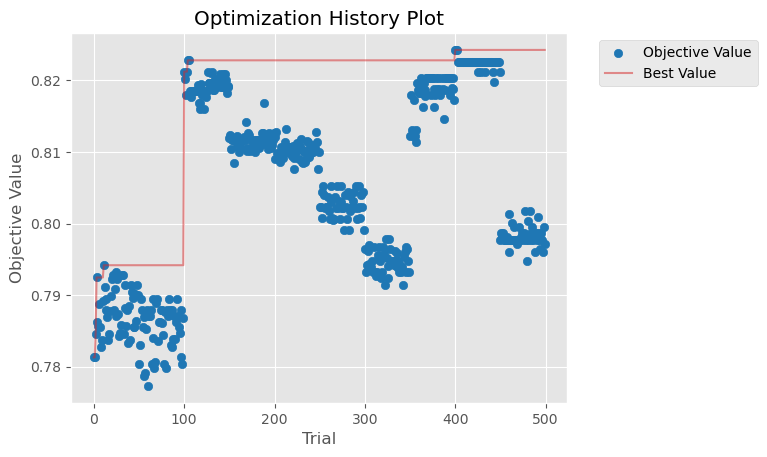

In [35]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_rf);

In [36]:
detailed_objective_rf_CV(study_rf.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,TP,20.600000,2.988868
1,TN,151.600000,2.065591
2,FP,6.000000,2.309401
3,FN,12.800000,2.973961
4,Accuracy,0.901571,0.015374
5,Precision,0.778154,0.062597
6,Sensitivity,0.616829,0.087541
7,Specificity,0.961970,0.014537
8,F1 score,0.683886,0.064213
9,F1 score (weighted),0.896614,0.017919


In [37]:
mat_met_rf_test['ave'] = mat_met_rf_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_rf_test['std'] = mat_met_rf_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_rf_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,TP,47.000000,48.000000,40.000000,35.000000,37.000000,43.000000,46.000000,41.000000,39.000000,47.000000,42.300000,4.595892
1,TN,306.000000,305.000000,304.000000,306.000000,307.000000,302.000000,302.000000,300.000000,307.000000,303.000000,304.200000,2.394438
2,FP,8.000000,9.000000,11.000000,10.000000,8.000000,13.000000,11.000000,15.000000,8.000000,10.000000,10.300000,2.311805
3,FN,21.000000,20.000000,27.000000,31.000000,30.000000,24.000000,23.000000,26.000000,28.000000,22.000000,25.200000,3.794733
4,Accuracy,0.924084,0.924084,0.900524,0.892670,0.900524,0.903141,0.910995,0.892670,0.905759,0.916230,0.907068,0.011527
5,Precision,0.854545,0.842105,0.784314,0.777778,0.822222,0.767857,0.807018,0.732143,0.829787,0.824561,0.804233,0.037977
6,Sensitivity,0.691176,0.705882,0.597015,0.530303,0.552239,0.641791,0.666667,0.611940,0.582090,0.681159,0.626026,0.060681
7,Specificity,0.974500,0.971300,0.965100,0.968400,0.974600,0.958700,0.964900,0.952400,0.974600,0.968100,0.967260,0.007324
8,F1 score,0.764228,0.768000,0.677966,0.630631,0.660714,0.699187,0.730159,0.666667,0.684211,0.746032,0.702779,0.047025
9,F1 score (weighted),0.920842,0.921397,0.895011,0.884243,0.892432,0.899641,0.907593,0.888792,0.898942,0.913029,0.902192,0.013034


In [38]:
#change to fit into these X values 

TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)



Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []
data_rf=pd.DataFrame()

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_rf = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )
        optimizedCV_rf.fit(X_train,
                          y_train, 
                          
                  )
        #print(test_idx)
        y_pred_optimized_rf = optimizedCV_rf.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_rf': y_pred_optimized_rf } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
   
        conf_matrix = confusion_matrix(y_test, y_pred_optimized_rf)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
    
        Accuracy_outer.append(accuracy_score(y_test, y_pred_optimized_rf))
        Precision_outer.append(precision_score(y_test, y_pred_optimized_rf))
        Sensitivity_outer.append(recall_score(y_test, y_pred_optimized_rf))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test, y_pred_optimized_rf))
        f1_scores_W_outer.append(f1_score(y_test, y_pred_optimized_rf, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test, y_pred_optimized_rf, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test, y_pred_optimized_rf))
        MCC_outer.append(matthews_corrcoef(y_test, y_pred_optimized_rf))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test, y_pred_optimized_rf))
    data_rf['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_rf['y_test' + str(i)] = data_inner['y_test']
    data_rf['y_pred_rf' + str(i)] = data_inner['y_pred_rf']
   # data_rf['correct' + str(i)] = correct_value
   # data_rf['pred' + str(i)] = y_pred_optimized_rf

mat_met_optimized_rf = pd.DataFrame({'Metric':['Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [ np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 

mat_met_optimized_rf

,Metric,Value (average),Value (std)
0,Accuracy,0.902408,0.015716
1,Precision,0.781280,0.063987
2,Sensitivity,0.619703,0.076392
3,Specificity,0.962312,0.014269
4,F1 score,0.687890,0.056048
5,F1 score (weighted),0.897661,0.017110
6,F1 score (macro),0.814998,0.032255
7,Balanced Accuracy,0.791004,0.037181
8,MCC,0.639137,0.061950
9,NPV,0.922976,0.014276


In [39]:
#cross valide using this optimized RF 
rf_baseline_CVscore = cross_val_score(rf_clf, X, Y, cv=10, scoring="f1_macro")
#rf_opt_testSet_score = cross_val_score(optimized_rf, X, Y, cv=10, scoring="f1_macro")
rf_opt_CVscore = cross_val_score(optimizedCV_rf, X, Y, cv=10, scoring="f1_macro")
print("RF baseline model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(rf_baseline_CVscore), np.std(rf_baseline_CVscore, ddof=1)))
#print("RF optimized model (tested on Y_te) f1_score %0.4f with a standard deviation of %0.4f" % (rf_opt_testSet_score.mean(), rf_opt_testSet_score.std()))
print("RF optimized model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(rf_opt_CVscore), np.std(rf_opt_CVscore, ddof=1)))

RF baseline model f1_score 0.8097 with a standard deviation of 0.0435
RF optimized model f1_score 0.8112 with a standard deviation of 0.0377


In [40]:
import joblib
joblib.dump(rf_clf, "OUTPUT/rf_clf_withSemiSel.joblib")
#joblib.dump(optimized_rf, "OUTPUT/optimized_rf_withSemiSel.joblib") # fitted to whole training set with last random_state selected
joblib.dump(optimizedCV_rf, "OUTPUT/optimizedCV_rf_clf_withSemiSel.joblib")

['OUTPUT/optimizedCV_rf_clf_withSemiSel.joblib']

## LGBMclassifier

In [41]:
%%time

TP=np.empty(10)
TN = np.empty(10)
FP= np.empty(10)
FN= np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W=np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]

        
        lgbm_clf = lgbm.LGBMClassifier(
        objective="binary",
        random_state=1121218,
        #n_estimators=150,
        boosting_type ="gbdt",  # default histogram binning of LGBM,
        n_jobs=8,
        #min_child_samples = 15,
        subsample=0.8, # also called bagging_fraction
        subsample_freq=10,
     
           )


        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_clf.fit(
                    X_train,
                    y_train,
                    eval_set=eval_set,
                    eval_metric="logloss",
                    #early_stopping_rounds=150,
                    verbose=False,
                    )

        y_pred = lgbm_clf.predict(X_test) 
        
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test, y_pred)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test, y_pred)
        Precision[idx] = precision_score(y_test, y_pred)
        Sensitivity[idx] = recall_score(y_test, y_pred)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
        f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
        MCC[idx] = matthews_corrcoef(y_test, y_pred)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test, y_pred)


mat_met_lgbm = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
print(mat_met_lgbm)

                 Metric  Value (average)  Value (std)
0                    TP        21.200000     2.440401
1                    TN       150.700000     1.636392
2                    FP         6.900000     2.078995
3                    FN        12.200000     2.347576
4              Accuracy         0.900000     0.016269
5             Precision         0.755931     0.062577
6           Sensitivity         0.634649     0.069260
7           Specificity         0.956270     0.013022
8              F1 score         0.688120     0.056352
9   F1 score (weighted)         0.896377     0.017163
10     F1 score (macro)         0.814275     0.032793
11    Balanced Accuracy         0.795456     0.035788
12                  MCC         0.633857     0.064282
13                  NPV         0.925300     0.013402
14              ROC_AUC         0.795456     0.035788
CPU times: user 11.4 s, sys: 92 ms, total: 11.5 s
Wall time: 1.5 s


In [42]:
import optuna  

def objective_lgbm_CV(trial, X, Y, Y_class):
    param_grid = {
        #"device_type": trial.suggestegorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_bin": trial.suggest_int("max_bin", 150, 300),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0, 0.001),
        #"lambda_l2": trial.suggest_float("lambda_l2", 1.0,100),
        "num_leaves": trial.suggest_int("num_leaves", 30, 750),
        #"min_child_samples": trial.suggest_int("min_child_samples", 15, 100),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.6,1),
        #"bagging_freq": trial.suggestegorical("bagging_freq", [1]),
        }
  
    
    
    
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        lgbm_model = lgbm.LGBMClassifier(objective="binary", 
                                            random_state=1121218, 
                                            boosting_type ="gbdt", 
                                            **param_grid, n_jobs=8,
                                            subsample=0.8, # also called bagging_fraction
                                            subsample_freq=10,
                                         )
    
        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_model.fit(
                X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        y_pred = lgbm_model.predict(X_test)
        cv_scores[idx] = f1_score(y_test, y_pred, average="macro")
       
        
    return np.mean(cv_scores)

In [43]:
#this is basically inner set parameters
def detailed_objective_lgbm_cv(trial, X, Y, Y_class):
    param_grid = {
        #"device_type": trial.suggestegorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_bin": trial.suggest_int("max_bin", 150, 300),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0, 0.001),
        #"lambda_l2": trial.suggest_float("lambda_l2", 1.0,100),
        "num_leaves": trial.suggest_int("num_leaves", 30, 750),
        #"min_child_samples": trial.suggest_int("min_child_samples", 15, 100),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.6,1),
        #"bagging_freq": trial.suggestegorical("bagging_freq", [1]),
        
    }
    
    
  
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M =np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        lgbm_model = lgbm.LGBMClassifier(objective="binary", 
                                            random_state=1121218, 
                                            boosting_type ="gbdt", 
                                            **param_grid, n_jobs=8,
                                            subsample=0.8, # also called bagging_fraction
                                            subsample_freq=10,
                                         )
    
        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_model.fit(
                X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        
        y_pred = lgbm_model.predict(X_test)
        
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test, y_pred)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test, y_pred)
        Precision[idx] = precision_score(y_test, y_pred)
        Sensitivity[idx] = recall_score(y_test, y_pred)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
        f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
        MCC[idx] = matthews_corrcoef(y_test, y_pred)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test, y_pred)


    mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    print(mat_met)

In [44]:
#Execute optuna and set hyperparameters
study_lgbm = optuna.create_study(direction='maximize', study_name="LGBMClassifier")
func_lgbm_0 = lambda trial: objective_lgbm_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_lgbm.optimize(func_lgbm_0, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 17:48:35,824] A new study created in memory with name: LGBMClassifier
[I 2023-12-05 17:48:36,852] Trial 0 finished with value: 0.8126660921062351 and parameters: {'n_estimators': 475, 'learning_rate': 0.15507938422246212, 'max_depth': 9, 'max_bin': 226, 'num_leaves': 576}. Best is trial 0 with value: 0.8126660921062351.
[I 2023-12-05 17:48:38,661] Trial 1 finished with value: 0.7969453964342158 and parameters: {'n_estimators': 256, 'learning_rate': 0.02842033094223168, 'max_depth': 11, 'max_bin': 272, 'num_leaves': 202}. Best is trial 0 with value: 0.8126660921062351.
[I 2023-12-05 17:48:39,081] Trial 2 finished with value: 0.7906978691801592 and parameters: {'n_estimators': 54, 'learning_rate': 0.15788856639567778, 'max_depth': 5, 'max_bin': 151, 'num_leaves': 193}. Best is trial 0 with value: 0.8126660921062351.
[I 2023-12-05 17:48:40,054] Trial 3 finished with value: 0.8091246511377601 and parameters: {'n_estimators': 158, 'learning_rate': 0.10991921153151461, 'max_dep

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

[I 2023-12-05 17:49:11,226] Trial 32 finished with value: 0.8105587923865393 and parameters: {'n_estimators': 234, 'learning_rate': 0.07465090486168496, 'max_depth': 11, 'max_bin': 295, 'num_leaves': 31}. Best is trial 0 with value: 0.8126660921062351.
[I 2023-12-05 17:49:12,467] Trial 33 finished with value: 0.8119903268040989 and parameters: {'n_estimators': 278, 'learning_rate': 0.07565578378527377, 'max_depth': 11, 'max_bin': 278, 'num_leaves': 254}. Best is trial 0 with value: 0.8126660921062351.
[I 2023-12-05 17:49:13,805] Trial 34 finished with value: 0.8084790181825756 and parameters: {'n_estimators': 310, 'learning_rate': 0.0626072091441671, 'max_depth': 11, 'max_bin': 287, 'num_leaves': 242}. Best is trial 0 with value: 0.8126660921062351.
[I 2023-12-05 17:49:14,969] Trial 35 finished with value: 0.8041265769748627 and parameters: {'n_estimators': 399, 'learning_rate': 0.0978436529690251, 'max_depth': 12, 'max_bin': 258, 'num_leaves': 303}. Best is trial 0 with value: 0.81266

	Number of trials: 50.0
	Best value (f1_score): 0.8165
	Best params:
		n_estimators: 311
		learning_rate: 0.06855485984623058
		max_depth: 12
		max_bin: 281
		num_leaves: 102


In [45]:
optimized_lgbm_0 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )
                                         
    
eval_set = [(X_testSet0, Y_testSet0)]
optimized_lgbm_0.fit(X_trainSet0,
                Y_trainSet0,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )

#predict        
y_pred_lgbm_0 = optimized_lgbm_0.predict(X_testSet0)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0, y_pred_lgbm_0)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0, y_pred_lgbm_0)
Precision = precision_score(Y_testSet0, y_pred_lgbm_0)
Sensitivity = recall_score(Y_testSet0, y_pred_lgbm_0)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0, y_pred_lgbm_0)      
f1_scores_W = f1_score(Y_testSet0, y_pred_lgbm_0, average="weighted")
f1_scores_M = f1_score(Y_testSet0, y_pred_lgbm_0, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0, y_pred_lgbm_0)
MCC = matthews_corrcoef(Y_testSet0, y_pred_lgbm_0)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0, y_pred_lgbm_0)


mat_met_lgbm_test = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
    
print(mat_met_lgbm_test)



                 Metric        Set0
0                    TP   42.000000
1                    TN  309.000000
2                    FP    5.000000
3                    FN   26.000000
4              Accuracy    0.918848
5             Precision    0.893617
6           Sensitivity    0.617647
7           Specificity    0.984100
8              F1 score    0.730435
9   F1 score (weighted)    0.912752
10     F1 score (macro)    0.841334
11    Balanced Accuracy    0.800862
12                  MCC    0.700721
13                  NPV    0.922400
14              ROC_AUC    0.800862


In [46]:
#Execute optuna and set hyperparameters

func_lgbm_1 = lambda trial: objective_lgbm_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_lgbm.optimize(func_lgbm_1, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 17:49:31,357] Trial 50 finished with value: 0.7789413007796374 and parameters: {'n_estimators': 482, 'learning_rate': 0.0715428979428422, 'max_depth': 6, 'max_bin': 179, 'num_leaves': 172}. Best is trial 42 with value: 0.8164937960220016.
[I 2023-12-05 17:49:32,435] Trial 51 finished with value: 0.7793687677314829 and parameters: {'n_estimators': 207, 'learning_rate': 0.0744999146630336, 'max_depth': 12, 'max_bin': 294, 'num_leaves': 71}. Best is trial 42 with value: 0.8164937960220016.
[I 2023-12-05 17:49:33,485] Trial 52 finished with value: 0.7806878207816053 and parameters: {'n_estimators': 186, 'learning_rate': 0.08332277420537246, 'max_depth': 11, 'max_bin': 280, 'num_leaves': 290}. Best is trial 42 with value: 0.8164937960220016.
[I 2023-12-05 17:49:34,433] Trial 53 finished with value: 0.7777868166337831 and parameters: {'n_estimators': 234, 'learning_rate': 0.09369573477971067, 'max_depth': 11, 'max_bin': 264, 'num_leaves': 32}. Best is trial 42 with value: 0.816

	Number of trials: 100.0
	Best value (f1_score): 0.8165
	Best params:
		n_estimators: 311
		learning_rate: 0.06855485984623058
		max_depth: 12
		max_bin: 281
		num_leaves: 102


In [47]:
optimized_lgbm_1 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )
    
eval_set = [(X_testSet1, Y_testSet1)]
optimized_lgbm_1.fit(X_trainSet1,
                Y_trainSet1,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )

#predict        
y_pred_lgbm_1 = optimized_lgbm_1.predict(X_testSet1)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1, y_pred_lgbm_1)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1, y_pred_lgbm_1)
Precision = precision_score(Y_testSet1, y_pred_lgbm_1)
Sensitivity = recall_score(Y_testSet1, y_pred_lgbm_1)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1, y_pred_lgbm_1)      
f1_scores_W = f1_score(Y_testSet1, y_pred_lgbm_1, average="weighted")
f1_scores_M = f1_score(Y_testSet1, y_pred_lgbm_1, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1, y_pred_lgbm_1)
MCC = matthews_corrcoef(Y_testSet1, y_pred_lgbm_1)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1, y_pred_lgbm_1)


set1 = pd.DataFrame({ 'Set1':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set1'] =set1
print(mat_met_lgbm_test)


                 Metric        Set0        Set1
0                    TP   42.000000   49.000000
1                    TN  309.000000  307.000000
2                    FP    5.000000    7.000000
3                    FN   26.000000   19.000000
4              Accuracy    0.918848    0.931937
5             Precision    0.893617    0.875000
6           Sensitivity    0.617647    0.720588
7           Specificity    0.984100    0.977700
8              F1 score    0.730435    0.790323
9   F1 score (weighted)    0.912752    0.929282
10     F1 score (macro)    0.841334    0.874849
11    Balanced Accuracy    0.800862    0.849148
12                  MCC    0.700721    0.755189
13                  NPV    0.922400    0.941700
14              ROC_AUC    0.800862    0.849148


In [48]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_2 = lambda trial: objective_lgbm_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_lgbm.optimize(func_lgbm_2, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 17:50:21,278] Trial 100 finished with value: 0.8107829181022919 and parameters: {'n_estimators': 131, 'learning_rate': 0.1036123063335545, 'max_depth': 10, 'max_bin': 214, 'num_leaves': 47}. Best is trial 42 with value: 0.8164937960220016.
[I 2023-12-05 17:50:22,301] Trial 101 finished with value: 0.822432089792845 and parameters: {'n_estimators': 247, 'learning_rate': 0.08325386235216893, 'max_depth': 10, 'max_bin': 214, 'num_leaves': 49}. Best is trial 101 with value: 0.822432089792845.
[I 2023-12-05 17:50:23,251] Trial 102 finished with value: 0.8195221099293398 and parameters: {'n_estimators': 133, 'learning_rate': 0.1033109304785258, 'max_depth': 10, 'max_bin': 214, 'num_leaves': 50}. Best is trial 101 with value: 0.822432089792845.
[I 2023-12-05 17:50:24,191] Trial 103 finished with value: 0.814079253537521 and parameters: {'n_estimators': 134, 'learning_rate': 0.10204205577605423, 'max_depth': 10, 'max_bin': 209, 'num_leaves': 76}. Best is trial 101 with value: 0.8

	Number of trials: 150.0
	Best value (f1_score): 0.8241
	Best params:
		n_estimators: 99
		learning_rate: 0.10189959615102016
		max_depth: 9
		max_bin: 214
		num_leaves: 80


In [49]:
optimized_lgbm_2 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet2, Y_testSet2)]
optimized_lgbm_2.fit(X_trainSet2,
                Y_trainSet2,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_2 = optimized_lgbm_2.predict(X_testSet2)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2, y_pred_lgbm_2)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2, y_pred_lgbm_2)
Precision = precision_score(Y_testSet2, y_pred_lgbm_2)
Sensitivity = recall_score(Y_testSet2, y_pred_lgbm_2)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2, y_pred_lgbm_2)      
f1_scores_W = f1_score(Y_testSet2, y_pred_lgbm_2, average="weighted")
f1_scores_M = f1_score(Y_testSet2, y_pred_lgbm_2, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2, y_pred_lgbm_2)
MCC = matthews_corrcoef(Y_testSet2, y_pred_lgbm_2)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2, y_pred_lgbm_2)


Set2 = pd.DataFrame({ 'Set2':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set2'] = Set2
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2
0                    TP   42.000000   49.000000   39.000000
1                    TN  309.000000  307.000000  306.000000
2                    FP    5.000000    7.000000    9.000000
3                    FN   26.000000   19.000000   28.000000
4              Accuracy    0.918848    0.931937    0.903141
5             Precision    0.893617    0.875000    0.812500
6           Sensitivity    0.617647    0.720588    0.582090
7           Specificity    0.984100    0.977700    0.971400
8              F1 score    0.730435    0.790323    0.678261
9   F1 score (weighted)    0.912752    0.929282    0.896558
10     F1 score (macro)    0.841334    0.874849    0.810625
11    Balanced Accuracy    0.800862    0.849148    0.776759
12                  MCC    0.700721    0.755189    0.635083
13                  NPV    0.922400    0.941700    0.916200
14              ROC_AUC    0.800862    0.849148    0.776759


In [50]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_3 = lambda trial: objective_lgbm_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_lgbm.optimize(func_lgbm_3, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 17:51:01,000] Trial 150 finished with value: 0.805855273211083 and parameters: {'n_estimators': 127, 'learning_rate': 0.13321682836618015, 'max_depth': 7, 'max_bin': 204, 'num_leaves': 101}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:51:01,833] Trial 151 finished with value: 0.8048589466735789 and parameters: {'n_estimators': 149, 'learning_rate': 0.11500255758270399, 'max_depth': 7, 'max_bin': 212, 'num_leaves': 87}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:51:02,556] Trial 152 finished with value: 0.8057822326197002 and parameters: {'n_estimators': 118, 'learning_rate': 0.12695513424451263, 'max_depth': 6, 'max_bin': 222, 'num_leaves': 114}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:51:03,438] Trial 153 finished with value: 0.8067056143990602 and parameters: {'n_estimators': 167, 'learning_rate': 0.10686294279025334, 'max_depth': 7, 'max_bin': 216, 'num_leaves': 150}. Best is trial 120 with value

	Number of trials: 200.0
	Best value (f1_score): 0.8241
	Best params:
		n_estimators: 99
		learning_rate: 0.10189959615102016
		max_depth: 9
		max_bin: 214
		num_leaves: 80


In [51]:
optimized_lgbm_3 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                    max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet3, Y_testSet3)]
optimized_lgbm_3.fit(X_trainSet3,
                Y_trainSet3,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_3 = optimized_lgbm_3.predict(X_testSet3)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3, y_pred_lgbm_3)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3, y_pred_lgbm_3)
Precision = precision_score(Y_testSet3, y_pred_lgbm_3)
Sensitivity = recall_score(Y_testSet3, y_pred_lgbm_3)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3, y_pred_lgbm_3)      
f1_scores_W = f1_score(Y_testSet3, y_pred_lgbm_3, average="weighted")
f1_scores_M = f1_score(Y_testSet3, y_pred_lgbm_3, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3, y_pred_lgbm_3)
MCC = matthews_corrcoef(Y_testSet3, y_pred_lgbm_3)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3, y_pred_lgbm_3)


Set3 = pd.DataFrame({ 'Set3':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set3'] = Set3
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3
0                    TP   42.000000   49.000000   39.000000   38.000000
1                    TN  309.000000  307.000000  306.000000  309.000000
2                    FP    5.000000    7.000000    9.000000    7.000000
3                    FN   26.000000   19.000000   28.000000   28.000000
4              Accuracy    0.918848    0.931937    0.903141    0.908377
5             Precision    0.893617    0.875000    0.812500    0.844444
6           Sensitivity    0.617647    0.720588    0.582090    0.575758
7           Specificity    0.984100    0.977700    0.971400    0.977800
8              F1 score    0.730435    0.790323    0.678261    0.684685
9   F1 score (weighted)    0.912752    0.929282    0.896558    0.901183
10     F1 score (macro)    0.841334    0.874849    0.810625    0.815543
11    Balanced Accuracy    0.800862    0.849148    0.776759    0.776803
12                  MCC    0.700721    0.755189    0.635083    0

In [52]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_4 = lambda trial: objective_lgbm_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_lgbm.optimize(func_lgbm_4, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 17:51:40,997] Trial 200 finished with value: 0.7974566092663969 and parameters: {'n_estimators': 159, 'learning_rate': 0.10897694044404531, 'max_depth': 7, 'max_bin': 209, 'num_leaves': 48}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:51:41,856] Trial 201 finished with value: 0.8094179964696104 and parameters: {'n_estimators': 108, 'learning_rate': 0.11209498070293998, 'max_depth': 9, 'max_bin': 226, 'num_leaves': 64}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:51:42,631] Trial 202 finished with value: 0.79841586345858 and parameters: {'n_estimators': 90, 'learning_rate': 0.1176153170856464, 'max_depth': 9, 'max_bin': 214, 'num_leaves': 30}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:51:43,587] Trial 203 finished with value: 0.8125311798361409 and parameters: {'n_estimators': 122, 'learning_rate': 0.10878382525253111, 'max_depth': 10, 'max_bin': 233, 'num_leaves': 74}. Best is trial 120 with value: 0.8

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


[I 2023-12-05 17:52:01,867] Trial 226 finished with value: 0.818352922474662 and parameters: {'n_estimators': 144, 'learning_rate': 0.10485840208384388, 'max_depth': 8, 'max_bin': 255, 'num_leaves': 31}. Best is trial 120 with value: 0.8240512221088103.


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


[I 2023-12-05 17:52:02,559] Trial 227 finished with value: 0.8080804536831685 and parameters: {'n_estimators': 137, 'learning_rate': 0.11331026894717469, 'max_depth': 5, 'max_bin': 228, 'num_leaves': 36}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:52:03,385] Trial 228 finished with value: 0.8051043885600999 and parameters: {'n_estimators': 156, 'learning_rate': 0.10560879745944829, 'max_depth': 7, 'max_bin': 249, 'num_leaves': 33}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:52:04,386] Trial 229 finished with value: 0.8151021544143877 and parameters: {'n_estimators': 177, 'learning_rate': 0.12171505480156562, 'max_depth': 9, 'max_bin': 241, 'num_leaves': 48}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:52:05,235] Trial 230 finished with value: 0.8097455228050399 and parameters: {'n_estimators': 132, 'learning_rate': 0.11910476296595233, 'max_depth': 8, 'max_bin': 235, 'num_leaves': 30}. Best is trial 120 with value: 

	Number of trials: 250.0
	Best value (f1_score): 0.8241
	Best params:
		n_estimators: 99
		learning_rate: 0.10189959615102016
		max_depth: 9
		max_bin: 214
		num_leaves: 80


In [53]:
optimized_lgbm_4 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet4, Y_testSet4)]
optimized_lgbm_4.fit(X_trainSet4,
                Y_trainSet4,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_4 = optimized_lgbm_4.predict(X_testSet4)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4, y_pred_lgbm_4)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4, y_pred_lgbm_4)
Precision = precision_score(Y_testSet4, y_pred_lgbm_4)
Sensitivity = recall_score(Y_testSet4, y_pred_lgbm_4)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4, y_pred_lgbm_4)      
f1_scores_W = f1_score(Y_testSet4, y_pred_lgbm_4, average="weighted")
f1_scores_M = f1_score(Y_testSet4, y_pred_lgbm_4, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4, y_pred_lgbm_4)
MCC = matthews_corrcoef(Y_testSet4, y_pred_lgbm_4)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4, y_pred_lgbm_4)


Set4 = pd.DataFrame({ 'Set4':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set4'] = Set4
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   42.000000   49.000000   39.000000   38.000000   
1                    TN  309.000000  307.000000  306.000000  309.000000   
2                    FP    5.000000    7.000000    9.000000    7.000000   
3                    FN   26.000000   19.000000   28.000000   28.000000   
4              Accuracy    0.918848    0.931937    0.903141    0.908377   
5             Precision    0.893617    0.875000    0.812500    0.844444   
6           Sensitivity    0.617647    0.720588    0.582090    0.575758   
7           Specificity    0.984100    0.977700    0.971400    0.977800   
8              F1 score    0.730435    0.790323    0.678261    0.684685   
9   F1 score (weighted)    0.912752    0.929282    0.896558    0.901183   
10     F1 score (macro)    0.841334    0.874849    0.810625    0.815543   
11    Balanced Accuracy    0.800862    0.849148    0.776759    0.776803   
12                  MCC  

In [54]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_5 = lambda trial: objective_lgbm_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_lgbm.optimize(func_lgbm_5, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 17:52:22,161] Trial 250 finished with value: 0.8044093308971604 and parameters: {'n_estimators': 150, 'learning_rate': 0.11788255709953029, 'max_depth': 9, 'max_bin': 211, 'num_leaves': 58}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:52:22,965] Trial 251 finished with value: 0.7968556215518585 and parameters: {'n_estimators': 86, 'learning_rate': 0.10554426289139911, 'max_depth': 9, 'max_bin': 217, 'num_leaves': 112}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:52:23,728] Trial 252 finished with value: 0.8016507165200389 and parameters: {'n_estimators': 104, 'learning_rate': 0.10872790525598919, 'max_depth': 7, 'max_bin': 196, 'num_leaves': 75}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:52:24,677] Trial 253 finished with value: 0.8061755689727848 and parameters: {'n_estimators': 131, 'learning_rate': 0.12179538557429143, 'max_depth': 10, 'max_bin': 221, 'num_leaves': 53}. Best is trial 120 with value:

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


[I 2023-12-05 17:52:28,154] Trial 257 finished with value: 0.783870923818214 and parameters: {'n_estimators': 98, 'learning_rate': 0.0737261946809102, 'max_depth': 9, 'max_bin': 208, 'num_leaves': 31}. Best is trial 120 with value: 0.8240512221088103.


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


[I 2023-12-05 17:52:29,098] Trial 258 finished with value: 0.7991975193776436 and parameters: {'n_estimators': 142, 'learning_rate': 0.0953994683443598, 'max_depth': 8, 'max_bin': 212, 'num_leaves': 83}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:52:29,611] Trial 259 finished with value: 0.7826097452201012 and parameters: {'n_estimators': 83, 'learning_rate': 0.12841395167385455, 'max_depth': 4, 'max_bin': 218, 'num_leaves': 45}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:52:30,494] Trial 260 finished with value: 0.803554959141986 and parameters: {'n_estimators': 430, 'learning_rate': 0.12320383873248147, 'max_depth': 7, 'max_bin': 227, 'num_leaves': 137}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:52:31,427] Trial 261 finished with value: 0.7952239190669129 and parameters: {'n_estimators': 359, 'learning_rate': 0.11663257590714987, 'max_depth': 10, 'max_bin': 205, 'num_leaves': 95}. Best is trial 120 with value: 0

	Number of trials: 300.0
	Best value (f1_score): 0.8241
	Best params:
		n_estimators: 99
		learning_rate: 0.10189959615102016
		max_depth: 9
		max_bin: 214
		num_leaves: 80


In [55]:
optimized_lgbm_5 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet5, Y_testSet5)]
optimized_lgbm_5.fit(X_trainSet5,
                Y_trainSet5,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_5 = optimized_lgbm_5.predict(X_testSet5)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5, y_pred_lgbm_5)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5, y_pred_lgbm_5)
Precision = precision_score(Y_testSet5, y_pred_lgbm_5)
Sensitivity = recall_score(Y_testSet5, y_pred_lgbm_5)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5, y_pred_lgbm_5)      
f1_scores_W = f1_score(Y_testSet5, y_pred_lgbm_5, average="weighted")
f1_scores_M = f1_score(Y_testSet5, y_pred_lgbm_5, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5, y_pred_lgbm_5)
MCC = matthews_corrcoef(Y_testSet5, y_pred_lgbm_5)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5, y_pred_lgbm_5)


Set5 = pd.DataFrame({ 'Set5':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set5'] = Set5
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   42.000000   49.000000   39.000000   38.000000   
1                    TN  309.000000  307.000000  306.000000  309.000000   
2                    FP    5.000000    7.000000    9.000000    7.000000   
3                    FN   26.000000   19.000000   28.000000   28.000000   
4              Accuracy    0.918848    0.931937    0.903141    0.908377   
5             Precision    0.893617    0.875000    0.812500    0.844444   
6           Sensitivity    0.617647    0.720588    0.582090    0.575758   
7           Specificity    0.984100    0.977700    0.971400    0.977800   
8              F1 score    0.730435    0.790323    0.678261    0.684685   
9   F1 score (weighted)    0.912752    0.929282    0.896558    0.901183   
10     F1 score (macro)    0.841334    0.874849    0.810625    0.815543   
11    Balanced Accuracy    0.800862    0.849148    0.776759    0.776803   
12                  MCC  

In [56]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_6 = lambda trial: objective_lgbm_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_lgbm.optimize(func_lgbm_6, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.6f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 17:53:06,912] Trial 300 finished with value: 0.7898174659848138 and parameters: {'n_estimators': 534, 'learning_rate': 0.13639111545320765, 'max_depth': 8, 'max_bin': 223, 'num_leaves': 124}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:53:07,467] Trial 301 finished with value: 0.7897047924072691 and parameters: {'n_estimators': 66, 'learning_rate': 0.13185644077061592, 'max_depth': 6, 'max_bin': 212, 'num_leaves': 57}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:53:08,414] Trial 302 finished with value: 0.7853639599197197 and parameters: {'n_estimators': 157, 'learning_rate': 0.09643245456669865, 'max_depth': 9, 'max_bin': 227, 'num_leaves': 149}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:53:08,977] Trial 303 finished with value: 0.7798599111435662 and parameters: {'n_estimators': 101, 'learning_rate': 0.18903809635637897, 'max_depth': 5, 'max_bin': 220, 'num_leaves': 75}. Best is trial 120 with value:

	Number of trials: 350.0
	Best value (f1_score): 0.824051
	Best params:
		n_estimators: 99
		learning_rate: 0.10189959615102016
		max_depth: 9
		max_bin: 214
		num_leaves: 80


In [57]:
optimized_lgbm_6 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet6, Y_testSet6)]
optimized_lgbm_6.fit(X_trainSet6,
                Y_trainSet6,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_6 = optimized_lgbm_6.predict(X_testSet6)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6, y_pred_lgbm_6)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6, y_pred_lgbm_6)
Precision = precision_score(Y_testSet6, y_pred_lgbm_6)
Sensitivity = recall_score(Y_testSet6, y_pred_lgbm_6)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6, y_pred_lgbm_6)      
f1_scores_W = f1_score(Y_testSet6, y_pred_lgbm_6, average="weighted")
f1_scores_M = f1_score(Y_testSet6, y_pred_lgbm_6, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6, y_pred_lgbm_6)
MCC = matthews_corrcoef(Y_testSet6, y_pred_lgbm_6)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6, y_pred_lgbm_6)


Set6 = pd.DataFrame({ 'Set6':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set6'] = Set6
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   42.000000   49.000000   39.000000   38.000000   
1                    TN  309.000000  307.000000  306.000000  309.000000   
2                    FP    5.000000    7.000000    9.000000    7.000000   
3                    FN   26.000000   19.000000   28.000000   28.000000   
4              Accuracy    0.918848    0.931937    0.903141    0.908377   
5             Precision    0.893617    0.875000    0.812500    0.844444   
6           Sensitivity    0.617647    0.720588    0.582090    0.575758   
7           Specificity    0.984100    0.977700    0.971400    0.977800   
8              F1 score    0.730435    0.790323    0.678261    0.684685   
9   F1 score (weighted)    0.912752    0.929282    0.896558    0.901183   
10     F1 score (macro)    0.841334    0.874849    0.810625    0.815543   
11    Balanced Accuracy    0.800862    0.849148    0.776759    0.776803   
12                  MCC  

In [58]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_7 = lambda trial: objective_lgbm_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_lgbm.optimize(func_lgbm_7, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.7f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 17:53:48,720] Trial 350 finished with value: 0.6900650073694713 and parameters: {'n_estimators': 95, 'learning_rate': 0.012388338369440352, 'max_depth': 9, 'max_bin': 280, 'num_leaves': 73}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:53:49,372] Trial 351 finished with value: 0.7999094747857305 and parameters: {'n_estimators': 65, 'learning_rate': 0.1450656016939398, 'max_depth': 8, 'max_bin': 219, 'num_leaves': 139}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:53:50,814] Trial 352 finished with value: 0.8125645123752188 and parameters: {'n_estimators': 151, 'learning_rate': 0.0551092375697559, 'max_depth': 11, 'max_bin': 201, 'num_leaves': 536}. Best is trial 120 with value: 0.8240512221088103.
[I 2023-12-05 17:53:51,780] Trial 353 finished with value: 0.8062875965326887 and parameters: {'n_estimators': 106, 'learning_rate': 0.062275429903159894, 'max_depth': 9, 'max_bin': 232, 'num_leaves': 93}. Best is trial 120 with value:

	Number of trials: 400.0
	Best value (f1_score): 0.8246396
	Best params:
		n_estimators: 193
		learning_rate: 0.08119223817993149
		max_depth: 10
		max_bin: 204
		num_leaves: 150


In [59]:
optimized_lgbm_7 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet7, Y_testSet7)]
optimized_lgbm_7.fit(X_trainSet7,
                Y_trainSet7,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_7 = optimized_lgbm_7.predict(X_testSet7)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7, y_pred_lgbm_7)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7, y_pred_lgbm_7)
Precision = precision_score(Y_testSet7, y_pred_lgbm_7)
Sensitivity = recall_score(Y_testSet7, y_pred_lgbm_7)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7, y_pred_lgbm_7)      
f1_scores_W = f1_score(Y_testSet7, y_pred_lgbm_7, average="weighted")
f1_scores_M = f1_score(Y_testSet7, y_pred_lgbm_7, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7, y_pred_lgbm_7)
MCC = matthews_corrcoef(Y_testSet7, y_pred_lgbm_7)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7, y_pred_lgbm_7)


Set7 = pd.DataFrame({ 'Set7':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set7'] = Set7
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   42.000000   49.000000   39.000000   38.000000   
1                    TN  309.000000  307.000000  306.000000  309.000000   
2                    FP    5.000000    7.000000    9.000000    7.000000   
3                    FN   26.000000   19.000000   28.000000   28.000000   
4              Accuracy    0.918848    0.931937    0.903141    0.908377   
5             Precision    0.893617    0.875000    0.812500    0.844444   
6           Sensitivity    0.617647    0.720588    0.582090    0.575758   
7           Specificity    0.984100    0.977700    0.971400    0.977800   
8              F1 score    0.730435    0.790323    0.678261    0.684685   
9   F1 score (weighted)    0.912752    0.929282    0.896558    0.901183   
10     F1 score (macro)    0.841334    0.874849    0.810625    0.815543   
11    Balanced Accuracy    0.800862    0.849148    0.776759    0.776803   
12                  MCC  

In [60]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_8 = lambda trial: objective_lgbm_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_lgbm.optimize(func_lgbm_8, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.8f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 17:54:44,255] Trial 400 finished with value: 0.8289436443515321 and parameters: {'n_estimators': 220, 'learning_rate': 0.06771770912453205, 'max_depth': 10, 'max_bin': 211, 'num_leaves': 245}. Best is trial 400 with value: 0.8289436443515321.
[I 2023-12-05 17:54:45,471] Trial 401 finished with value: 0.8270129993240223 and parameters: {'n_estimators': 254, 'learning_rate': 0.06983469248117388, 'max_depth': 10, 'max_bin': 210, 'num_leaves': 270}. Best is trial 400 with value: 0.8289436443515321.
[I 2023-12-05 17:54:46,698] Trial 402 finished with value: 0.8149358139429191 and parameters: {'n_estimators': 258, 'learning_rate': 0.06877126188944199, 'max_depth': 10, 'max_bin': 210, 'num_leaves': 254}. Best is trial 400 with value: 0.8289436443515321.
[I 2023-12-05 17:54:47,938] Trial 403 finished with value: 0.8251782777824396 and parameters: {'n_estimators': 232, 'learning_rate': 0.07002861175234286, 'max_depth': 10, 'max_bin': 206, 'num_leaves': 194}. Best is trial 400 with

	Number of trials: 450.0
	Best value (f1_score): 0.83599654
	Best params:
		n_estimators: 373
		learning_rate: 0.07048752776926567
		max_depth: 10
		max_bin: 185
		num_leaves: 247


In [61]:
optimized_lgbm_8 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet8, Y_testSet8)]
optimized_lgbm_8.fit(X_trainSet8,
                Y_trainSet8,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_8 = optimized_lgbm_8.predict(X_testSet8)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8, y_pred_lgbm_8)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8, y_pred_lgbm_8)
Precision = precision_score(Y_testSet8, y_pred_lgbm_8)
Sensitivity = recall_score(Y_testSet8, y_pred_lgbm_8)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8, y_pred_lgbm_8)      
f1_scores_W = f1_score(Y_testSet8, y_pred_lgbm_8, average="weighted")
f1_scores_M = f1_score(Y_testSet8, y_pred_lgbm_8, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8, y_pred_lgbm_8)
MCC = matthews_corrcoef(Y_testSet8, y_pred_lgbm_8)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8, y_pred_lgbm_8)


Set8 = pd.DataFrame({ 'Set8':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set8'] = Set8
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   42.000000   49.000000   39.000000   38.000000   
1                    TN  309.000000  307.000000  306.000000  309.000000   
2                    FP    5.000000    7.000000    9.000000    7.000000   
3                    FN   26.000000   19.000000   28.000000   28.000000   
4              Accuracy    0.918848    0.931937    0.903141    0.908377   
5             Precision    0.893617    0.875000    0.812500    0.844444   
6           Sensitivity    0.617647    0.720588    0.582090    0.575758   
7           Specificity    0.984100    0.977700    0.971400    0.977800   
8              F1 score    0.730435    0.790323    0.678261    0.684685   
9   F1 score (weighted)    0.912752    0.929282    0.896558    0.901183   
10     F1 score (macro)    0.841334    0.874849    0.810625    0.815543   
11    Balanced Accuracy    0.800862    0.849148    0.776759    0.776803   
12                  MCC  

In [62]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_9 = lambda trial: objective_lgbm_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_lgbm.optimize(func_lgbm_9, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.9f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 17:55:49,290] Trial 450 finished with value: 0.7985808042204546 and parameters: {'n_estimators': 344, 'learning_rate': 0.06968069422334146, 'max_depth': 10, 'max_bin': 169, 'num_leaves': 244}. Best is trial 448 with value: 0.8359965382704905.
[I 2023-12-05 17:55:50,439] Trial 451 finished with value: 0.8136335850127617 and parameters: {'n_estimators': 368, 'learning_rate': 0.07023418683577953, 'max_depth': 10, 'max_bin': 185, 'num_leaves': 237}. Best is trial 448 with value: 0.8359965382704905.
[I 2023-12-05 17:55:51,599] Trial 452 finished with value: 0.8049737313959702 and parameters: {'n_estimators': 332, 'learning_rate': 0.06866458368498166, 'max_depth': 10, 'max_bin': 169, 'num_leaves': 252}. Best is trial 448 with value: 0.8359965382704905.
[I 2023-12-05 17:55:52,824] Trial 453 finished with value: 0.8023369034775929 and parameters: {'n_estimators': 373, 'learning_rate': 0.05637983344559588, 'max_depth': 10, 'max_bin': 188, 'num_leaves': 214}. Best is trial 448 with

	Number of trials: 500.0
	Best value (f1_score): 0.835996538
	Best params:
		n_estimators: 373
		learning_rate: 0.07048752776926567
		max_depth: 10
		max_bin: 185
		num_leaves: 247


In [63]:
optimized_lgbm_9 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet9, Y_testSet9)]
optimized_lgbm_9.fit(X_trainSet9,
                Y_trainSet9,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_9 = optimized_lgbm_9.predict(X_testSet9)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9, y_pred_lgbm_9)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9, y_pred_lgbm_9)
Precision = precision_score(Y_testSet9, y_pred_lgbm_9)
Sensitivity = recall_score(Y_testSet9, y_pred_lgbm_9)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9, y_pred_lgbm_9)      
f1_scores_W = f1_score(Y_testSet9, y_pred_lgbm_9, average="weighted")
f1_scores_M = f1_score(Y_testSet9, y_pred_lgbm_9, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9, y_pred_lgbm_9)
MCC = matthews_corrcoef(Y_testSet9, y_pred_lgbm_9)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9, y_pred_lgbm_9)


Set9 = pd.DataFrame({ 'Set9':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set9'] = Set9
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   42.000000   49.000000   39.000000   38.000000   
1                    TN  309.000000  307.000000  306.000000  309.000000   
2                    FP    5.000000    7.000000    9.000000    7.000000   
3                    FN   26.000000   19.000000   28.000000   28.000000   
4              Accuracy    0.918848    0.931937    0.903141    0.908377   
5             Precision    0.893617    0.875000    0.812500    0.844444   
6           Sensitivity    0.617647    0.720588    0.582090    0.575758   
7           Specificity    0.984100    0.977700    0.971400    0.977800   
8              F1 score    0.730435    0.790323    0.678261    0.684685   
9   F1 score (weighted)    0.912752    0.929282    0.896558    0.901183   
10     F1 score (macro)    0.841334    0.874849    0.810625    0.815543   
11    Balanced Accuracy    0.800862    0.849148    0.776759    0.776803   
12                  MCC  

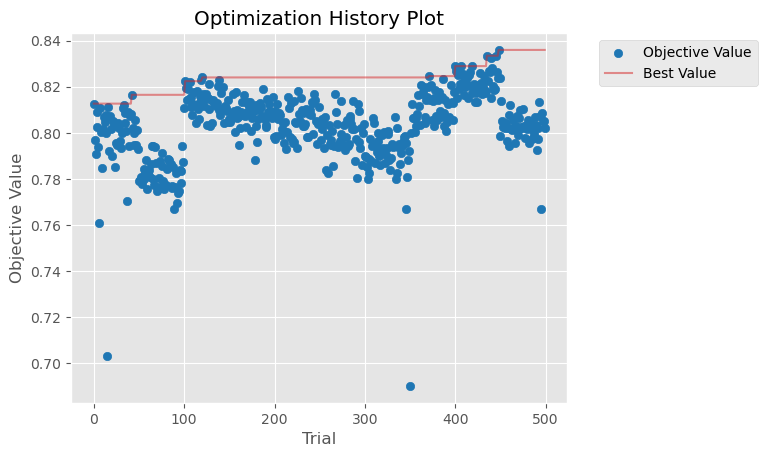

In [64]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_lgbm);

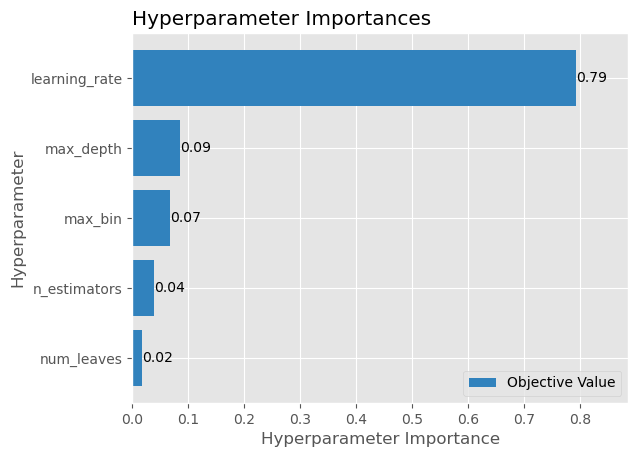

In [65]:
from optuna.visualization.matplotlib import plot_param_importances
plot_param_importances(study_lgbm);

In [66]:
detailed_objective_lgbm_cv(study_lgbm.best_trial, X, Y, Y_class)

                 Metric  Value (average)  Value (std)
0                    TP        20.100000     1.911951
1                    TN       151.800000     1.873796
2                    FP         5.800000     1.873796
3                    FN        13.300000     2.057507
4              Accuracy         0.900000     0.015104
5             Precision         0.777849     0.059111
6           Sensitivity         0.602123     0.058298
7           Specificity         0.963230     0.011835
8              F1 score         0.677365     0.050767
9   F1 score (weighted)         0.894737     0.016186
10     F1 score (macro)         0.809087     0.029658
11    Balanced Accuracy         0.782669     0.030521
12                  MCC         0.627433     0.058039
13                  NPV         0.919540     0.011710
14              ROC_AUC         0.782669     0.030521


In [67]:
mat_met_lgbm_test['ave'] = mat_met_lgbm_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_lgbm_test['std'] = mat_met_lgbm_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_lgbm_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,TP,42.000000,49.000000,39.000000,38.000000,40.000000,41.000000,39.000000,38.000000,33.000000,45.000000,40.400000,4.325634
1,TN,309.000000,307.000000,306.000000,309.000000,308.000000,308.000000,306.000000,306.000000,311.000000,306.000000,307.600000,1.712698
2,FP,5.000000,7.000000,9.000000,7.000000,7.000000,7.000000,7.000000,9.000000,4.000000,7.000000,6.900000,1.523884
3,FN,26.000000,19.000000,28.000000,28.000000,27.000000,26.000000,30.000000,29.000000,34.000000,24.000000,27.100000,3.928528
4,Accuracy,0.918848,0.931937,0.903141,0.908377,0.910995,0.913613,0.903141,0.900524,0.900524,0.918848,0.910995,0.010101
5,Precision,0.893617,0.875000,0.812500,0.844444,0.851064,0.854167,0.847826,0.808511,0.891892,0.865385,0.854441,0.028874
6,Sensitivity,0.617647,0.720588,0.582090,0.575758,0.597015,0.611940,0.565217,0.567164,0.492537,0.652174,0.598213,0.060036
7,Specificity,0.984100,0.977700,0.971400,0.977800,0.977800,0.977800,0.977600,0.971400,0.987300,0.977600,0.978050,0.004846
8,F1 score,0.730435,0.790323,0.678261,0.684685,0.701754,0.713043,0.678261,0.666667,0.634615,0.743802,0.702185,0.044340
9,F1 score (weighted),0.912752,0.929282,0.896558,0.901183,0.904557,0.907741,0.895172,0.893328,0.888437,0.914220,0.904323,0.012160


In [68]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)


Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_lgbm=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_lgbm = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


        #learn
        eval_set = [(X_test, y_test)]
        optimizedCV_lgbm.fit(X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
                          
                  
        #print(test_idx)
        y_pred_optimized_lgbm = optimizedCV_lgbm.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_lgbm': y_pred_optimized_lgbm } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        conf_matrix = confusion_matrix(y_test, y_pred_optimized_lgbm)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
       
        Accuracy_outer.append(accuracy_score(y_test, y_pred_optimized_lgbm))
        Precision_outer.append(precision_score(y_test, y_pred_optimized_lgbm))
        Sensitivity_outer.append(recall_score(y_test, y_pred_optimized_lgbm))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test, y_pred_optimized_lgbm))
        f1_scores_W_outer.append(f1_score(y_test, y_pred_optimized_lgbm, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test, y_pred_optimized_lgbm, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test, y_pred_optimized_lgbm))
        MCC_outer.append(matthews_corrcoef(y_test, y_pred_optimized_lgbm))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test, y_pred_optimized_lgbm))
        
    data_lgbm['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_lgbm['y_test' + str(i)] = data_inner['y_test']
    data_lgbm['y_pred_lgbm' + str(i)] = data_inner['y_pred_lgbm']
   # data_lgbm['correct' + str(i)] = correct_value
   # data_lgbm['pred' + str(i)] = y_pred_optimized_lgbm

mat_met_optimized_lgbm = pd.DataFrame({'Metric':['Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[ np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [ np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


mat_met_optimized_lgbm

,Metric,Value (average),Value (std)
0,Accuracy,0.906597,0.017068
1,Precision,0.815328,0.072369
2,Sensitivity,0.609318,0.087851
3,Specificity,0.969534,0.014964
4,F1 score,0.692840,0.063238
5,F1 score (weighted),0.900811,0.018828
6,F1 score (macro),0.818848,0.036171
7,Balanced Accuracy,0.789424,0.042617
8,MCC,0.651571,0.068393
9,NPV,0.921686,0.016075


In [69]:
#cross valide using this optimized LightGBM 
fit_params={'early_stopping_rounds': 50, 
        'eval_set': [(X_tr, Y_tr), (X_te, Y_te)],
            'verbose':False,
           }
#cross valide using this optimized LightGBM 
lgbm_baseline_CVscore = cross_val_score(lgbm_clf, X, Y, cv=10, scoring="f1_macro")
#f1_cv_lgbm_opt_testSet = cross_val_score(optimized_lgbm, X, Y, cv=10, scoring="f1_macro")
f1_cv_lgbm_opt = cross_val_score(optimizedCV_lgbm, X, Y, cv=10, scoring="f1_macro", fit_params=fit_params)
print("LightGBM baseline model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(lgbm_baseline_CVscore), np.std(lgbm_baseline_CVscore, ddof=1)))
#print("LightGBM optimized model (tested on Y_te)f1_score %0.4f with a standard deviation of %0.4f" % (f1_cv_lgbm_opt_testSet.mean(), f1_cv_lgbm_opt_testSet.std()))
print("LightGBM optimized model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(f1_cv_lgbm_opt), np.std(f1_cv_lgbm_opt, ddof=1)))

LightGBM baseline model f1_score 0.8119 with a standard deviation of 0.0403
LightGBM optimized model f1_score 0.8156 with a standard deviation of 0.0428


In [70]:
joblib.dump(lgbm_clf, "OUTPUT/lgbm_clf_withSemiSel.joblib")
#joblib.dump(optimized_lgbm, "OUTPUT/optimized_lgbm_withSemiSel.joblib")
joblib.dump(optimizedCV_lgbm, "OUTPUT/optimizedCV_lgbm_clf_withSemiSel.joblib") 
#loaded_rf = joblib.load("OUTPUT/optimized_rf_withSemiSel.joblib")

['OUTPUT/optimizedCV_lgbm_clf_withSemiSel.joblib']

## XGBoost

In [71]:
%%time


TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)


for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    xgb_clf = xgb.XGBClassifier(
    objective="binary:logistic",
    random_state=1121218,
    #n_estimators=10000,  
    tree_method="hist",  # enable histogram binning in XGB
    subsample=0.8, 
    n_jobs=8,
    )
    
    eval_set = [(X_train, y_train), (X_test, y_test)]
    xgb_clf.fit(X_train,
                y_train,
    
    eval_set=eval_set,
    eval_metric="logloss",
    early_stopping_rounds=50,
    verbose=False,  # Disable logs
               )

    y_pred = xgb_clf.predict(X_test) 
    
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test, y_pred)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test, y_pred)
    Precision[idx] = precision_score(y_test, y_pred)
    Sensitivity[idx] = recall_score(y_test, y_pred)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test, y_pred)
    f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
    f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
    MCC[idx] = matthews_corrcoef(y_test, y_pred)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test, y_pred)


mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    TP        19.500000     2.068279
1                    TN       152.300000     1.418136
2                    FP         5.300000     1.494434
3                    FN        13.900000     2.330951
4              Accuracy         0.899476     0.014349
5             Precision         0.786895     0.054572
6           Sensitivity         0.584377     0.064874
7           Specificity         0.966410     0.009379
8              F1 score         0.669028     0.054844
9   F1 score (weighted)         0.893183     0.016589
10     F1 score (macro)         0.804874     0.031429
11    Balanced Accuracy         0.775383     0.033025
12                  MCC         0.621865     0.059378
13                  NPV         0.916490     0.012945
14              ROC_AUC         0.775383     0.033025
CPU times: user 8.25 s, sys: 60 ms, total: 8.31 s
Wall time: 1.11 s


In [72]:
def objective_xgb_CV(trial, X, Y, Y_class):
    param_grid = {
        
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "eta": trial.suggest_float("eta", 1e-6, 0.1),  
        "max_depth": trial.suggest_int("max_depth", 5, 12),  
        "alpha": trial.suggest_float("alpha", 0, 1, step=1e-04),
        "lambda": trial.suggest_float("lambda", 1,40),
        #"alpha": trial.suggest_float("alpha", 0, 1.0),
        #"lambda": trial.suggest_float("lambda", 1e-8, 40.0),
        "max_bin": trial.suggest_int("max_bin", 250, 500),
    }
    
    
    cv_scores=np.empty(10)
    #y_comb=pd.DataFrame()
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1121218, booster ="gbtree", tree_method='hist',
                                  **param_grid,  n_jobs=8, subsample=0.8, )
    
        eval_set = [(X_test, y_test)]
        xgb_model.fit(
            X_train,
            y_train,
            eval_set=eval_set,
            eval_metric="logloss",    
            early_stopping_rounds=50,
            verbose=False)
    
        y_pred = xgb_model.predict(X_test)
        cv_scores[idx] = f1_score(y_test, y_pred, average="macro")
            
    return np.mean(cv_scores)

In [73]:
def detailed_objective_xgb_CV(trial, X, Y, Y_class):
    param_grid = {
        
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "eta": trial.suggest_float("eta", 1e-6, 0.1),  
        "max_depth": trial.suggest_int("max_depth", 5, 12),  
        "alpha": trial.suggest_float("alpha", 0, 1, step=1e-04),
        "lambda": trial.suggest_float("lambda", 1,40),
        #"alpha": trial.suggest_float("alpha", 0, 1.0),
        #"lambda": trial.suggest_float("lambda", 1e-8, 40.0),
        "max_bin": trial.suggest_int("max_bin", 250, 500),
    }
    
    
    
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W=np.empty(10)
    f1_scores_M=np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1121218, booster ="gbtree", tree_method='hist',
                                  **param_grid,  n_jobs=8, subsample=0.8, )
    
        eval_set = [(X_test, y_test)]
        xgb_model.fit(
            X_train,
            y_train,
            eval_set=eval_set,
            eval_metric="logloss",    
            early_stopping_rounds=50,
            verbose=False)
        
        y_pred = xgb_model.predict(X_test)
        
       
           
        #calculate parameters
        conf_matrix = confusion_matrix(y_test, y_pred)      
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test, y_pred)
        Precision[idx] = precision_score(y_test, y_pred)
        Sensitivity[idx] = recall_score(y_test, y_pred)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
        f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
        MCC[idx] = matthews_corrcoef(y_test, y_pred)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test, y_pred)

    mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
    return (mat_met)   

In [74]:
#Execute optuna and set hyperparameters
study_xgb = optuna.create_study(direction='maximize', study_name="XGBClassifier")
func_xgb_0 = lambda trial: objective_xgb_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_xgb.optimize(func_xgb_0, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 17:57:10,062] A new study created in memory with name: XGBClassifier
[I 2023-12-05 17:57:17,423] Trial 0 finished with value: 0.7999411502594839 and parameters: {'n_estimators': 852, 'eta': 0.03851698696514652, 'max_depth': 10, 'alpha': 0.43310000000000004, 'lambda': 36.9013937572624, 'max_bin': 439}. Best is trial 0 with value: 0.7999411502594839.
[I 2023-12-05 17:57:23,642] Trial 1 finished with value: 0.7986185058600851 and parameters: {'n_estimators': 794, 'eta': 0.03175297536886935, 'max_depth': 10, 'alpha': 0.38920000000000005, 'lambda': 12.772731198485477, 'max_bin': 471}. Best is trial 0 with value: 0.7999411502594839.
[I 2023-12-05 17:57:27,698] Trial 2 finished with value: 0.7954878417427051 and parameters: {'n_estimators': 773, 'eta': 0.05873893343998224, 'max_depth': 8, 'alpha': 0.4189, 'lambda': 16.5725710232487, 'max_bin': 395}. Best is trial 0 with value: 0.7999411502594839.
[I 2023-12-05 17:57:31,362] Trial 3 finished with value: 0.7939168773062659 and par

	Number of trials: 50.0
	Best value (f1_score): 0.8100
	Best params:
		n_estimators: 509
		eta: 0.09203488600961084
		max_depth: 12
		alpha: 0.8726
		lambda: 6.146804136542333
		max_bin: 403


In [75]:
#Create an instance with tuned hyperparameters

optimized_xgb_0 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    #learn
eval_set = [(X_testSet0, Y_testSet0)]

optimized_xgb_0.fit(X_trainSet0,Y_trainSet0, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

   
y_pred_xgb_0 = optimized_xgb_0.predict(X_testSet0)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0, y_pred_xgb_0)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0, y_pred_xgb_0)
Precision = precision_score(Y_testSet0, y_pred_xgb_0)
Sensitivity = recall_score(Y_testSet0, y_pred_xgb_0)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0, y_pred_xgb_0)      
f1_scores_W = f1_score(Y_testSet0, y_pred_xgb_0, average="weighted")
f1_scores_M = f1_score(Y_testSet0, y_pred_xgb_0, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0, y_pred_xgb_0)
MCC = matthews_corrcoef(Y_testSet0, y_pred_xgb_0)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0, y_pred_xgb_0)
    

mat_met_xgb_test = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_xgb_test)


                 Metric        Set0
0                    TP   44.000000
1                    TN  308.000000
2                    FP    6.000000
3                    FN   24.000000
4              Accuracy    0.921466
5             Precision    0.880000
6           Sensitivity    0.647059
7           Specificity    0.980900
8              F1 score    0.745763
9   F1 score (weighted)    0.916570
10     F1 score (macro)    0.849662
11    Balanced Accuracy    0.813975
12                  MCC    0.712181
13                  NPV    0.927700
14              ROC_AUC    0.813975


In [76]:
#Execute optuna and set hyperparameters

func_xgb_1 = lambda trial: objective_xgb_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_xgb.optimize(func_xgb_1, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 17:59:44,471] Trial 50 finished with value: 0.7958074326077166 and parameters: {'n_estimators': 723, 'eta': 0.07609463666415263, 'max_depth': 11, 'alpha': 0.5423, 'lambda': 7.854897421040233, 'max_bin': 326}. Best is trial 8 with value: 0.8099560941939572.
[I 2023-12-05 17:59:46,705] Trial 51 finished with value: 0.7947170849681214 and parameters: {'n_estimators': 370, 'eta': 0.08207281037182226, 'max_depth': 12, 'alpha': 0.7819, 'lambda': 2.4759040255008786, 'max_bin': 385}. Best is trial 8 with value: 0.8099560941939572.
[I 2023-12-05 17:59:48,652] Trial 52 finished with value: 0.7911881639269805 and parameters: {'n_estimators': 279, 'eta': 0.08621718877356799, 'max_depth': 12, 'alpha': 0.8129000000000001, 'lambda': 1.4346126764664318, 'max_bin': 368}. Best is trial 8 with value: 0.8099560941939572.
[I 2023-12-05 17:59:50,974] Trial 53 finished with value: 0.7969223425791698 and parameters: {'n_estimators': 306, 'eta': 0.08036309454137971, 'max_depth': 12, 'alpha': 0.75

	Number of trials: 100.0
	Best value (f1_score): 0.8100
	Best params:
		n_estimators: 509
		eta: 0.09203488600961084
		max_depth: 12
		alpha: 0.8726
		lambda: 6.146804136542333
		max_bin: 403


In [77]:
optimized_xgb_1 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet1, Y_testSet1)]
optimized_xgb_1.fit(X_trainSet1,Y_trainSet1, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_1 = optimized_xgb_1.predict(X_testSet1)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1, y_pred_xgb_1)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1, y_pred_xgb_1)
Precision = precision_score(Y_testSet1, y_pred_xgb_1)
Sensitivity = recall_score(Y_testSet1, y_pred_xgb_1)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1, y_pred_xgb_1)      
f1_scores_W = f1_score(Y_testSet1, y_pred_xgb_1, average="weighted")
f1_scores_M = f1_score(Y_testSet1, y_pred_xgb_1, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1, y_pred_xgb_1)
MCC = matthews_corrcoef(Y_testSet1, y_pred_xgb_1)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1, y_pred_xgb_1)


set1 = pd.DataFrame({ 'Set1':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set1'] =set1
print(mat_met_xgb_test)


                 Metric        Set0        Set1
0                    TP   44.000000   50.000000
1                    TN  308.000000  307.000000
2                    FP    6.000000    7.000000
3                    FN   24.000000   18.000000
4              Accuracy    0.921466    0.934555
5             Precision    0.880000    0.877193
6           Sensitivity    0.647059    0.735294
7           Specificity    0.980900    0.977700
8              F1 score    0.745763    0.800000
9   F1 score (weighted)    0.916570    0.932239
10     F1 score (macro)    0.849662    0.880438
11    Balanced Accuracy    0.813975    0.856501
12                  MCC    0.712181    0.765474
13                  NPV    0.927700    0.944600
14              ROC_AUC    0.813975    0.856501


In [78]:
#Execute optuna and set hyperparameters
func_xgb_2 = lambda trial: objective_xgb_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_xgb.optimize(func_xgb_2, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:01:46,021] Trial 100 finished with value: 0.8318984198495217 and parameters: {'n_estimators': 464, 'eta': 0.09814566475841854, 'max_depth': 10, 'alpha': 0.9313, 'lambda': 11.831333803478168, 'max_bin': 347}. Best is trial 100 with value: 0.8318984198495217.
[I 2023-12-05 18:01:48,774] Trial 101 finished with value: 0.8276207934343056 and parameters: {'n_estimators': 464, 'eta': 0.09897678481015779, 'max_depth': 10, 'alpha': 0.927, 'lambda': 11.772909470402963, 'max_bin': 375}. Best is trial 100 with value: 0.8318984198495217.
[I 2023-12-05 18:01:51,560] Trial 102 finished with value: 0.8341420627094955 and parameters: {'n_estimators': 452, 'eta': 0.09749861254895852, 'max_depth': 10, 'alpha': 0.931, 'lambda': 12.113245645578496, 'max_bin': 349}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:01:54,454] Trial 103 finished with value: 0.8270563445327419 and parameters: {'n_estimators': 458, 'eta': 0.09890806697652167, 'max_depth': 10, 'alpha': 0.93870

	Number of trials: 150.0
	Best value (f1_score): 0.8341
	Best params:
		n_estimators: 452
		eta: 0.09749861254895852
		max_depth: 10
		alpha: 0.931
		lambda: 12.113245645578496
		max_bin: 349


In [79]:
optimized_xgb_2 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet2, Y_testSet2)]
optimized_xgb_2.fit(X_trainSet2,Y_trainSet2, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_2 = optimized_xgb_2.predict(X_testSet2)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2, y_pred_xgb_2)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2, y_pred_xgb_2)
Precision = precision_score(Y_testSet2, y_pred_xgb_2)
Sensitivity = recall_score(Y_testSet2, y_pred_xgb_2)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2, y_pred_xgb_2)      
f1_scores_W = f1_score(Y_testSet2, y_pred_xgb_2, average="weighted")
f1_scores_M = f1_score(Y_testSet2, y_pred_xgb_2, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2, y_pred_xgb_2)
MCC = matthews_corrcoef(Y_testSet2, y_pred_xgb_2)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2, y_pred_xgb_2)


Set2 = pd.DataFrame({ 'Set2':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set2'] =Set2
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2
0                    TP   44.000000   50.000000   37.000000
1                    TN  308.000000  307.000000  305.000000
2                    FP    6.000000    7.000000   10.000000
3                    FN   24.000000   18.000000   30.000000
4              Accuracy    0.921466    0.934555    0.895288
5             Precision    0.880000    0.877193    0.787234
6           Sensitivity    0.647059    0.735294    0.552239
7           Specificity    0.980900    0.977700    0.968300
8              F1 score    0.745763    0.800000    0.649123
9   F1 score (weighted)    0.916570    0.932239    0.887714
10     F1 score (macro)    0.849662    0.880438    0.793792
11    Balanced Accuracy    0.813975    0.856501    0.760246
12                  MCC    0.712181    0.765474    0.602610
13                  NPV    0.927700    0.944600    0.910400
14              ROC_AUC    0.813975    0.856501    0.760246


In [80]:
#Execute optuna and set hyperparameters
func_xgb_3 = lambda trial: objective_xgb_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_xgb.optimize(func_xgb_3, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:04:09,676] Trial 150 finished with value: 0.8184798743241618 and parameters: {'n_estimators': 517, 'eta': 0.0906179244906319, 'max_depth': 7, 'alpha': 0.9682000000000001, 'lambda': 7.818410352395962, 'max_bin': 419}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:04:12,353] Trial 151 finished with value: 0.8214408359667313 and parameters: {'n_estimators': 412, 'eta': 0.09411168684812997, 'max_depth': 8, 'alpha': 0.8933000000000001, 'lambda': 9.826818964956592, 'max_bin': 396}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:04:15,205] Trial 152 finished with value: 0.8206646857913651 and parameters: {'n_estimators': 540, 'eta': 0.09204183760726144, 'max_depth': 8, 'alpha': 0.9498000000000001, 'lambda': 10.383787306678556, 'max_bin': 369}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:04:17,704] Trial 153 finished with value: 0.8197825699957093 and parameters: {'n_estimators': 506, 'eta': 0.09490124638155197, '

	Number of trials: 200.0
	Best value (f1_score): 0.8341
	Best params:
		n_estimators: 452
		eta: 0.09749861254895852
		max_depth: 10
		alpha: 0.931
		lambda: 12.113245645578496
		max_bin: 349


In [81]:
optimized_xgb_3 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet3, Y_testSet3)]
optimized_xgb_3.fit(X_trainSet3,Y_trainSet3, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_3 = optimized_xgb_3.predict(X_testSet3)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3, y_pred_xgb_3)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3, y_pred_xgb_3)
Precision = precision_score(Y_testSet3, y_pred_xgb_3)
Sensitivity = recall_score(Y_testSet3, y_pred_xgb_3)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3, y_pred_xgb_3)      
f1_scores_W = f1_score(Y_testSet3, y_pred_xgb_3, average="weighted")
f1_scores_M = f1_score(Y_testSet3, y_pred_xgb_3, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3, y_pred_xgb_3)
MCC = matthews_corrcoef(Y_testSet3, y_pred_xgb_3)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3, y_pred_xgb_3)


Set3 = pd.DataFrame({ 'Set3':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set3'] =Set3
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3
0                    TP   44.000000   50.000000   37.000000   36.000000
1                    TN  308.000000  307.000000  305.000000  305.000000
2                    FP    6.000000    7.000000   10.000000   11.000000
3                    FN   24.000000   18.000000   30.000000   30.000000
4              Accuracy    0.921466    0.934555    0.895288    0.892670
5             Precision    0.880000    0.877193    0.787234    0.765957
6           Sensitivity    0.647059    0.735294    0.552239    0.545455
7           Specificity    0.980900    0.977700    0.968300    0.965200
8              F1 score    0.745763    0.800000    0.649123    0.637168
9   F1 score (weighted)    0.916570    0.932239    0.887714    0.885213
10     F1 score (macro)    0.849662    0.880438    0.793792    0.787094
11    Balanced Accuracy    0.813975    0.856501    0.760246    0.755322
12                  MCC    0.712181    0.765474    0.602610    0

In [82]:
#Execute optuna and set hyperparameters
func_xgb_4 = lambda trial: objective_xgb_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_xgb.optimize(func_xgb_4, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:06:31,670] Trial 200 finished with value: 0.8217919660656768 and parameters: {'n_estimators': 486, 'eta': 0.09998786847884027, 'max_depth': 8, 'alpha': 0.9500000000000001, 'lambda': 12.486606342675124, 'max_bin': 381}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:06:34,198] Trial 201 finished with value: 0.8065791694344163 and parameters: {'n_estimators': 456, 'eta': 0.09634900031563112, 'max_depth': 10, 'alpha': 0.9343, 'lambda': 11.498753711168188, 'max_bin': 345}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:06:36,444] Trial 202 finished with value: 0.8135924178830735 and parameters: {'n_estimators': 443, 'eta': 0.0979996709471553, 'max_depth': 10, 'alpha': 0.1091, 'lambda': 10.715445276321638, 'max_bin': 351}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:06:42,481] Trial 203 finished with value: 0.8107916868874001 and parameters: {'n_estimators': 508, 'eta': 0.029131904619370215, 'max_depth': 10, 'al

	Number of trials: 250.0
	Best value (f1_score): 0.8341
	Best params:
		n_estimators: 452
		eta: 0.09749861254895852
		max_depth: 10
		alpha: 0.931
		lambda: 12.113245645578496
		max_bin: 349


In [83]:
optimized_xgb_4 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet4, Y_testSet4)]
optimized_xgb_4.fit(X_trainSet4,Y_trainSet4, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_4 = optimized_xgb_4.predict(X_testSet4)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4, y_pred_xgb_4)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4, y_pred_xgb_4)
Precision = precision_score(Y_testSet4, y_pred_xgb_4)
Sensitivity = recall_score(Y_testSet4, y_pred_xgb_4)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4, y_pred_xgb_4)      
f1_scores_W = f1_score(Y_testSet4, y_pred_xgb_4, average="weighted")
f1_scores_M = f1_score(Y_testSet4, y_pred_xgb_4, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4, y_pred_xgb_4)
MCC = matthews_corrcoef(Y_testSet4, y_pred_xgb_4)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4, y_pred_xgb_4)


Set4 = pd.DataFrame({ 'Set4':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set4'] =Set4
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   50.000000   37.000000   36.000000   
1                    TN  308.000000  307.000000  305.000000  305.000000   
2                    FP    6.000000    7.000000   10.000000   11.000000   
3                    FN   24.000000   18.000000   30.000000   30.000000   
4              Accuracy    0.921466    0.934555    0.895288    0.892670   
5             Precision    0.880000    0.877193    0.787234    0.765957   
6           Sensitivity    0.647059    0.735294    0.552239    0.545455   
7           Specificity    0.980900    0.977700    0.968300    0.965200   
8              F1 score    0.745763    0.800000    0.649123    0.637168   
9   F1 score (weighted)    0.916570    0.932239    0.887714    0.885213   
10     F1 score (macro)    0.849662    0.880438    0.793792    0.787094   
11    Balanced Accuracy    0.813975    0.856501    0.760246    0.755322   
12                  MCC  

In [84]:
#Execute optuna and set hyperparameters
func_xgb_5 = lambda trial: objective_xgb_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_xgb.optimize(func_xgb_5, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:08:56,402] Trial 250 finished with value: 0.8119269861686114 and parameters: {'n_estimators': 405, 'eta': 0.09239529335845437, 'max_depth': 10, 'alpha': 0.9992000000000001, 'lambda': 6.827736631543209, 'max_bin': 403}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:09:00,906] Trial 251 finished with value: 0.801397412002426 and parameters: {'n_estimators': 481, 'eta': 0.05048050219772108, 'max_depth': 7, 'alpha': 0.925, 'lambda': 10.091426265868726, 'max_bin': 368}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:09:03,549] Trial 252 finished with value: 0.8143034031746849 and parameters: {'n_estimators': 513, 'eta': 0.09997990111418441, 'max_depth': 8, 'alpha': 0.8942, 'lambda': 8.260415001126344, 'max_bin': 395}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:09:06,937] Trial 253 finished with value: 0.8131128209401022 and parameters: {'n_estimators': 601, 'eta': 0.06686712902954407, 'max_depth': 9, 'alpha': 

	Number of trials: 300.0
	Best value (f1_score): 0.8341
	Best params:
		n_estimators: 452
		eta: 0.09749861254895852
		max_depth: 10
		alpha: 0.931
		lambda: 12.113245645578496
		max_bin: 349


In [85]:
optimized_xgb_5 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet5, Y_testSet5)]
optimized_xgb_5.fit(X_trainSet5,Y_trainSet5, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_5 = optimized_xgb_5.predict(X_testSet5)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5, y_pred_xgb_5)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5, y_pred_xgb_5)
Precision = precision_score(Y_testSet5, y_pred_xgb_5)
Sensitivity = recall_score(Y_testSet5, y_pred_xgb_5)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5, y_pred_xgb_5)      
f1_scores_W = f1_score(Y_testSet5, y_pred_xgb_5, average="weighted")
f1_scores_M = f1_score(Y_testSet5, y_pred_xgb_5, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5, y_pred_xgb_5)
MCC = matthews_corrcoef(Y_testSet5, y_pred_xgb_5)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5, y_pred_xgb_5)


Set5 = pd.DataFrame({ 'Set5':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set5'] =Set5
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   50.000000   37.000000   36.000000   
1                    TN  308.000000  307.000000  305.000000  305.000000   
2                    FP    6.000000    7.000000   10.000000   11.000000   
3                    FN   24.000000   18.000000   30.000000   30.000000   
4              Accuracy    0.921466    0.934555    0.895288    0.892670   
5             Precision    0.880000    0.877193    0.787234    0.765957   
6           Sensitivity    0.647059    0.735294    0.552239    0.545455   
7           Specificity    0.980900    0.977700    0.968300    0.965200   
8              F1 score    0.745763    0.800000    0.649123    0.637168   
9   F1 score (weighted)    0.916570    0.932239    0.887714    0.885213   
10     F1 score (macro)    0.849662    0.880438    0.793792    0.787094   
11    Balanced Accuracy    0.813975    0.856501    0.760246    0.755322   
12                  MCC  

In [86]:
#Execute optuna and set hyperparameters
func_xgb_6 = lambda trial: objective_xgb_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_xgb.optimize(func_xgb_6, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:11:34,943] Trial 300 finished with value: 0.8064592745573289 and parameters: {'n_estimators': 350, 'eta': 0.06980450896768217, 'max_depth': 8, 'alpha': 0.9683, 'lambda': 9.665116077680212, 'max_bin': 354}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:11:37,301] Trial 301 finished with value: 0.8065731921624135 and parameters: {'n_estimators': 516, 'eta': 0.09768481434004284, 'max_depth': 10, 'alpha': 0.9460000000000001, 'lambda': 12.496225752599637, 'max_bin': 347}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:11:39,916] Trial 302 finished with value: 0.8052418264285486 and parameters: {'n_estimators': 445, 'eta': 0.09411519561873027, 'max_depth': 8, 'alpha': 0.9006000000000001, 'lambda': 11.129170592141325, 'max_bin': 370}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:11:42,248] Trial 303 finished with value: 0.8126121522944214 and parameters: {'n_estimators': 535, 'eta': 0.09659897723505542, 'max_depth

	Number of trials: 350.0
	Best value (f1_score): 0.8341
	Best params:
		n_estimators: 452
		eta: 0.09749861254895852
		max_depth: 10
		alpha: 0.931
		lambda: 12.113245645578496
		max_bin: 349


In [87]:
optimized_xgb_6 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet6, Y_testSet6)]
optimized_xgb_6.fit(X_trainSet6,Y_trainSet6, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_6 = optimized_xgb_6.predict(X_testSet6)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6, y_pred_xgb_6)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6, y_pred_xgb_6)
Precision = precision_score(Y_testSet6, y_pred_xgb_6)
Sensitivity = recall_score(Y_testSet6, y_pred_xgb_6)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6, y_pred_xgb_6)      
f1_scores_W = f1_score(Y_testSet6, y_pred_xgb_6, average="weighted")
f1_scores_M = f1_score(Y_testSet6, y_pred_xgb_6, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6, y_pred_xgb_6)
MCC = matthews_corrcoef(Y_testSet6, y_pred_xgb_6)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6, y_pred_xgb_6)


Set6 = pd.DataFrame({ 'Set6':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set6'] =Set6
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   50.000000   37.000000   36.000000   
1                    TN  308.000000  307.000000  305.000000  305.000000   
2                    FP    6.000000    7.000000   10.000000   11.000000   
3                    FN   24.000000   18.000000   30.000000   30.000000   
4              Accuracy    0.921466    0.934555    0.895288    0.892670   
5             Precision    0.880000    0.877193    0.787234    0.765957   
6           Sensitivity    0.647059    0.735294    0.552239    0.545455   
7           Specificity    0.980900    0.977700    0.968300    0.965200   
8              F1 score    0.745763    0.800000    0.649123    0.637168   
9   F1 score (weighted)    0.916570    0.932239    0.887714    0.885213   
10     F1 score (macro)    0.849662    0.880438    0.793792    0.787094   
11    Balanced Accuracy    0.813975    0.856501    0.760246    0.755322   
12                  MCC  

In [88]:
#Execute optuna and set hyperparameters
func_xgb_7 = lambda trial: objective_xgb_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_xgb.optimize(func_xgb_7, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:13:53,923] Trial 350 finished with value: 0.8180250450852722 and parameters: {'n_estimators': 496, 'eta': 0.09718480948169668, 'max_depth': 10, 'alpha': 0.8904000000000001, 'lambda': 9.583783319383938, 'max_bin': 376}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:13:56,896] Trial 351 finished with value: 0.8122065064438477 and parameters: {'n_estimators': 519, 'eta': 0.08981661458006637, 'max_depth': 8, 'alpha': 0.9406, 'lambda': 13.088537092815251, 'max_bin': 365}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:14:00,075] Trial 352 finished with value: 0.8146148627287028 and parameters: {'n_estimators': 337, 'eta': 0.09827924331081099, 'max_depth': 8, 'alpha': 0.9801000000000001, 'lambda': 16.523636539198623, 'max_bin': 337}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:14:02,893] Trial 353 finished with value: 0.8166513719929958 and parameters: {'n_estimators': 454, 'eta': 0.09147948109491763, 'max_depth

	Number of trials: 400.0
	Best value (f1_score): 0.8341
	Best params:
		n_estimators: 452
		eta: 0.09749861254895852
		max_depth: 10
		alpha: 0.931
		lambda: 12.113245645578496
		max_bin: 349


In [89]:
optimized_xgb_7 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet7, Y_testSet7)]
optimized_xgb_7.fit(X_trainSet7,Y_trainSet7, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_7 = optimized_xgb_7.predict(X_testSet7)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7, y_pred_xgb_7)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7, y_pred_xgb_7)
Precision = precision_score(Y_testSet7, y_pred_xgb_7)
Sensitivity = recall_score(Y_testSet7, y_pred_xgb_7)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7, y_pred_xgb_7)      
f1_scores_W = f1_score(Y_testSet7, y_pred_xgb_7, average="weighted")
f1_scores_M = f1_score(Y_testSet7, y_pred_xgb_7, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7, y_pred_xgb_7)
MCC = matthews_corrcoef(Y_testSet7, y_pred_xgb_7)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7, y_pred_xgb_7)


Set7 = pd.DataFrame({ 'Set7':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set7'] =Set7
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   50.000000   37.000000   36.000000   
1                    TN  308.000000  307.000000  305.000000  305.000000   
2                    FP    6.000000    7.000000   10.000000   11.000000   
3                    FN   24.000000   18.000000   30.000000   30.000000   
4              Accuracy    0.921466    0.934555    0.895288    0.892670   
5             Precision    0.880000    0.877193    0.787234    0.765957   
6           Sensitivity    0.647059    0.735294    0.552239    0.545455   
7           Specificity    0.980900    0.977700    0.968300    0.965200   
8              F1 score    0.745763    0.800000    0.649123    0.637168   
9   F1 score (weighted)    0.916570    0.932239    0.887714    0.885213   
10     F1 score (macro)    0.849662    0.880438    0.793792    0.787094   
11    Balanced Accuracy    0.813975    0.856501    0.760246    0.755322   
12                  MCC  

In [90]:
#Execute optuna and set hyperparameters
func_xgb_8 = lambda trial: objective_xgb_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_xgb.optimize(func_xgb_8, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:16:39,419] Trial 400 finished with value: 0.8217536367841571 and parameters: {'n_estimators': 520, 'eta': 0.04219423125403686, 'max_depth': 8, 'alpha': 0.9411, 'lambda': 11.405363206696855, 'max_bin': 404}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:16:42,262] Trial 401 finished with value: 0.8216368472548888 and parameters: {'n_estimators': 459, 'eta': 0.09985467498631342, 'max_depth': 10, 'alpha': 0.8684000000000001, 'lambda': 12.179763018897424, 'max_bin': 347}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:16:46,115] Trial 402 finished with value: 0.8213428658326419 and parameters: {'n_estimators': 394, 'eta': 0.09532826106782892, 'max_depth': 9, 'alpha': 0.8141, 'lambda': 18.44872191784692, 'max_bin': 373}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:16:50,790] Trial 403 finished with value: 0.817320233231766 and parameters: {'n_estimators': 484, 'eta': 0.05634429233991743, 'max_depth': 8, 'alpha'

	Number of trials: 450.0
	Best value (f1_score): 0.8341
	Best params:
		n_estimators: 452
		eta: 0.09749861254895852
		max_depth: 10
		alpha: 0.931
		lambda: 12.113245645578496
		max_bin: 349


In [91]:
optimized_xgb_8 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet8, Y_testSet8)]
optimized_xgb_8.fit(X_trainSet8,Y_trainSet8, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_8 = optimized_xgb_8.predict(X_testSet8)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8, y_pred_xgb_8)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8, y_pred_xgb_8)
Precision = precision_score(Y_testSet8, y_pred_xgb_8)
Sensitivity = recall_score(Y_testSet8, y_pred_xgb_8)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8, y_pred_xgb_8)      
f1_scores_W = f1_score(Y_testSet8, y_pred_xgb_8, average="weighted")
f1_scores_M = f1_score(Y_testSet8, y_pred_xgb_8, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8, y_pred_xgb_8)
MCC = matthews_corrcoef(Y_testSet8, y_pred_xgb_8)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8, y_pred_xgb_8)


Set8 = pd.DataFrame({ 'Set8':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set8'] =Set8
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   50.000000   37.000000   36.000000   
1                    TN  308.000000  307.000000  305.000000  305.000000   
2                    FP    6.000000    7.000000   10.000000   11.000000   
3                    FN   24.000000   18.000000   30.000000   30.000000   
4              Accuracy    0.921466    0.934555    0.895288    0.892670   
5             Precision    0.880000    0.877193    0.787234    0.765957   
6           Sensitivity    0.647059    0.735294    0.552239    0.545455   
7           Specificity    0.980900    0.977700    0.968300    0.965200   
8              F1 score    0.745763    0.800000    0.649123    0.637168   
9   F1 score (weighted)    0.916570    0.932239    0.887714    0.885213   
10     F1 score (macro)    0.849662    0.880438    0.793792    0.787094   
11    Balanced Accuracy    0.813975    0.856501    0.760246    0.755322   
12                  MCC  

In [92]:
#Execute optuna and set hyperparameters
func_xgb_9 = lambda trial: objective_xgb_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_xgb.optimize(func_xgb_9, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:19:43,539] Trial 450 finished with value: 0.8028297919261178 and parameters: {'n_estimators': 371, 'eta': 0.09464716224173335, 'max_depth': 10, 'alpha': 0.3899, 'lambda': 17.485920674776708, 'max_bin': 367}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:19:46,197] Trial 451 finished with value: 0.8089938423250829 and parameters: {'n_estimators': 515, 'eta': 0.09799923535691224, 'max_depth': 8, 'alpha': 0.9208000000000001, 'lambda': 8.66765613164701, 'max_bin': 340}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:19:48,965] Trial 452 finished with value: 0.8067864937451169 and parameters: {'n_estimators': 438, 'eta': 0.087847499134118, 'max_depth': 8, 'alpha': 0.9848, 'lambda': 10.083774481993574, 'max_bin': 383}. Best is trial 102 with value: 0.8341420627094955.
[I 2023-12-05 18:19:51,876] Trial 453 finished with value: 0.8065942335673977 and parameters: {'n_estimators': 498, 'eta': 0.09656253061111109, 'max_depth': 10, 'alpha':

	Number of trials: 500.0
	Best value (f1_score): 0.8341
	Best params:
		n_estimators: 452
		eta: 0.09749861254895852
		max_depth: 10
		alpha: 0.931
		lambda: 12.113245645578496
		max_bin: 349


In [93]:
optimized_xgb_9 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet9, Y_testSet9)]
optimized_xgb_9.fit(X_trainSet9,Y_trainSet9, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_9 = optimized_xgb_9.predict(X_testSet9)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9, y_pred_xgb_9)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9, y_pred_xgb_9)
Precision = precision_score(Y_testSet9, y_pred_xgb_9)
Sensitivity = recall_score(Y_testSet9, y_pred_xgb_9)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9, y_pred_xgb_9)      
f1_scores_W = f1_score(Y_testSet9, y_pred_xgb_9, average="weighted")
f1_scores_M = f1_score(Y_testSet9, y_pred_xgb_9, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9, y_pred_xgb_9)
MCC = matthews_corrcoef(Y_testSet9, y_pred_xgb_9)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9, y_pred_xgb_9)


Set9 = pd.DataFrame({ 'Set9':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set9'] =Set9
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   50.000000   37.000000   36.000000   
1                    TN  308.000000  307.000000  305.000000  305.000000   
2                    FP    6.000000    7.000000   10.000000   11.000000   
3                    FN   24.000000   18.000000   30.000000   30.000000   
4              Accuracy    0.921466    0.934555    0.895288    0.892670   
5             Precision    0.880000    0.877193    0.787234    0.765957   
6           Sensitivity    0.647059    0.735294    0.552239    0.545455   
7           Specificity    0.980900    0.977700    0.968300    0.965200   
8              F1 score    0.745763    0.800000    0.649123    0.637168   
9   F1 score (weighted)    0.916570    0.932239    0.887714    0.885213   
10     F1 score (macro)    0.849662    0.880438    0.793792    0.787094   
11    Balanced Accuracy    0.813975    0.856501    0.760246    0.755322   
12                  MCC  

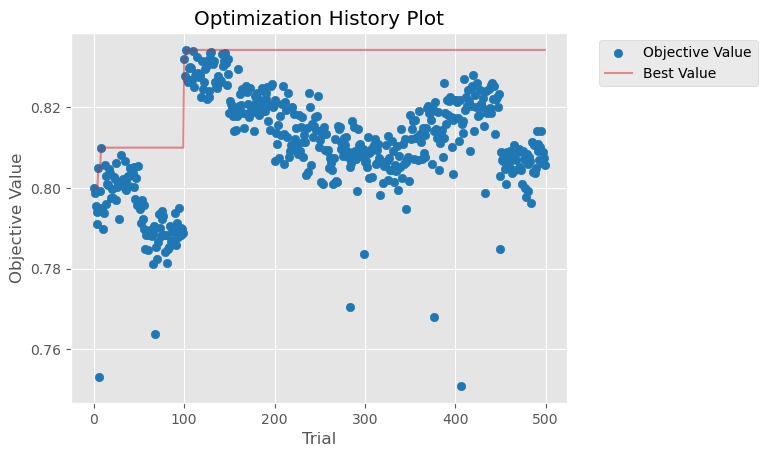

In [94]:
plot_optimization_history(study_xgb);

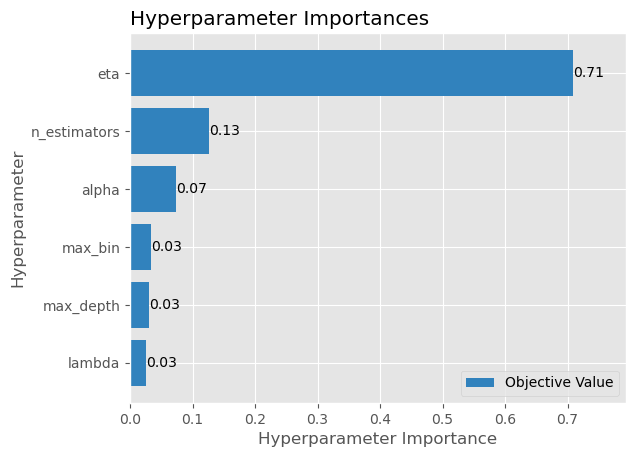

In [95]:
plot_param_importances(study_xgb);

In [96]:
detailed_objective_xgb_CV(study_xgb.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,TP,20.900000,1.969207
1,TN,152.800000,1.475730
2,FP,4.800000,1.932184
3,FN,12.500000,1.900292
4,Accuracy,0.909424,0.015423
5,Precision,0.814649,0.066592
6,Sensitivity,0.625742,0.055566
7,Specificity,0.969590,0.012159
8,F1 score,0.706574,0.052507
9,F1 score (weighted),0.904556,0.016265


In [97]:
mat_met_xgb_test['ave'] = mat_met_xgb_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_xgb_test['std'] = mat_met_xgb_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_xgb_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,TP,44.000000,50.000000,37.000000,36.000000,39.000000,44.000000,44.000000,44.000000,39.000000,44.000000,42.100000,4.254409
1,TN,308.000000,307.000000,305.000000,305.000000,312.000000,304.000000,302.000000,307.000000,309.000000,305.000000,306.400000,2.836273
2,FP,6.000000,7.000000,10.000000,11.000000,3.000000,11.000000,11.000000,8.000000,6.000000,8.000000,8.100000,2.685351
3,FN,24.000000,18.000000,30.000000,30.000000,28.000000,23.000000,25.000000,23.000000,28.000000,25.000000,25.400000,3.717825
4,Accuracy,0.921466,0.934555,0.895288,0.892670,0.918848,0.910995,0.905759,0.918848,0.910995,0.913613,0.912304,0.012417
5,Precision,0.880000,0.877193,0.787234,0.765957,0.928571,0.800000,0.800000,0.846154,0.866667,0.846154,0.839793,0.050642
6,Sensitivity,0.647059,0.735294,0.552239,0.545455,0.582090,0.656716,0.637681,0.656716,0.582090,0.637681,0.623302,0.057985
7,Specificity,0.980900,0.977700,0.968300,0.965200,0.990500,0.965100,0.964900,0.974600,0.981000,0.974400,0.974260,0.008527
8,F1 score,0.745763,0.800000,0.649123,0.637168,0.715596,0.721311,0.709677,0.739496,0.696429,0.727273,0.714184,0.046817
9,F1 score (weighted),0.916570,0.932239,0.887714,0.885213,0.911090,0.907449,0.901470,0.914677,0.903755,0.908686,0.906886,0.013723


In [98]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)


Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_xgb=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_xgb = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )


        #learn
        eval_set = [(X_test, y_test)]
        optimizedCV_xgb.fit(X_train,y_train, 
            eval_set=eval_set,
            eval_metric=["logloss"],
            early_stopping_rounds=50,
            verbose= False,
                  )
                          
                  
        #print(test_idx)
        y_pred_optimized_xgb = optimizedCV_xgb.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_xgb': y_pred_optimized_xgb } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        
        conf_matrix = confusion_matrix(y_test, y_pred_optimized_xgb)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        Accuracy_outer.append(accuracy_score(y_test, y_pred_optimized_xgb))
        Precision_outer.append(precision_score(y_test, y_pred_optimized_xgb))
        Sensitivity_outer.append(recall_score(y_test, y_pred_optimized_xgb))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test, y_pred_optimized_xgb))
        f1_scores_W_outer.append(f1_score(y_test, y_pred_optimized_xgb, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test, y_pred_optimized_xgb, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test, y_pred_optimized_xgb))
        MCC_outer.append(matthews_corrcoef(y_test, y_pred_optimized_xgb))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test, y_pred_optimized_xgb))
        
    data_xgb['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_xgb['y_test' + str(i)] = data_inner['y_test']
    data_xgb['y_pred_xgb' + str(i)] = data_inner['y_pred_xgb']
   # data_xgb['correct' + str(i)] = correct_value
   # data_xgb['pred' + str(i)] = y_pred_optimized_xgb

mat_met_optimized_xgb = pd.DataFrame({'Metric':['Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[ np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


mat_met_optimized_xgb

,Metric,Value (average),Value (std)
0,Accuracy,0.907644,0.015025
1,Precision,0.815465,0.054811
2,Sensitivity,0.614922,0.087029
3,Specificity,0.969668,0.011898
4,F1 score,0.696790,0.059494
5,F1 score (weighted),0.901978,0.017317
6,F1 score (macro),0.821127,0.033708
7,Balanced Accuracy,0.792290,0.041705
8,MCC,0.655370,0.060569
9,NPV,0.922698,0.016032


In [99]:
#cross valide using this optimized XGBoost 
fit_params = {'early_stopping_rounds': 50, 
            'eval_set': [(X_tr, Y_tr), (X_te, Y_te)],
              'verbose' : False,
             }

xgb_baseline_CVscore = cross_val_score(xgb_clf, X, Y, cv=10, scoring="f1_macro", )
#cv_xgb_opt_testSet = cross_val_score(optimized_xgb, X, Y, cv=10, scoring="f1_macro", fit_params = fit_params)
cv_xgb_opt = cross_val_score(optimizedCV_xgb, X, Y, cv=10, scoring="f1_macro", fit_params = fit_params)
print("XGBoost baseline model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(xgb_baseline_CVscore), np.std(xgb_baseline_CVscore, ddof=1)))
#print("XGBoost optimized model (tested with Y_te) f1_score %0.4f with a standard deviation of %0.4f" % (cv_xgb_opt_testSet.mean(), cv_xgb_opt_testSet.std()))
print("XGBoost optimized model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_xgb_opt), np.std(cv_xgb_opt, ddof=1)))

[18:23:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:23:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:23:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:23:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [100]:
joblib.dump(xgb_clf, "OUTPUT/xgb_clf_withSemiSel.joblib")
#joblib.dump(optimized_xgb, "OUTPUT/optimized_xgb_withSemiSel.joblib")
joblib.dump(optimizedCV_xgb, "OUTPUT/optimizedCV_xgb_clf_withSemiSel.joblib")


['OUTPUT/optimizedCV_xgb_clf_withSemiSel.joblib']

## KNeighbors (KNN)

In [101]:
%%time


TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    knn_clf = KNeighborsClassifier()
    
    knn_clf.fit(X_train,y_train)

    y_pred = knn_clf.predict(X_test) 
    
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test, y_pred)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test, y_pred)
    Precision[idx] = precision_score(y_test, y_pred)
    Sensitivity[idx] = recall_score(y_test, y_pred)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test, y_pred)
    f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
    f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
    MCC[idx] = matthews_corrcoef(y_test, y_pred)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test, y_pred)


mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    TP        20.100000     2.806738
1                    TN       149.700000     3.465705
2                    FP         7.900000     3.247221
3                    FN        13.300000     2.584140
4              Accuracy         0.889005     0.016703
5             Precision         0.725975     0.074897
6           Sensitivity         0.601393     0.078644
7           Specificity         0.949870     0.020613
8              F1 score         0.653159     0.055457
9   F1 score (weighted)         0.884791     0.016969
10     F1 score (macro)         0.793489     0.031784
11    Balanced Accuracy         0.775627     0.036139
12                  MCC         0.594628     0.060766
13                  NPV         0.918690     0.013762
14              ROC_AUC         0.775627     0.036139
CPU times: user 1.6 s, sys: 3.94 s, total: 5.54 s
Wall time: 180 ms


In [102]:
def objective_knn_CV(trial, X, Y, Y_class):
    param_grid = {
        "n_neighbors" : trial.suggest_int("n_neighbors", 5, 30),
        "weights" :trial.suggest_categorical("weights", ['uniform', 'distance']),
        "metric" : trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski']),
        "leaf_size": trial.suggest_int("leaf_size", 20, 100)
        #"device_type": trial.suggestegorical("device_type", ['gpu']),
        
    }
    
   
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        knn_model = KNeighborsClassifier(**param_grid, n_jobs=8)
        knn_model.fit(X_train,y_train)
    
        y_pred = knn_model.predict(X_test)
    
    
        cv_scores[idx] = f1_score(y_test, y_pred, average='macro')
       
        
    return np.mean(cv_scores)

In [103]:
def detailed_objective_knn_CV(trial, X, Y, Y_class):
    param_grid = {
        "n_neighbors" : trial.suggest_int("n_neighbors", 1, 30),
        "weights" :trial.suggest_categorical("weights", ['uniform', 'distance']),
        "metric" : trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski']),
        "leaf_size": trial.suggest_int("leaf_size", 20, 100)
        #"device_type": trial.suggestegorical("device_type", ['gpu']),      
    }
    
  
    TP =np.empty(10)
    TN = np.empty(10)
    FP = np.empty(10)
    FN = np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M = np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)

    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        knn_model = KNeighborsClassifier(**param_grid, n_jobs=8)
        knn_model.fit(X_train,y_train)
    
        y_pred = knn_model.predict(X_test)
        
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test, y_pred)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test, y_pred)
        Precision[idx] = precision_score(y_test, y_pred)
        Sensitivity[idx] = recall_score(y_test, y_pred)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
        f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
        MCC[idx] = matthews_corrcoef(y_test, y_pred)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test, y_pred)


    mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
    return(mat_met)
    

In [104]:
#Execute optuna and set hyperparameters
study_knn = optuna.create_study(direction='maximize', study_name="KNNClassifier")
func_knn_0 = lambda trial: objective_knn_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_knn.optimize(func_knn_0, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:23:14,162] A new study created in memory with name: KNNClassifier
[I 2023-12-05 18:23:14,366] Trial 0 finished with value: 0.7549543219005821 and parameters: {'n_neighbors': 16, 'weights': 'uniform', 'metric': 'euclidean', 'leaf_size': 67}. Best is trial 0 with value: 0.7549543219005821.
[I 2023-12-05 18:23:14,568] Trial 1 finished with value: 0.7895174787897481 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'metric': 'euclidean', 'leaf_size': 89}. Best is trial 1 with value: 0.7895174787897481.
[I 2023-12-05 18:23:14,770] Trial 2 finished with value: 0.7469330784926814 and parameters: {'n_neighbors': 20, 'weights': 'uniform', 'metric': 'euclidean', 'leaf_size': 22}. Best is trial 1 with value: 0.7895174787897481.
[I 2023-12-05 18:23:14,948] Trial 3 finished with value: 0.7561318427608248 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 94}. Best is trial 1 with value: 0.7895174787897481.
[I 2023-12-05 18:23:15,15

	Number of trials: 50.0
	Best value (f1_score): 0.8125
	Best params:
		n_neighbors: 6
		weights: distance
		metric: minkowski
		leaf_size: 27


In [105]:
#Create an instance with tuned hyperparameters

optimized_knn_0 = KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_0.fit(X_trainSet0,Y_trainSet0, )

# predict
y_pred_knn_0 = optimized_knn_0.predict(X_testSet0)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0, y_pred_knn_0)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0, y_pred_knn_0)
Precision = precision_score(Y_testSet0, y_pred_knn_0)
Sensitivity = recall_score(Y_testSet0, y_pred_knn_0)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0, y_pred_knn_0)      
f1_scores_W = f1_score(Y_testSet0, y_pred_knn_0, average="weighted")
f1_scores_M = f1_score(Y_testSet0, y_pred_knn_0, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0, y_pred_knn_0)
MCC = matthews_corrcoef(Y_testSet0, y_pred_knn_0)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0, y_pred_knn_0)
    

mat_met_knn_test = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_knn_test)


                 Metric        Set0
0                    TP   45.000000
1                    TN  301.000000
2                    FP   13.000000
3                    FN   23.000000
4              Accuracy    0.905759
5             Precision    0.775862
6           Sensitivity    0.661765
7           Specificity    0.958600
8              F1 score    0.714286
9   F1 score (weighted)    0.902758
10     F1 score (macro)    0.828930
11    Balanced Accuracy    0.810182
12                  MCC    0.661270
13                  NPV    0.929000
14              ROC_AUC    0.810182


In [106]:
#Execute optuna and set hyperparameters

func_knn_1 = lambda trial: objective_knn_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_knn.optimize(func_knn_1, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:23:25,891] Trial 50 finished with value: 0.7873120947541985 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 45}. Best is trial 41 with value: 0.8124519528051118.
[I 2023-12-05 18:23:26,080] Trial 51 finished with value: 0.7918206369369558 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 40}. Best is trial 41 with value: 0.8124519528051118.
[I 2023-12-05 18:23:26,269] Trial 52 finished with value: 0.7918206369369558 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 35}. Best is trial 41 with value: 0.8124519528051118.
[I 2023-12-05 18:23:26,458] Trial 53 finished with value: 0.7866351197849999 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 41}. Best is trial 41 with value: 0.8124519528051118.
[I 2023-12-05 18:23:26,647] Trial 54 finished with value: 0.7866351197849999 and parameters: {'n_nei

	Number of trials: 100.0
	Best value (f1_score): 0.8125
	Best params:
		n_neighbors: 6
		weights: distance
		metric: minkowski
		leaf_size: 27


In [107]:
#Create an instance with tuned hyperparameters

optimized_knn_1 =  KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_1.fit(X_trainSet1,Y_trainSet1, )

# predict
y_pred_knn_1 = optimized_knn_1.predict(X_testSet1)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1, y_pred_knn_1)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1, y_pred_knn_1)
Precision = precision_score(Y_testSet1, y_pred_knn_1)
Sensitivity = recall_score(Y_testSet1, y_pred_knn_1)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1, y_pred_knn_1)      
f1_scores_W = f1_score(Y_testSet1, y_pred_knn_1, average="weighted")
f1_scores_M = f1_score(Y_testSet1, y_pred_knn_1, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1, y_pred_knn_1)
MCC = matthews_corrcoef(Y_testSet1, y_pred_knn_1)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1, y_pred_knn_1)
    

set1 = pd.DataFrame({'Set1':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set1'] = set1
print(mat_met_knn_test)


                 Metric        Set0        Set1
0                    TP   45.000000   51.000000
1                    TN  301.000000  302.000000
2                    FP   13.000000   12.000000
3                    FN   23.000000   17.000000
4              Accuracy    0.905759    0.924084
5             Precision    0.775862    0.809524
6           Sensitivity    0.661765    0.750000
7           Specificity    0.958600    0.961800
8              F1 score    0.714286    0.778626
9   F1 score (weighted)    0.902758    0.922935
10     F1 score (macro)    0.828930    0.866406
11    Balanced Accuracy    0.810182    0.855892
12                  MCC    0.661270    0.733671
13                  NPV    0.929000    0.946700
14              ROC_AUC    0.810182    0.855892


In [108]:
#Execute optuna and set hyperparameters

func_knn_2 = lambda trial: objective_knn_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_knn.optimize(func_knn_2, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:23:35,158] Trial 100 finished with value: 0.8184501651538458 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 29}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:23:35,342] Trial 101 finished with value: 0.8165223674727586 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 27}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:23:35,526] Trial 102 finished with value: 0.8184501651538458 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 29}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:23:35,711] Trial 103 finished with value: 0.8105842871550065 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 30}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:23:35,890] Trial 104 finished with value: 0.8184501651538458 and parameter

	Number of trials: 150.0
	Best value (f1_score): 0.8185
	Best params:
		n_neighbors: 9
		weights: distance
		metric: euclidean
		leaf_size: 29


In [109]:
#Create an instance with tuned hyperparameters

optimized_knn_2 = KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_2.fit(X_trainSet2,Y_trainSet2, )
#predict
y_pred_knn_2 = optimized_knn_2.predict(X_testSet2)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2, y_pred_knn_2)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2, y_pred_knn_2)
Precision = precision_score(Y_testSet2, y_pred_knn_2)
Sensitivity = recall_score(Y_testSet2, y_pred_knn_2)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2, y_pred_knn_2)      
f1_scores_W = f1_score(Y_testSet2, y_pred_knn_2, average="weighted")
f1_scores_M = f1_score(Y_testSet2, y_pred_knn_2, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2, y_pred_knn_2)
MCC = matthews_corrcoef(Y_testSet2, y_pred_knn_2)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2, y_pred_knn_2)
    

Set2 = pd.DataFrame({'Set2':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set2'] = Set2
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2
0                    TP   45.000000   51.000000   37.000000
1                    TN  301.000000  302.000000  304.000000
2                    FP   13.000000   12.000000   11.000000
3                    FN   23.000000   17.000000   30.000000
4              Accuracy    0.905759    0.924084    0.892670
5             Precision    0.775862    0.809524    0.770833
6           Sensitivity    0.661765    0.750000    0.552239
7           Specificity    0.958600    0.961800    0.965100
8              F1 score    0.714286    0.778626    0.643478
9   F1 score (weighted)    0.902758    0.922935    0.885375
10     F1 score (macro)    0.828930    0.866406    0.790152
11    Balanced Accuracy    0.810182    0.855892    0.758659
12                  MCC    0.661270    0.733671    0.593549
13                  NPV    0.929000    0.946700    0.910200
14              ROC_AUC    0.810182    0.855892    0.758659


In [110]:
#Execute optuna and set hyperparameters

func_knn_3 = lambda trial: objective_knn_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_knn.optimize(func_knn_3, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:23:44,529] Trial 150 finished with value: 0.7935799445930901 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 29}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:23:44,714] Trial 151 finished with value: 0.7935799445930901 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 30}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:23:44,899] Trial 152 finished with value: 0.801643871620427 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 70}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:23:45,086] Trial 153 finished with value: 0.7935799445930901 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 30}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:23:45,272] Trial 154 finished with value: 0.7935799445930901 and parameters:

	Number of trials: 200.0
	Best value (f1_score): 0.8185
	Best params:
		n_neighbors: 9
		weights: distance
		metric: euclidean
		leaf_size: 29


In [111]:
#Create an instance with tuned hyperparameters

optimized_knn_3 = KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_3.fit(X_trainSet3,Y_trainSet3, )

# predict
y_pred_knn_3 = optimized_knn_3.predict(X_testSet3)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3, y_pred_knn_3)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3, y_pred_knn_3)
Precision = precision_score(Y_testSet3, y_pred_knn_3)
Sensitivity = recall_score(Y_testSet3, y_pred_knn_3)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3, y_pred_knn_3)      
f1_scores_W = f1_score(Y_testSet3, y_pred_knn_3, average="weighted")
f1_scores_M = f1_score(Y_testSet3, y_pred_knn_3, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3, y_pred_knn_3)
MCC = matthews_corrcoef(Y_testSet3, y_pred_knn_3)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3, y_pred_knn_3)
    

Set3 = pd.DataFrame({'Set3':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set3'] = Set3
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3
0                    TP   45.000000   51.000000   37.000000   42.000000
1                    TN  301.000000  302.000000  304.000000  305.000000
2                    FP   13.000000   12.000000   11.000000   11.000000
3                    FN   23.000000   17.000000   30.000000   24.000000
4              Accuracy    0.905759    0.924084    0.892670    0.908377
5             Precision    0.775862    0.809524    0.770833    0.792453
6           Sensitivity    0.661765    0.750000    0.552239    0.636364
7           Specificity    0.958600    0.961800    0.965100    0.965200
8              F1 score    0.714286    0.778626    0.643478    0.705882
9   F1 score (weighted)    0.902758    0.922935    0.885375    0.904296
10     F1 score (macro)    0.828930    0.866406    0.790152    0.825809
11    Balanced Accuracy    0.810182    0.855892    0.758659    0.800777
12                  MCC    0.661270    0.733671    0.593549    0

In [112]:
#Execute optuna and set hyperparameters

func_knn_4 = lambda trial: objective_knn_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_knn.optimize(func_knn_4, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:23:54,102] Trial 200 finished with value: 0.8168820816768889 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 35}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:23:54,288] Trial 201 finished with value: 0.7998508734691654 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 25}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:23:54,474] Trial 202 finished with value: 0.8133552963625974 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 27}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:23:54,660] Trial 203 finished with value: 0.8133552963625974 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 29}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:23:54,846] Trial 204 finished with value: 0.7998508734691654 and parameter

	Number of trials: 250.0
	Best value (f1_score): 0.8185
	Best params:
		n_neighbors: 9
		weights: distance
		metric: euclidean
		leaf_size: 29


In [113]:
#Create an instance with tuned hyperparameters

optimized_knn_4 =  KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_4.fit(X_trainSet4,Y_trainSet4, )

# predict
y_pred_knn_4 = optimized_knn_4.predict(X_testSet4)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4, y_pred_knn_4)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4, y_pred_knn_4)
Precision = precision_score(Y_testSet4, y_pred_knn_4)
Sensitivity = recall_score(Y_testSet4, y_pred_knn_4)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4, y_pred_knn_4)      
f1_scores_W = f1_score(Y_testSet4, y_pred_knn_4, average="weighted")
f1_scores_M = f1_score(Y_testSet4, y_pred_knn_4, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4, y_pred_knn_4)
MCC = matthews_corrcoef(Y_testSet4, y_pred_knn_4)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4, y_pred_knn_4)
    

Set4 = pd.DataFrame({'Set4':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set4'] = Set4
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   45.000000   51.000000   37.000000   42.000000   
1                    TN  301.000000  302.000000  304.000000  305.000000   
2                    FP   13.000000   12.000000   11.000000   11.000000   
3                    FN   23.000000   17.000000   30.000000   24.000000   
4              Accuracy    0.905759    0.924084    0.892670    0.908377   
5             Precision    0.775862    0.809524    0.770833    0.792453   
6           Sensitivity    0.661765    0.750000    0.552239    0.636364   
7           Specificity    0.958600    0.961800    0.965100    0.965200   
8              F1 score    0.714286    0.778626    0.643478    0.705882   
9   F1 score (weighted)    0.902758    0.922935    0.885375    0.904296   
10     F1 score (macro)    0.828930    0.866406    0.790152    0.825809   
11    Balanced Accuracy    0.810182    0.855892    0.758659    0.800777   
12                  MCC  

In [114]:
#Execute optuna and set hyperparameters

func_knn_5 = lambda trial: objective_knn_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_knn.optimize(func_knn_5, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:24:03,594] Trial 250 finished with value: 0.7961219625966189 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 33}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:03,785] Trial 251 finished with value: 0.7958114437911938 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 29}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:03,974] Trial 252 finished with value: 0.7961219625966189 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 25}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:04,163] Trial 253 finished with value: 0.7997402604929345 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 31}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:04,353] Trial 254 finished with value: 0.7958114437911938 and paramete

	Number of trials: 300.0
	Best value (f1_score): 0.8185
	Best params:
		n_neighbors: 9
		weights: distance
		metric: euclidean
		leaf_size: 29


In [115]:
#Create an instance with tuned hyperparameters

optimized_knn_5 = KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_5.fit(X_trainSet5,Y_trainSet5, )

# predict
y_pred_knn_5 = optimized_knn_5.predict(X_testSet5)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5, y_pred_knn_5)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5, y_pred_knn_5)
Precision = precision_score(Y_testSet5, y_pred_knn_5)
Sensitivity = recall_score(Y_testSet5, y_pred_knn_5)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5, y_pred_knn_5)      
f1_scores_W = f1_score(Y_testSet5, y_pred_knn_5, average="weighted")
f1_scores_M = f1_score(Y_testSet5, y_pred_knn_5, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5, y_pred_knn_5)
MCC = matthews_corrcoef(Y_testSet5, y_pred_knn_5)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5, y_pred_knn_5)
    

Set5 = pd.DataFrame({'Set5':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set5'] = Set5
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   45.000000   51.000000   37.000000   42.000000   
1                    TN  301.000000  302.000000  304.000000  305.000000   
2                    FP   13.000000   12.000000   11.000000   11.000000   
3                    FN   23.000000   17.000000   30.000000   24.000000   
4              Accuracy    0.905759    0.924084    0.892670    0.908377   
5             Precision    0.775862    0.809524    0.770833    0.792453   
6           Sensitivity    0.661765    0.750000    0.552239    0.636364   
7           Specificity    0.958600    0.961800    0.965100    0.965200   
8              F1 score    0.714286    0.778626    0.643478    0.705882   
9   F1 score (weighted)    0.902758    0.922935    0.885375    0.904296   
10     F1 score (macro)    0.828930    0.866406    0.790152    0.825809   
11    Balanced Accuracy    0.810182    0.855892    0.758659    0.800777   
12                  MCC  

In [116]:
#Execute optuna and set hyperparameters

func_knn_6 = lambda trial: objective_knn_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_knn.optimize(func_knn_6, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:24:13,309] Trial 300 finished with value: 0.7775400470214952 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 28}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:13,500] Trial 301 finished with value: 0.7869968798931384 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 22}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:13,718] Trial 302 finished with value: 0.7537198118593118 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'metric': 'euclidean', 'leaf_size': 32}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:13,902] Trial 303 finished with value: 0.7668406958807561 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 29}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:14,198] Trial 304 finished with value: 0.7929826096091726 and paramete

	Number of trials: 350.0
	Best value (f1_score): 0.8185
	Best params:
		n_neighbors: 9
		weights: distance
		metric: euclidean
		leaf_size: 29


In [117]:
#Create an instance with tuned hyperparameters

optimized_knn_6 =  KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_6.fit(X_trainSet6,Y_trainSet6, )

# predict
y_pred_knn_6 = optimized_knn_6.predict(X_testSet6)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6, y_pred_knn_6)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6, y_pred_knn_6)
Precision = precision_score(Y_testSet6, y_pred_knn_6)
Sensitivity = recall_score(Y_testSet6, y_pred_knn_6)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6, y_pred_knn_6)      
f1_scores_W = f1_score(Y_testSet6, y_pred_knn_6, average="weighted")
f1_scores_M = f1_score(Y_testSet6, y_pred_knn_6, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6, y_pred_knn_6)
MCC = matthews_corrcoef(Y_testSet6, y_pred_knn_6)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6, y_pred_knn_6)
    

Set6 = pd.DataFrame({'Set6':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set6'] = Set6
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   45.000000   51.000000   37.000000   42.000000   
1                    TN  301.000000  302.000000  304.000000  305.000000   
2                    FP   13.000000   12.000000   11.000000   11.000000   
3                    FN   23.000000   17.000000   30.000000   24.000000   
4              Accuracy    0.905759    0.924084    0.892670    0.908377   
5             Precision    0.775862    0.809524    0.770833    0.792453   
6           Sensitivity    0.661765    0.750000    0.552239    0.636364   
7           Specificity    0.958600    0.961800    0.965100    0.965200   
8              F1 score    0.714286    0.778626    0.643478    0.705882   
9   F1 score (weighted)    0.902758    0.922935    0.885375    0.904296   
10     F1 score (macro)    0.828930    0.866406    0.790152    0.825809   
11    Balanced Accuracy    0.810182    0.855892    0.758659    0.800777   
12                  MCC  

In [118]:
#Execute optuna and set hyperparameters

func_knn_7 = lambda trial: objective_knn_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_knn.optimize(func_knn_7, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:24:23,325] Trial 350 finished with value: 0.7942025025820885 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 31}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:23,513] Trial 351 finished with value: 0.7962632834532807 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 20}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:23,705] Trial 352 finished with value: 0.7994817932067428 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 24}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:23,894] Trial 353 finished with value: 0.7962632834532807 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 34}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:24,085] Trial 354 finished with value: 0.7942025025820885 and parameter

	Number of trials: 400.0
	Best value (f1_score): 0.8185
	Best params:
		n_neighbors: 9
		weights: distance
		metric: euclidean
		leaf_size: 29


In [119]:
#Create an instance with tuned hyperparameters

optimized_knn_7 =  KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_7.fit(X_trainSet7,Y_trainSet7, )

# predict
y_pred_knn_7 = optimized_knn_7.predict(X_testSet7)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7, y_pred_knn_7)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7, y_pred_knn_7)
Precision = precision_score(Y_testSet7, y_pred_knn_7)
Sensitivity = recall_score(Y_testSet7, y_pred_knn_7)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7, y_pred_knn_7)      
f1_scores_W = f1_score(Y_testSet7, y_pred_knn_7, average="weighted")
f1_scores_M = f1_score(Y_testSet7, y_pred_knn_7, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7, y_pred_knn_7)
MCC = matthews_corrcoef(Y_testSet7, y_pred_knn_7)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7, y_pred_knn_7)
    

Set7 = pd.DataFrame({'Set7':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set7'] = Set7
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   45.000000   51.000000   37.000000   42.000000   
1                    TN  301.000000  302.000000  304.000000  305.000000   
2                    FP   13.000000   12.000000   11.000000   11.000000   
3                    FN   23.000000   17.000000   30.000000   24.000000   
4              Accuracy    0.905759    0.924084    0.892670    0.908377   
5             Precision    0.775862    0.809524    0.770833    0.792453   
6           Sensitivity    0.661765    0.750000    0.552239    0.636364   
7           Specificity    0.958600    0.961800    0.965100    0.965200   
8              F1 score    0.714286    0.778626    0.643478    0.705882   
9   F1 score (weighted)    0.902758    0.922935    0.885375    0.904296   
10     F1 score (macro)    0.828930    0.866406    0.790152    0.825809   
11    Balanced Accuracy    0.810182    0.855892    0.758659    0.800777   
12                  MCC  

In [120]:
#Execute optuna and set hyperparameters

func_knn_8 = lambda trial: objective_knn_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_knn.optimize(func_knn_8, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:24:33,177] Trial 400 finished with value: 0.799456771506207 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 28}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:33,357] Trial 401 finished with value: 0.7985628371497454 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 35}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:33,542] Trial 402 finished with value: 0.799456771506207 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 31}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:33,728] Trial 403 finished with value: 0.7985628371497454 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 28}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:33,914] Trial 404 finished with value: 0.801811109296373 and parameters:

	Number of trials: 450.0
	Best value (f1_score): 0.8185
	Best params:
		n_neighbors: 9
		weights: distance
		metric: euclidean
		leaf_size: 29


In [121]:
#Create an instance with tuned hyperparameters

optimized_knn_8 =  KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_8.fit(X_trainSet8,Y_trainSet8, )

# predict
y_pred_knn_8 = optimized_knn_8.predict(X_testSet8)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8, y_pred_knn_8)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8, y_pred_knn_8)
Precision = precision_score(Y_testSet8, y_pred_knn_8)
Sensitivity = recall_score(Y_testSet8, y_pred_knn_8)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8, y_pred_knn_8)      
f1_scores_W = f1_score(Y_testSet8, y_pred_knn_8, average="weighted")
f1_scores_M = f1_score(Y_testSet8, y_pred_knn_8, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8, y_pred_knn_8)
MCC = matthews_corrcoef(Y_testSet8, y_pred_knn_8)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8, y_pred_knn_8)
    

Set8 = pd.DataFrame({'Set8':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set8'] = Set8
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   45.000000   51.000000   37.000000   42.000000   
1                    TN  301.000000  302.000000  304.000000  305.000000   
2                    FP   13.000000   12.000000   11.000000   11.000000   
3                    FN   23.000000   17.000000   30.000000   24.000000   
4              Accuracy    0.905759    0.924084    0.892670    0.908377   
5             Precision    0.775862    0.809524    0.770833    0.792453   
6           Sensitivity    0.661765    0.750000    0.552239    0.636364   
7           Specificity    0.958600    0.961800    0.965100    0.965200   
8              F1 score    0.714286    0.778626    0.643478    0.705882   
9   F1 score (weighted)    0.902758    0.922935    0.885375    0.904296   
10     F1 score (macro)    0.828930    0.866406    0.790152    0.825809   
11    Balanced Accuracy    0.810182    0.855892    0.758659    0.800777   
12                  MCC  

In [122]:
#Execute optuna and set hyperparameters

func_knn_9 = lambda trial: objective_knn_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_knn.optimize(func_knn_9, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:24:42,603] Trial 450 finished with value: 0.7960779891272838 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 27}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:42,795] Trial 451 finished with value: 0.7796492706406007 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 34}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:42,987] Trial 452 finished with value: 0.7918611689944357 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 29}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:43,177] Trial 453 finished with value: 0.7960779891272838 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 25}. Best is trial 100 with value: 0.8184501651538458.
[I 2023-12-05 18:24:43,361] Trial 454 finished with value: 0.7825018183486828 and paramete

	Number of trials: 500.0
	Best value (f1_score): 0.8185
	Best params:
		n_neighbors: 9
		weights: distance
		metric: euclidean
		leaf_size: 29


In [123]:
#Create an instance with tuned hyperparameters

optimized_knn_9 = KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_9.fit(X_trainSet9,Y_trainSet9, )

# predict
y_pred_knn_9 = optimized_knn_9.predict(X_testSet9)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9, y_pred_knn_9)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9, y_pred_knn_9)
Precision = precision_score(Y_testSet9, y_pred_knn_9)
Sensitivity = recall_score(Y_testSet9, y_pred_knn_9)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9, y_pred_knn_9)      
f1_scores_W = f1_score(Y_testSet9, y_pred_knn_9, average="weighted")
f1_scores_M = f1_score(Y_testSet9, y_pred_knn_9, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9, y_pred_knn_9)
MCC = matthews_corrcoef(Y_testSet9, y_pred_knn_9)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9, y_pred_knn_9)
    

Set9 = pd.DataFrame({'Set9':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set9'] = Set9
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   45.000000   51.000000   37.000000   42.000000   
1                    TN  301.000000  302.000000  304.000000  305.000000   
2                    FP   13.000000   12.000000   11.000000   11.000000   
3                    FN   23.000000   17.000000   30.000000   24.000000   
4              Accuracy    0.905759    0.924084    0.892670    0.908377   
5             Precision    0.775862    0.809524    0.770833    0.792453   
6           Sensitivity    0.661765    0.750000    0.552239    0.636364   
7           Specificity    0.958600    0.961800    0.965100    0.965200   
8              F1 score    0.714286    0.778626    0.643478    0.705882   
9   F1 score (weighted)    0.902758    0.922935    0.885375    0.904296   
10     F1 score (macro)    0.828930    0.866406    0.790152    0.825809   
11    Balanced Accuracy    0.810182    0.855892    0.758659    0.800777   
12                  MCC  

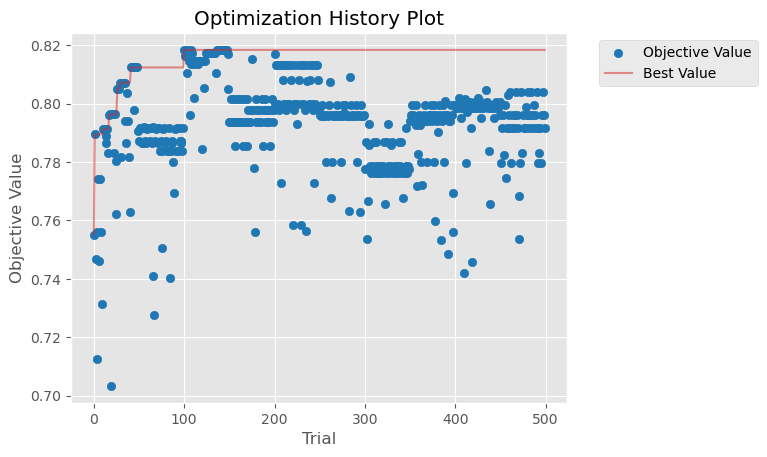

In [124]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_knn);

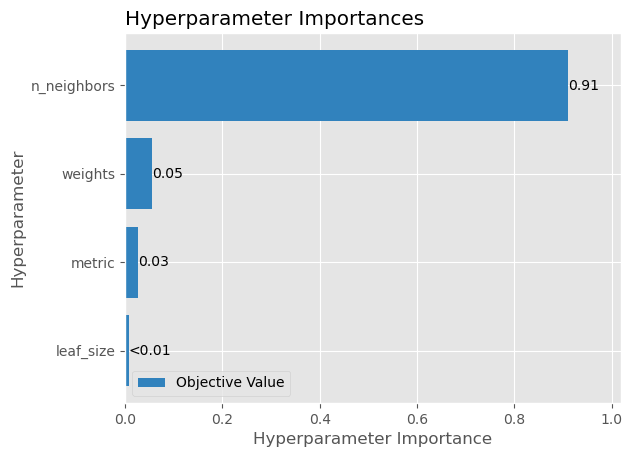

In [125]:

plot_param_importances(study_knn);

In [126]:
detailed_objective_knn_CV(study_knn.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,TP,21.000000,2.708013
1,TN,151.200000,2.529822
2,FP,6.400000,2.913570
3,FN,12.400000,2.412928
4,Accuracy,0.901571,0.020172
5,Precision,0.770886,0.085266
6,Sensitivity,0.628242,0.073777
7,Specificity,0.959470,0.018366
8,F1 score,0.689582,0.065432
9,F1 score (weighted),0.897549,0.020561


In [127]:
mat_met_knn_test['ave'] = mat_met_knn_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_knn_test['std'] = mat_met_knn_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_knn_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,TP,45.000000,51.000000,37.000000,42.000000,36.000000,45.000000,41.000000,39.000000,39.000000,41.000000,41.600000,4.452215
1,TN,301.000000,302.000000,304.000000,305.000000,312.000000,301.000000,305.000000,303.000000,305.000000,308.000000,304.600000,3.373096
2,FP,13.000000,12.000000,11.000000,11.000000,3.000000,14.000000,8.000000,12.000000,10.000000,5.000000,9.900000,3.541814
3,FN,23.000000,17.000000,30.000000,24.000000,31.000000,22.000000,28.000000,28.000000,28.000000,28.000000,25.900000,4.306326
4,Accuracy,0.905759,0.924084,0.892670,0.908377,0.910995,0.905759,0.905759,0.895288,0.900524,0.913613,0.906283,0.009052
5,Precision,0.775862,0.809524,0.770833,0.792453,0.923077,0.762712,0.836735,0.764706,0.795918,0.891304,0.812312,0.055329
6,Sensitivity,0.661765,0.750000,0.552239,0.636364,0.537313,0.671642,0.594203,0.582090,0.582090,0.594203,0.616191,0.064177
7,Specificity,0.958600,0.961800,0.965100,0.965200,0.990500,0.955600,0.974400,0.961900,0.968300,0.984000,0.968540,0.011227
8,F1 score,0.714286,0.778626,0.643478,0.705882,0.679245,0.714286,0.694915,0.661017,0.672414,0.713043,0.697719,0.037528
9,F1 score (weighted),0.902758,0.922935,0.885375,0.904296,0.901133,0.903358,0.899231,0.889486,0.894187,0.906505,0.900926,0.010313


In [128]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)


Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_knn=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_knn = KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )


        #learn
        
        optimizedCV_knn.fit(X_train,y_train)
                          
                  
        #print(test_idx)
        y_pred_optimized_knn = optimizedCV_knn.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_knn': y_pred_optimized_knn } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        
        conf_matrix = confusion_matrix(y_test, y_pred_optimized_knn)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        Accuracy_outer.append(accuracy_score(y_test, y_pred_optimized_knn))
        Precision_outer.append(precision_score(y_test, y_pred_optimized_knn))
        Sensitivity_outer.append(recall_score(y_test, y_pred_optimized_knn))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test, y_pred_optimized_knn))
        f1_scores_W_outer.append(f1_score(y_test, y_pred_optimized_knn, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test, y_pred_optimized_knn, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test, y_pred_optimized_knn))
        MCC_outer.append(matthews_corrcoef(y_test, y_pred_optimized_knn))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test, y_pred_optimized_knn))
        
    data_knn['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_knn['y_test' + str(i)] = data_inner['y_test']
    data_knn['y_pred_knn' + str(i)] = data_inner['y_pred_knn']
   # data_knn['correct' + str(i)] = correct_value
   # data_knn['pred' + str(i)] = y_pred_optimized_knn

mat_met_optimized_knn = pd.DataFrame({'Metric':['Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[ np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [ np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


mat_met_optimized_knn

,Metric,Value (average),Value (std)
0,Accuracy,0.899372,0.019882
1,Precision,0.767114,0.073523
2,Sensitivity,0.614031,0.081899
3,Specificity,0.959772,0.015585
4,F1 score,0.679259,0.068022
5,F1 score (weighted),0.894673,0.021137
6,F1 score (macro),0.809764,0.039527
7,Balanced Accuracy,0.786900,0.042278
8,MCC,0.627766,0.076886
9,NPV,0.921742,0.015243


In [129]:
#cross valide using this optimized KNN 
knn_baseline_CVscore = cross_val_score(knn_clf, X, Y, cv=10, scoring="f1_macro")
#cv_knn_opt_testSet = cross_val_score(optimized_knn, X, Y, cv=10, scoring="f1_macro")
cv_knn_opt = cross_val_score(optimizedCV_knn, X, Y, cv=10, scoring="f1_macro")
print("KNN baseline model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(knn_baseline_CVscore), np.std(knn_baseline_CVscore, ddof=1)))
#print("KNN optimized model (tested on Y_te) f1_score %0.4f with a standard deviation of %0.4f" % (cv_knn_opt_testSet.mean(), cv_knn_opt_testSet.std()))
print("KNN optimized model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_knn_opt), np.std(cv_knn_opt, ddof=1)))

KNN baseline model f1_score 0.7943 with a standard deviation of 0.0358
KNN optimized model f1_score 0.8170 with a standard deviation of 0.0435


In [130]:
joblib.dump(knn_clf, "OUTPUT/knn_clf_withSemiSel.joblib")
#joblib.dump(optimized_knn, "OUTPUT/optimized_knn_withSemiSel.joblib")
joblib.dump(optimizedCV_knn, "OUTPUT/optimizedCV_knn_clf_withSemiSel.joblib")
#loaded_rf = joblib.load("OUTPUT/optimized_rf_withSemiSel.joblib")

['OUTPUT/optimizedCV_knn_clf_withSemiSel.joblib']

## Support Vector 

In [131]:
%%time


TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    svm_clf = SVC()
    
    svm_clf.fit(X_train, y_train, )

    y_pred = svm_clf.predict(X_test) 
   
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test, y_pred)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test, y_pred)
    Precision[idx] = precision_score(y_test, y_pred)
    Sensitivity[idx] = recall_score(y_test, y_pred)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test, y_pred)
    f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
    f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
    MCC[idx] = matthews_corrcoef(y_test, y_pred)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test, y_pred)


mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       }) 
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    TP        16.300000     2.263233
1                    TN       154.500000     2.068279
2                    FP         3.100000     2.233582
3                    FN        17.100000     2.685351
4              Accuracy         0.894241     0.015374
5             Precision         0.849453     0.079902
6           Sensitivity         0.488858     0.072050
7           Specificity         0.980350     0.014121
8              F1 score         0.615614     0.064893
9   F1 score (weighted)         0.882077     0.018677
10     F1 score (macro)         0.777127     0.036373
11    Balanced Accuracy         0.734608     0.034946
12                  MCC         0.591137     0.060944
13                  NPV         0.900550     0.013813
14              ROC_AUC         0.734608     0.034946
CPU times: user 2.36 s, sys: 280 ms, total: 2.64 s
Wall time: 2.28 s


In [132]:
def objective_svm_CV(trial, X, Y, Y_class):
    param_grid = {
        "C" : trial.suggest_categorical("C", [np.exp2(-7), np.exp2(-6), np.exp2(-5), np.exp2(-4), np.exp2(-3), np.exp2(-2),
                                              np.exp2(-1), np.exp2(0), np.exp2(1), np.exp2(2), np.exp2(3), np.exp2(4),
                                             np.exp2(5), np.exp2(6), np.exp2(7)]),
        "gamma" :trial.suggest_categorical("gamma", [np.exp2(-15), np.exp2(-14), np.exp2(-13), np.exp2(-12), np.exp2(-11), 
                                                     np.exp2(-10),np.exp2(-9), np.exp2(-8), np.exp2(-7), np.exp2(-6), np.exp2(-5), 
                                                     np.exp2(-4),np.exp2(-3), np.exp2(-2), np.exp2(-1), np.exp2(0), np.exp2(1),
                                                     np.exp2(2), np.exp2(3)]),
        #"kernel" : trial.suggestegorical("kernel", ['linear', 'rbf', 'sigmoid']),
        #"degree": trial.suggest_int("degree", 3, 10)
        #"device_type": trial.suggestegorical("device_type", ['gpu'])
        
    }
    
    
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        svm_model = SVC(**param_grid)
        svm_model.fit(X_train,y_train)
    
        y_pred = svm_model.predict(X_test)
    
    
        cv_scores[idx] = f1_score(y_test, y_pred, average='macro')
       
        
    return np.mean(cv_scores)


In [133]:
def detailed_objective_svm_cv(trial, X, Y, Y_class):
    param_grid = {
        "C" : trial.suggest_categorical("C", [np.exp2(-7), np.exp2(-6), np.exp2(-5), np.exp2(-4), np.exp2(-3), np.exp2(-2),
                                              np.exp2(-1), np.exp2(0), np.exp2(1), np.exp2(2), np.exp2(3), np.exp2(4),
                                             np.exp2(5), np.exp2(6), np.exp2(7)]),
        "gamma" :trial.suggest_categorical("gamma", [np.exp2(-15), np.exp2(-14), np.exp2(-13), np.exp2(-12), np.exp2(-11), 
                                                     np.exp2(-10),np.exp2(-9), np.exp2(-8), np.exp2(-7), np.exp2(-6), np.exp2(-5), 
                                                     np.exp2(-4),np.exp2(-3), np.exp2(-2), np.exp2(-1), np.exp2(0), np.exp2(1),
                                                     np.exp2(2), np.exp2(3)]),
        #"kernel" : trial.suggestegorical("kernel", ['linear', 'rbf', 'sigmoid']),
        #"degree": trial.suggest_int("degree", 3, 10)
        #"device_type": trial.suggestegorical("device_type", ['gpu']),
        
    }
    
  
    TP =np.empty(10)
    TN = np.empty(10)
    FP = np.empty(10)
    FN = np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M = np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)

    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        svm_model = SVC(**param_grid)
        svm_model.fit(X_train,y_train)
    
        y_pred = svm_model.predict(X_test)
        
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test, y_pred)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test, y_pred)
        Precision[idx] = precision_score(y_test, y_pred)
        Sensitivity[idx] = recall_score(y_test, y_pred)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
        f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
        MCC[idx] = matthews_corrcoef(y_test, y_pred)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test, y_pred)


    mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
    return(mat_met)
   

In [134]:
#Execute optuna and set hyperparameters
study_svm = optuna.create_study(direction='maximize', study_name="SVM_classifier")
func_svm_0 = lambda trial: objective_svm_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_svm.optimize(func_svm_0, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:24:58,227] A new study created in memory with name: SVM_classifier
[I 2023-12-05 18:24:59,420] Trial 0 finished with value: 0.7536936365030058 and parameters: {'C': 64.0, 'gamma': 0.0001220703125}. Best is trial 0 with value: 0.7536936365030058.
[I 2023-12-05 18:25:00,660] Trial 1 finished with value: 0.6802293027878075 and parameters: {'C': 4.0, 'gamma': 0.00048828125}. Best is trial 0 with value: 0.7536936365030058.
[I 2023-12-05 18:25:03,400] Trial 2 finished with value: 0.45960630508038963 and parameters: {'C': 1.0, 'gamma': 1.0}. Best is trial 0 with value: 0.7536936365030058.
[I 2023-12-05 18:25:06,078] Trial 3 finished with value: 0.45232669164207806 and parameters: {'C': 0.125, 'gamma': 0.25}. Best is trial 0 with value: 0.7536936365030058.
[I 2023-12-05 18:25:08,830] Trial 4 finished with value: 0.46982342715586095 and parameters: {'C': 32.0, 'gamma': 0.25}. Best is trial 0 with value: 0.7536936365030058.
[I 2023-12-05 18:25:09,956] Trial 5 finished with value

	Number of trials: 50.0
	Best value (f1_score): 0.8213
	Best params:
		C: 128.0
		gamma: 0.015625


In [135]:
#Create an instance with tuned hyperparameters

optimized_svm_0 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_0.fit(X_trainSet0,Y_trainSet0,)

# predict
y_pred_svm_0 = optimized_svm_0.predict(X_testSet0)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0, y_pred_svm_0)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0, y_pred_svm_0)
Precision = precision_score(Y_testSet0, y_pred_svm_0)
Sensitivity = recall_score(Y_testSet0, y_pred_svm_0)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0, y_pred_svm_0)      
f1_scores_W = f1_score(Y_testSet0, y_pred_svm_0, average="weighted")
f1_scores_M = f1_score(Y_testSet0, y_pred_svm_0, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0, y_pred_svm_0)
MCC = matthews_corrcoef(Y_testSet0, y_pred_svm_0)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0, y_pred_svm_0)
    

mat_met_svm_test = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_svm_test)


                 Metric        Set0
0                    TP   45.000000
1                    TN  306.000000
2                    FP    8.000000
3                    FN   23.000000
4              Accuracy    0.918848
5             Precision    0.849057
6           Sensitivity    0.661765
7           Specificity    0.974500
8              F1 score    0.743802
9   F1 score (weighted)    0.914765
10     F1 score (macro)    0.847795
11    Balanced Accuracy    0.818143
12                  MCC    0.704103
13                  NPV    0.930100
14              ROC_AUC    0.818143


In [136]:
#Execute optuna and set hyperparameters
func_svm_1 = lambda trial: objective_svm_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_svm.optimize(func_svm_1, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:26:35,044] Trial 50 finished with value: 0.46597357861185273 and parameters: {'C': 32.0, 'gamma': 0.25}. Best is trial 20 with value: 0.8213265614379403.
[I 2023-12-05 18:26:37,298] Trial 51 finished with value: 0.7923789477954051 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 20 with value: 0.8213265614379403.
[I 2023-12-05 18:26:39,532] Trial 52 finished with value: 0.7923789477954051 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 20 with value: 0.8213265614379403.
[I 2023-12-05 18:26:41,771] Trial 53 finished with value: 0.7923789477954051 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 20 with value: 0.8213265614379403.
[I 2023-12-05 18:26:42,993] Trial 54 finished with value: 0.7418607888704202 and parameters: {'C': 128.0, 'gamma': 6.103515625e-05}. Best is trial 20 with value: 0.8213265614379403.
[I 2023-12-05 18:26:44,039] Trial 55 finished with value: 0.45232669164207806 and parameters: {'C': 0.03125, 'gamma': 3.05175781

	Number of trials: 100.0
	Best value (f1_score): 0.8213
	Best params:
		C: 128.0
		gamma: 0.015625


In [137]:
#Create an instance with tuned hyperparameters

optimized_svm_1 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_1.fit(X_trainSet1,Y_trainSet1,)

# predict
y_pred_svm_1 = optimized_svm_1.predict(X_testSet1)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1, y_pred_svm_1)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1, y_pred_svm_1)
Precision = precision_score(Y_testSet1, y_pred_svm_1)
Sensitivity = recall_score(Y_testSet1, y_pred_svm_1)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1, y_pred_svm_1)      
f1_scores_W = f1_score(Y_testSet1, y_pred_svm_1, average="weighted")
f1_scores_M = f1_score(Y_testSet1, y_pred_svm_1, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1, y_pred_svm_1)
MCC = matthews_corrcoef(Y_testSet1, y_pred_svm_1)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1, y_pred_svm_1)
    

set1 = pd.DataFrame({'Set1':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set1'] = set1
print(mat_met_svm_test)


                 Metric        Set0        Set1
0                    TP   45.000000   52.000000
1                    TN  306.000000  303.000000
2                    FP    8.000000   11.000000
3                    FN   23.000000   16.000000
4              Accuracy    0.918848    0.929319
5             Precision    0.849057    0.825397
6           Sensitivity    0.661765    0.764706
7           Specificity    0.974500    0.965000
8              F1 score    0.743802    0.793893
9   F1 score (weighted)    0.914765    0.928250
10     F1 score (macro)    0.847795    0.875620
11    Balanced Accuracy    0.818143    0.864837
12                  MCC    0.704103    0.752112
13                  NPV    0.930100    0.949800
14              ROC_AUC    0.818143    0.864837


In [138]:
#Execute optuna and set hyperparameters
func_svm_2 = lambda trial: objective_svm_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_svm.optimize(func_svm_2, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:28:16,069] Trial 100 finished with value: 0.7213846521050717 and parameters: {'C': 8.0, 'gamma': 0.00048828125}. Best is trial 20 with value: 0.8213265614379403.
[I 2023-12-05 18:28:18,523] Trial 101 finished with value: 0.8135924480639289 and parameters: {'C': 128.0, 'gamma': 0.03125}. Best is trial 20 with value: 0.8213265614379403.
[I 2023-12-05 18:28:20,980] Trial 102 finished with value: 0.8135924480639289 and parameters: {'C': 128.0, 'gamma': 0.03125}. Best is trial 20 with value: 0.8213265614379403.
[I 2023-12-05 18:28:23,434] Trial 103 finished with value: 0.8135924480639289 and parameters: {'C': 128.0, 'gamma': 0.03125}. Best is trial 20 with value: 0.8213265614379403.
[I 2023-12-05 18:28:25,888] Trial 104 finished with value: 0.8135924480639289 and parameters: {'C': 128.0, 'gamma': 0.03125}. Best is trial 20 with value: 0.8213265614379403.
[I 2023-12-05 18:28:28,343] Trial 105 finished with value: 0.8135924480639289 and parameters: {'C': 128.0, 'gamma': 0.031

	Number of trials: 150.0
	Best value (f1_score): 0.8266
	Best params:
		C: 8.0
		gamma: 0.015625


In [139]:
#Create an instance with tuned hyperparameters

optimized_svm_2 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_2.fit(X_trainSet2,Y_trainSet2,)

# predict
y_pred_svm_2 = optimized_svm_2.predict(X_testSet2)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2, y_pred_svm_2)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2, y_pred_svm_2)
Precision = precision_score(Y_testSet2, y_pred_svm_2)
Sensitivity = recall_score(Y_testSet2, y_pred_svm_2)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2, y_pred_svm_2)      
f1_scores_W = f1_score(Y_testSet2, y_pred_svm_2, average="weighted")
f1_scores_M = f1_score(Y_testSet2, y_pred_svm_2, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2, y_pred_svm_2)
MCC = matthews_corrcoef(Y_testSet2, y_pred_svm_2)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2, y_pred_svm_2)
    

Set2 = pd.DataFrame({'Set2':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set2'] = Set2
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2
0                    TP   45.000000   52.000000   44.000000
1                    TN  306.000000  303.000000  300.000000
2                    FP    8.000000   11.000000   15.000000
3                    FN   23.000000   16.000000   23.000000
4              Accuracy    0.918848    0.929319    0.900524
5             Precision    0.849057    0.825397    0.745763
6           Sensitivity    0.661765    0.764706    0.656716
7           Specificity    0.974500    0.965000    0.952400
8              F1 score    0.743802    0.793893    0.698413
9   F1 score (weighted)    0.914765    0.928250    0.897989
10     F1 score (macro)    0.847795    0.875620    0.819426
11    Balanced Accuracy    0.818143    0.864837    0.804549
12                  MCC    0.704103    0.752112    0.640991
13                  NPV    0.930100    0.949800    0.928800
14              ROC_AUC    0.818143    0.864837    0.804549


In [140]:
#Execute optuna and set hyperparameters
func_svm_3 = lambda trial: objective_svm_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_svm.optimize(func_svm_3, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:29:50,656] Trial 150 finished with value: 0.4519335623018662 and parameters: {'C': 0.03125, 'gamma': 4.0}. Best is trial 110 with value: 0.8266256708928432.
[I 2023-12-05 18:29:52,702] Trial 151 finished with value: 0.8356471891528088 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.8356471891528088.
[I 2023-12-05 18:29:54,750] Trial 152 finished with value: 0.8356471891528088 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.8356471891528088.
[I 2023-12-05 18:29:56,807] Trial 153 finished with value: 0.8356471891528088 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 151 with value: 0.8356471891528088.
[I 2023-12-05 18:29:59,409] Trial 154 finished with value: 0.5568892039225171 and parameters: {'C': 8.0, 'gamma': 0.125}. Best is trial 151 with value: 0.8356471891528088.
[I 2023-12-05 18:30:00,870] Trial 155 finished with value: 0.7472689415495396 and parameters: {'C': 0.5, 'gamma': 0.015625}. Best

	Number of trials: 200.0
	Best value (f1_score): 0.8373
	Best params:
		C: 32.0
		gamma: 0.015625


In [141]:
#Create an instance with tuned hyperparameters

optimized_svm_3 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_3.fit(X_trainSet3,Y_trainSet3,)

# predict
y_pred_svm_3 = optimized_svm_3.predict(X_testSet3)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3, y_pred_svm_3)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3, y_pred_svm_3)
Precision = precision_score(Y_testSet3, y_pred_svm_3)
Sensitivity = recall_score(Y_testSet3, y_pred_svm_3)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3, y_pred_svm_3)      
f1_scores_W = f1_score(Y_testSet3, y_pred_svm_3, average="weighted")
f1_scores_M = f1_score(Y_testSet3, y_pred_svm_3, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3, y_pred_svm_3)
MCC = matthews_corrcoef(Y_testSet3, y_pred_svm_3)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3, y_pred_svm_3)
    

Set3 = pd.DataFrame({'Set3':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set3'] = Set3
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3
0                    TP   45.000000   52.000000   44.000000   39.000000
1                    TN  306.000000  303.000000  300.000000  304.000000
2                    FP    8.000000   11.000000   15.000000   12.000000
3                    FN   23.000000   16.000000   23.000000   27.000000
4              Accuracy    0.918848    0.929319    0.900524    0.897906
5             Precision    0.849057    0.825397    0.745763    0.764706
6           Sensitivity    0.661765    0.764706    0.656716    0.590909
7           Specificity    0.974500    0.965000    0.952400    0.962000
8              F1 score    0.743802    0.793893    0.698413    0.666667
9   F1 score (weighted)    0.914765    0.928250    0.897989    0.892545
10     F1 score (macro)    0.847795    0.875620    0.819426    0.803194
11    Balanced Accuracy    0.818143    0.864837    0.804549    0.776467
12                  MCC    0.704103    0.752112    0.640991    0

In [142]:
#Execute optuna and set hyperparameters
func_svm_4 = lambda trial: objective_svm_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_svm.optimize(func_svm_4, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:31:30,473] Trial 200 finished with value: 0.8159091808979018 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:31:32,425] Trial 201 finished with value: 0.8159091808979018 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:31:33,558] Trial 202 finished with value: 0.8102840261122901 and parameters: {'C': 32.0, 'gamma': 0.00390625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:31:35,515] Trial 203 finished with value: 0.8159091808979018 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:31:36,619] Trial 204 finished with value: 0.6636182199410358 and parameters: {'C': 32.0, 'gamma': 6.103515625e-05}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:31:38,584] Trial 205 finished with value: 0.8159091808979018 and parameters: {'C': 32.0, 'gamm

	Number of trials: 250.0
	Best value (f1_score): 0.8373
	Best params:
		C: 32.0
		gamma: 0.015625


In [143]:
#Create an instance with tuned hyperparameters

optimized_svm_4 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_4.fit(X_trainSet4,Y_trainSet4,)

# predict
y_pred_svm_4 = optimized_svm_4.predict(X_testSet4)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4, y_pred_svm_4)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4, y_pred_svm_4)
Precision = precision_score(Y_testSet4, y_pred_svm_4)
Sensitivity = recall_score(Y_testSet4, y_pred_svm_4)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4, y_pred_svm_4)      
f1_scores_W = f1_score(Y_testSet4, y_pred_svm_4, average="weighted")
f1_scores_M = f1_score(Y_testSet4, y_pred_svm_4, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4, y_pred_svm_4)
MCC = matthews_corrcoef(Y_testSet4, y_pred_svm_4)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4, y_pred_svm_4)
    

Set4 = pd.DataFrame({'Set4':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set4'] = Set4
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   45.000000   52.000000   44.000000   39.000000   
1                    TN  306.000000  303.000000  300.000000  304.000000   
2                    FP    8.000000   11.000000   15.000000   12.000000   
3                    FN   23.000000   16.000000   23.000000   27.000000   
4              Accuracy    0.918848    0.929319    0.900524    0.897906   
5             Precision    0.849057    0.825397    0.745763    0.764706   
6           Sensitivity    0.661765    0.764706    0.656716    0.590909   
7           Specificity    0.974500    0.965000    0.952400    0.962000   
8              F1 score    0.743802    0.793893    0.698413    0.666667   
9   F1 score (weighted)    0.914765    0.928250    0.897989    0.892545   
10     F1 score (macro)    0.847795    0.875620    0.819426    0.803194   
11    Balanced Accuracy    0.818143    0.864837    0.804549    0.776467   
12                  MCC  

In [144]:
#Execute optuna and set hyperparameters
func_svm_5 = lambda trial: objective_svm_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_svm.optimize(func_svm_5, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:33:00,941] Trial 250 finished with value: 0.8173119215654264 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:33:02,218] Trial 251 finished with value: 0.4521322481185558 and parameters: {'C': 0.0078125, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:33:03,365] Trial 252 finished with value: 0.4521322481185558 and parameters: {'C': 8.0, 'gamma': 3.0517578125e-05}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:33:04,705] Trial 253 finished with value: 0.4521322481185558 and parameters: {'C': 0.03125, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:33:06,153] Trial 254 finished with value: 0.7105773158033146 and parameters: {'C': 0.5, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:33:07,344] Trial 255 finished with value: 0.7963098761649879 and parameters: {'C': 32.0, '

	Number of trials: 300.0
	Best value (f1_score): 0.8373
	Best params:
		C: 32.0
		gamma: 0.015625


In [145]:
#Create an instance with tuned hyperparameters

optimized_svm_5 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_5.fit(X_trainSet5,Y_trainSet5,)

# predict
y_pred_svm_5 = optimized_svm_5.predict(X_testSet5)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5, y_pred_svm_5)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5, y_pred_svm_5)
Precision = precision_score(Y_testSet5, y_pred_svm_5)
Sensitivity = recall_score(Y_testSet5, y_pred_svm_5)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5, y_pred_svm_5)      
f1_scores_W = f1_score(Y_testSet5, y_pred_svm_5, average="weighted")
f1_scores_M = f1_score(Y_testSet5, y_pred_svm_5, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5, y_pred_svm_5)
MCC = matthews_corrcoef(Y_testSet5, y_pred_svm_5)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5, y_pred_svm_5)
    

Set5 = pd.DataFrame({'Set5':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set5'] = Set5
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   45.000000   52.000000   44.000000   39.000000   
1                    TN  306.000000  303.000000  300.000000  304.000000   
2                    FP    8.000000   11.000000   15.000000   12.000000   
3                    FN   23.000000   16.000000   23.000000   27.000000   
4              Accuracy    0.918848    0.929319    0.900524    0.897906   
5             Precision    0.849057    0.825397    0.745763    0.764706   
6           Sensitivity    0.661765    0.764706    0.656716    0.590909   
7           Specificity    0.974500    0.965000    0.952400    0.962000   
8              F1 score    0.743802    0.793893    0.698413    0.666667   
9   F1 score (weighted)    0.914765    0.928250    0.897989    0.892545   
10     F1 score (macro)    0.847795    0.875620    0.819426    0.803194   
11    Balanced Accuracy    0.818143    0.864837    0.804549    0.776467   
12                  MCC  

In [146]:
#Execute optuna and set hyperparameters
func_svm_6 = lambda trial: objective_svm_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_svm.optimize(func_svm_6, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:34:31,864] Trial 300 finished with value: 0.7983930471439498 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:34:34,555] Trial 301 finished with value: 0.4597938403984022 and parameters: {'C': 8.0, 'gamma': 4.0}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:34:37,182] Trial 302 finished with value: 0.529563650224963 and parameters: {'C': 16.0, 'gamma': 0.125}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:34:39,257] Trial 303 finished with value: 0.8055899659863094 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:34:40,735] Trial 304 finished with value: 0.8066316318817695 and parameters: {'C': 2.0, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:34:42,009] Trial 305 finished with value: 0.45252241850566194 and parameters: {'C': 0.0625, 'gamma': 0.015625}. Bes

	Number of trials: 350.0
	Best value (f1_score): 0.8373
	Best params:
		C: 32.0
		gamma: 0.015625


In [147]:
#Create an instance with tuned hyperparameters

optimized_svm_6 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_6.fit(X_trainSet6,Y_trainSet6,)

# predict
y_pred_svm_6 = optimized_svm_6.predict(X_testSet6)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6, y_pred_svm_6)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6, y_pred_svm_6)
Precision = precision_score(Y_testSet6, y_pred_svm_6)
Sensitivity = recall_score(Y_testSet6, y_pred_svm_6)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6, y_pred_svm_6)      
f1_scores_W = f1_score(Y_testSet6, y_pred_svm_6, average="weighted")
f1_scores_M = f1_score(Y_testSet6, y_pred_svm_6, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6, y_pred_svm_6)
MCC = matthews_corrcoef(Y_testSet6, y_pred_svm_6)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6, y_pred_svm_6)
    

Set6 = pd.DataFrame({'Set6':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set6'] = Set6
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   45.000000   52.000000   44.000000   39.000000   
1                    TN  306.000000  303.000000  300.000000  304.000000   
2                    FP    8.000000   11.000000   15.000000   12.000000   
3                    FN   23.000000   16.000000   23.000000   27.000000   
4              Accuracy    0.918848    0.929319    0.900524    0.897906   
5             Precision    0.849057    0.825397    0.745763    0.764706   
6           Sensitivity    0.661765    0.764706    0.656716    0.590909   
7           Specificity    0.974500    0.965000    0.952400    0.962000   
8              F1 score    0.743802    0.793893    0.698413    0.666667   
9   F1 score (weighted)    0.914765    0.928250    0.897989    0.892545   
10     F1 score (macro)    0.847795    0.875620    0.819426    0.803194   
11    Balanced Accuracy    0.818143    0.864837    0.804549    0.776467   
12                  MCC  

In [148]:
#Execute optuna and set hyperparameters
func_svm_7 = lambda trial: objective_svm_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_svm.optimize(func_svm_7, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:36:10,649] Trial 350 finished with value: 0.8343778257162452 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:36:13,568] Trial 351 finished with value: 0.4743472529100578 and parameters: {'C': 8.0, 'gamma': 0.5}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:36:14,774] Trial 352 finished with value: 0.6831539696236497 and parameters: {'C': 32.0, 'gamma': 6.103515625e-05}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:36:16,930] Trial 353 finished with value: 0.8343778257162452 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:36:18,328] Trial 354 finished with value: 0.5379970735018361 and parameters: {'C': 0.125, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:36:19,649] Trial 355 finished with value: 0.8299816226952412 and parameters: {'C': 8.0, 'gamma': 0.0078

	Number of trials: 400.0
	Best value (f1_score): 0.8373
	Best params:
		C: 32.0
		gamma: 0.015625


In [149]:
#Create an instance with tuned hyperparameters

optimized_svm_7 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_7.fit(X_trainSet7,Y_trainSet7,)

# predict
y_pred_svm_7 = optimized_svm_7.predict(X_testSet7)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7, y_pred_svm_7)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7, y_pred_svm_7)
Precision = precision_score(Y_testSet7, y_pred_svm_7)
Sensitivity = recall_score(Y_testSet7, y_pred_svm_7)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7, y_pred_svm_7)      
f1_scores_W = f1_score(Y_testSet7, y_pred_svm_7, average="weighted")
f1_scores_M = f1_score(Y_testSet7, y_pred_svm_7, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7, y_pred_svm_7)
MCC = matthews_corrcoef(Y_testSet7, y_pred_svm_7)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7, y_pred_svm_7)
    

Set7 = pd.DataFrame({'Set7':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set7'] = Set7
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   45.000000   52.000000   44.000000   39.000000   
1                    TN  306.000000  303.000000  300.000000  304.000000   
2                    FP    8.000000   11.000000   15.000000   12.000000   
3                    FN   23.000000   16.000000   23.000000   27.000000   
4              Accuracy    0.918848    0.929319    0.900524    0.897906   
5             Precision    0.849057    0.825397    0.745763    0.764706   
6           Sensitivity    0.661765    0.764706    0.656716    0.590909   
7           Specificity    0.974500    0.965000    0.952400    0.962000   
8              F1 score    0.743802    0.793893    0.698413    0.666667   
9   F1 score (weighted)    0.914765    0.928250    0.897989    0.892545   
10     F1 score (macro)    0.847795    0.875620    0.819426    0.803194   
11    Balanced Accuracy    0.818143    0.864837    0.804549    0.776467   
12                  MCC  

In [150]:
#Execute optuna and set hyperparameters
func_svm_8 = lambda trial: objective_svm_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_svm.optimize(func_svm_8, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:37:45,969] Trial 400 finished with value: 0.7169809356580864 and parameters: {'C': 8.0, 'gamma': 0.00048828125}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:37:47,241] Trial 401 finished with value: 0.45213083910751584 and parameters: {'C': 0.03125, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:37:48,783] Trial 402 finished with value: 0.8245743913720034 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:37:49,968] Trial 403 finished with value: 0.45213083910751584 and parameters: {'C': 0.0078125, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:37:50,990] Trial 404 finished with value: 0.8028230392094317 and parameters: {'C': 32.0, 'gamma': 0.0009765625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:37:52,286] Trial 405 finished with value: 0.7348887456156243 and parameters: {'C': 0.5

	Number of trials: 450.0
	Best value (f1_score): 0.8373
	Best params:
		C: 32.0
		gamma: 0.015625


In [151]:
#Create an instance with tuned hyperparameters

optimized_svm_8 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_8.fit(X_trainSet8,Y_trainSet8,)

# predict
y_pred_svm_8 = optimized_svm_8.predict(X_testSet8)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8, y_pred_svm_8)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8, y_pred_svm_8)
Precision = precision_score(Y_testSet8, y_pred_svm_8)
Sensitivity = recall_score(Y_testSet8, y_pred_svm_8)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8, y_pred_svm_8)      
f1_scores_W = f1_score(Y_testSet8, y_pred_svm_8, average="weighted")
f1_scores_M = f1_score(Y_testSet8, y_pred_svm_8, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8, y_pred_svm_8)
MCC = matthews_corrcoef(Y_testSet8, y_pred_svm_8)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8, y_pred_svm_8)
    

Set8 = pd.DataFrame({'Set8':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set8'] = Set8
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   45.000000   52.000000   44.000000   39.000000   
1                    TN  306.000000  303.000000  300.000000  304.000000   
2                    FP    8.000000   11.000000   15.000000   12.000000   
3                    FN   23.000000   16.000000   23.000000   27.000000   
4              Accuracy    0.918848    0.929319    0.900524    0.897906   
5             Precision    0.849057    0.825397    0.745763    0.764706   
6           Sensitivity    0.661765    0.764706    0.656716    0.590909   
7           Specificity    0.974500    0.965000    0.952400    0.962000   
8              F1 score    0.743802    0.793893    0.698413    0.666667   
9   F1 score (weighted)    0.914765    0.928250    0.897989    0.892545   
10     F1 score (macro)    0.847795    0.875620    0.819426    0.803194   
11    Balanced Accuracy    0.818143    0.864837    0.804549    0.776467   
12                  MCC  

In [152]:
#Execute optuna and set hyperparameters
func_svm_9 = lambda trial: objective_svm_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_svm.optimize(func_svm_9, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 18:39:07,026] Trial 450 finished with value: 0.8064392916425058 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:39:08,502] Trial 451 finished with value: 0.7647479005696948 and parameters: {'C': 1.0, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:39:09,836] Trial 452 finished with value: 0.45252395318768024 and parameters: {'C': 0.015625, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:39:11,846] Trial 453 finished with value: 0.8067738602718325 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:39:13,857] Trial 454 finished with value: 0.8067738602718325 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 190 with value: 0.8372608474133578.
[I 2023-12-05 18:39:14,991] Trial 455 finished with value: 0.7098362001590155 and parameters: {'C': 2.0, 'gamma': 0.00

	Number of trials: 500.0
	Best value (f1_score): 0.8373
	Best params:
		C: 32.0
		gamma: 0.015625


In [153]:
#Create an instance with tuned hyperparameters

optimized_svm_9 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_9.fit(X_trainSet9,Y_trainSet9,)

# predict
y_pred_svm_9 = optimized_svm_9.predict(X_testSet9)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9, y_pred_svm_9)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9, y_pred_svm_9)
Precision = precision_score(Y_testSet9, y_pred_svm_9)
Sensitivity = recall_score(Y_testSet9, y_pred_svm_9)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9, y_pred_svm_9)      
f1_scores_W = f1_score(Y_testSet9, y_pred_svm_9, average="weighted")
f1_scores_M = f1_score(Y_testSet9, y_pred_svm_9, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9, y_pred_svm_9)
MCC = matthews_corrcoef(Y_testSet9, y_pred_svm_9)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9, y_pred_svm_9)
    

Set9 = pd.DataFrame({'Set9':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set9'] = Set9
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   45.000000   52.000000   44.000000   39.000000   
1                    TN  306.000000  303.000000  300.000000  304.000000   
2                    FP    8.000000   11.000000   15.000000   12.000000   
3                    FN   23.000000   16.000000   23.000000   27.000000   
4              Accuracy    0.918848    0.929319    0.900524    0.897906   
5             Precision    0.849057    0.825397    0.745763    0.764706   
6           Sensitivity    0.661765    0.764706    0.656716    0.590909   
7           Specificity    0.974500    0.965000    0.952400    0.962000   
8              F1 score    0.743802    0.793893    0.698413    0.666667   
9   F1 score (weighted)    0.914765    0.928250    0.897989    0.892545   
10     F1 score (macro)    0.847795    0.875620    0.819426    0.803194   
11    Balanced Accuracy    0.818143    0.864837    0.804549    0.776467   
12                  MCC  

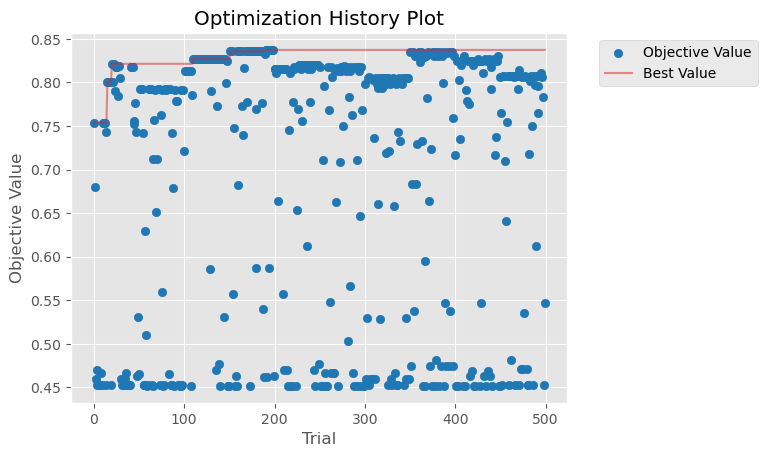

In [154]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_svm);

In [155]:
#from optuna.visualization.matplotlib import plot_param_importances

#plot_param_importances(study_svm);

In [156]:
detailed_objective_svm_cv(study_svm.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,TP,22.500000,2.635231
1,TN,150.300000,2.057507
2,FP,7.300000,2.263233
3,FN,10.900000,2.685351
4,Accuracy,0.904712,0.017241
5,Precision,0.756792,0.061802
6,Sensitivity,0.673913,0.078604
7,Specificity,0.953730,0.014283
8,F1 score,0.710608,0.059349
9,F1 score (weighted),0.902327,0.018480


In [157]:
mat_met_svm_test['ave'] = mat_met_svm_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_svm_test['std'] = mat_met_svm_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_svm_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,TP,45.000000,52.000000,44.000000,39.000000,40.000000,45.000000,48.000000,42.000000,40.000000,46.000000,44.100000,4.040077
1,TN,306.000000,303.000000,300.000000,304.000000,304.000000,298.000000,298.000000,303.000000,307.000000,301.000000,302.400000,3.098387
2,FP,8.000000,11.000000,15.000000,12.000000,11.000000,17.000000,15.000000,12.000000,8.000000,12.000000,12.100000,2.923088
3,FN,23.000000,16.000000,23.000000,27.000000,27.000000,22.000000,21.000000,25.000000,27.000000,23.000000,23.400000,3.405877
4,Accuracy,0.918848,0.929319,0.900524,0.897906,0.900524,0.897906,0.905759,0.903141,0.908377,0.908377,0.907068,0.010044
5,Precision,0.849057,0.825397,0.745763,0.764706,0.784314,0.725806,0.761905,0.777778,0.833333,0.793103,0.786116,0.039673
6,Sensitivity,0.661765,0.764706,0.656716,0.590909,0.597015,0.671642,0.695652,0.626866,0.597015,0.666667,0.652895,0.053468
7,Specificity,0.974500,0.965000,0.952400,0.962000,0.965100,0.946000,0.952100,0.961900,0.974600,0.961700,0.961530,0.009296
8,F1 score,0.743802,0.793893,0.698413,0.666667,0.677966,0.697674,0.727273,0.694215,0.695652,0.724409,0.711996,0.036956
9,F1 score (weighted),0.914765,0.928250,0.897989,0.892545,0.895011,0.896329,0.904065,0.898917,0.902149,0.905200,0.903522,0.010746


In [158]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)


Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_svm=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_svm = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )


        #learn
        
        optimizedCV_svm.fit(X_train,y_train)
                          
                  
        #print(test_idx)
        y_pred_optimized_svm = optimizedCV_svm.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_svm': y_pred_optimized_svm } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        
        conf_matrix = confusion_matrix(y_test, y_pred_optimized_svm)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        Accuracy_outer.append(accuracy_score(y_test, y_pred_optimized_svm))
        Precision_outer.append(precision_score(y_test, y_pred_optimized_svm))
        Sensitivity_outer.append(recall_score(y_test, y_pred_optimized_svm))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test, y_pred_optimized_svm))
        f1_scores_W_outer.append(f1_score(y_test, y_pred_optimized_svm, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test, y_pred_optimized_svm, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test, y_pred_optimized_svm))
        MCC_outer.append(matthews_corrcoef(y_test, y_pred_optimized_svm))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test, y_pred_optimized_svm))
        
    data_svm['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_svm['y_test' + str(i)] = data_inner['y_test']
    data_svm['y_pred_svm' + str(i)] = data_inner['y_pred_svm']
   # data_svm['correct' + str(i)] = correct_value
   # data_svm['pred' + str(i)] = y_pred_optimized_svm

mat_met_optimized_svm = pd.DataFrame({'Metric':['Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[ np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [ np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 

mat_met_optimized_svm

,Metric,Value (average),Value (std)
0,Accuracy,0.904188,0.017927
1,Precision,0.756170,0.060850
2,Sensitivity,0.671580,0.081848
3,Specificity,0.953414,0.014938
4,F1 score,0.708736,0.059681
5,F1 score (weighted),0.901731,0.018894
6,F1 score (macro),0.825671,0.034831
7,Balanced Accuracy,0.812496,0.040825
8,MCC,0.655157,0.068486
9,NPV,0.932290,0.015726


In [159]:
#cross valide using this optimized SVC 
svm_baseline_CVscore = cross_val_score(svm_clf, X, Y, cv=10, scoring="f1_macro")
#cv_svm_opt_testSet = cross_val_score(optimized_svm, X, Y, cv=10, scoring="f1_macro")
cv_svm_opt = cross_val_score(optimizedCV_svm, X, Y, cv=10, scoring="f1_macro")
print("SVM baseline model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(svm_baseline_CVscore), np.std(svm_baseline_CVscore, ddof=1)))
#print("SVM optimized model (tested on Y_te) f1_score %0.4f with a standard deviation of %0.4f" % (svm_baseline_CVscore.mean(), svm_baseline_CVscore.std()))
print("SVM optimized model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_svm_opt), np.std(cv_svm_opt, ddof=1)))

SVM baseline model f1_score 0.7803 with a standard deviation of 0.0352
SVM optimized model f1_score 0.8277 with a standard deviation of 0.0267


In [160]:
joblib.dump(svm_clf, "OUTPUT/svm_clf_withSemiSel.joblib")
joblib.dump(optimizedCV_svm, "OUTPUT/optimizedCV_svm_clf_withSemiSel.joblib")

['OUTPUT/optimizedCV_svm_clf_withSemiSel.joblib']

In [161]:
# save the evaluation results of Optimized and saved models to an Excel file

with pd.ExcelWriter("OUTPUT/TestSet_EvaluationResults_withSemiSel.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index 
    # to store the dataframe in specified sheet
    mat_met_rf_test.to_excel(writer, sheet_name="RF", )
    mat_met_lgbm_test.to_excel(writer, sheet_name="LGBM", )
    mat_met_xgb_test.to_excel(writer, sheet_name="XGB", )
    mat_met_knn_test.to_excel(writer, sheet_name="KNN", )
    mat_met_svm_test.to_excel(writer, sheet_name="SVM", )

In [162]:
# save the evaluation results of Optimized and saved models to an Excel file

with pd.ExcelWriter("OUTPUT/EvaluationResults_withSemiSel.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index 
    # to store the dataframe in specified sheet
    mat_met_optimized_rf.to_excel(writer, sheet_name="RF", )
    mat_met_optimized_lgbm.to_excel(writer, sheet_name="LGBM", )
    mat_met_optimized_xgb.to_excel(writer, sheet_name="XGB", )
    mat_met_optimized_knn.to_excel(writer, sheet_name="KNN", )
    mat_met_optimized_svm.to_excel(writer, sheet_name="SVM", )